# Surprise Housing Regression Case Study

**Surprise Housing** is US based housing Company. It uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. Company has now decided to enter Australian market. It is looking at prospective properties to buy to enter the market. 

<font color = blue>**Business Goal**</font><br>

**Surprise Housing** requires a model that can be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

<font color = blue>**Aim of the case study**</font><br>

1. To understand the factors affecting the price of houses in Australian market. 
   The company wants to know:
    - Which variables are significant in predicting the price of a house, and
    - How well those variables describe the price of a house.
2. To create regression model using regularisation in order to predict the actual value of the prospective properties:
    - determine the optimal value of lambda for ridge and lasso regression.

### Following are steps used for creation and evaluation of model for case study
- Step 1: Reading and Understanding the Data
- Step 2: Data Analysis
- Step 3: Data Preparation
- Step 4: Splitting the Data into Training and Testing Sets
- Step 5: Model Building and Evaluation
- Step 6: Conclusion
- Step 7: Summary


## Step 1: Reading and Understanding the Data

Let us first import all the necessary Libraries 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset and check the first five rows
housing_df = pd.read_csv("train.csv" )
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]



Inspect the various aspects of the housing dataframe

In [3]:
# Check the shape of the dataframe
housing_df.shape

(1460, 81)

In [4]:
# Check the columns of the dataframe
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

It is clearly visible that columns MiscFeature,PoolQC,Alley are having very least amount of non null values. We will be dealing with these columns in data cleaning section

### Data Understanding

In order to analyse the data and fullfil the aim of the case study it is imperative to understand what data set is all about.
<br>Following is what important columns in given data set represents:


###### Zonal and dwelling related features:
     MSSubClass   : Identifies the type of dwelling involved in the sale
     MSZoning     : Identifies the general zoning classification of the sale.
     LotFrontage  : Linear feet of street connected to property
     LotArea      : Lot size in square feetym
     Street       : Type of road access to property
     Alley        : Type of alley access to property
     LotShape     : General shape of property
     LandContour  : Flatness of the property.
     Utilities    : Type of utilities available
     LotConfig    : Lot configuration
     LandSlope    : Slope of property
     Neighborhood : Physical locations within Ames city limits
    
###### External features :
    RoofStyle   : Type of roof
    RoofMatl    : Roof material
    Exterior1st : Exterior covering on house
    Exterior2nd : Exterior covering on house (if more than one material)
    MasVnrType  : Masonry veneer type
    MasVnrArea  : Masonry veneer area in square feet
    ExterQual   : Evaluates the quality of the material on the exterior 
    ExterCond   : Evaluates the present condition of the material on the exterior    
        
###### Features related to basement:
    Foundation    : Type of foundation
    BsmtQual      : Evaluates the height of the basement
    BsmtCond      : Evaluates the general condition of the basement
    BsmtExposure  : Refers to walkout or garden level walls
    BsmtFinType1  : Rating of basement finished area
    BsmtFinSF1    : Type 1 finished square feet
    BsmtFinType2  : Rating of basement finished area (if multiple types)
    BsmtFinSF2    : Type 2 finished square feet
    BsmtUnfSF     : Unfinished square feet of basement area
    TotalBsmtSF   : Total square feet of basement area
        
###### Features releated to internal condition
    Heating       : Type of heating
    HeatingQC     : Heating quality and condition
    CentralAir    : Central air conditioning
    Electrical    : Electrical system
    1stFlrSF      : First Floor square feet 
    2ndFlrSF      : Second floor square feet
    LowQualFinSF  : Low quality finished square feet (all floors)
    GrLivArea     : Above grade (ground) living area square feet
    BsmtFullBath  : Basement full bathrooms
    BsmtHalfBath  : Basement half bathrooms
    FullBath      : Full bathrooms above grade
    HalfBath      : Half baths above grades.csv
    Bedroom       : Bedrooms above grade (does NOT include basement bedrooms)
    Kitchen       : Kitchens above grade
    KitchenQual   : Kitchen quality
    TotRmsAbvGrd  : Total rooms above grade (does not include bathrooms)
    Functional    : Home functionality (Assume typical unless deductions are warranted)
    Fireplaces    : Number of fireplaces
    FireplaceQu   : Fireplace quality
        
###### Features related to garage
    GarageType   : Garage location
    GarageYrBlt  : Year garage was built
    GarageFinish : Interior finish of the garage
    GarageCars   : Size of garage in car capacity
    GarageArea   : Size of garage in square feet
    GarageQual   : Garage quality
    GarageCond   : Garage condition
        
###### Other features
    WoodDeckSF    : Wood deck area in square feet
    OpenPorchSF   : Open porch area in square feet
    EnclosedPorch : Enclosed porch area in square feet 
    3SsnPorch     : Three season porch area in square feet
    ScreenPorch   : Screen porch area in square feet
    PoolArea      : Pool area in square feet
    PoolQC        : Pool quality
    Fence         : Fence quality   
    
###### Target Feature
    SalePrice     : Cost of the property

Most of these features have categories which are not expplained here

## Step 2: Data Analysis

Here following things will be done:
- Classifying Numerical and Categorical variables
- Analysing Numerical Variables
- Analysing Categorical Variables

In [5]:
# Converting into object data type of following columns based on data understanding

housing_df[['MSSubClass','OverallQual','OverallCond']] = housing_df[['MSSubClass','OverallQual','OverallCond']].astype('object')
housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold']] = housing_df[['GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold']].astype('object')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [6]:
# Separating numerical and categorical features

num_features = housing_df.select_dtypes(include = ['int64','float64'])
cat_features = housing_df.select_dtypes(include = ['object'])


In [7]:
print('Numerical Features are:')
print(num_features.columns)

print('Categorical Features are:')
print(cat_features.columns)

Numerical Features are:
Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')
Categorical Features are:
Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    

### Analysing Numerical features

Here we will analyse the numerical data, visualize it and clean it as well.


In [8]:
# Checking the statistical summary of numerical variables
num_features.describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1201.000000    1460.000000  1452.000000  1460.000000   
mean    730.500000    70.049958   10516.828082   103.685262   443.639726   
std     421.610009    24.284752    9981.264932   181.066207   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    59.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    80.000000   11601.500000   166.000000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466  ...   
std     161.319273   441.866955   438.705324   386.587738   436.528436  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   223.000000   795.750000   882.000000     0.000000  ...   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000  ...   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000  ...   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000  

[8 rows x 30 columns]

In [9]:
# here field ID is just index and will not play any role in analysis so dropping it off
num_features.drop(['Id'], axis = 1 , inplace = True)
num_features.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

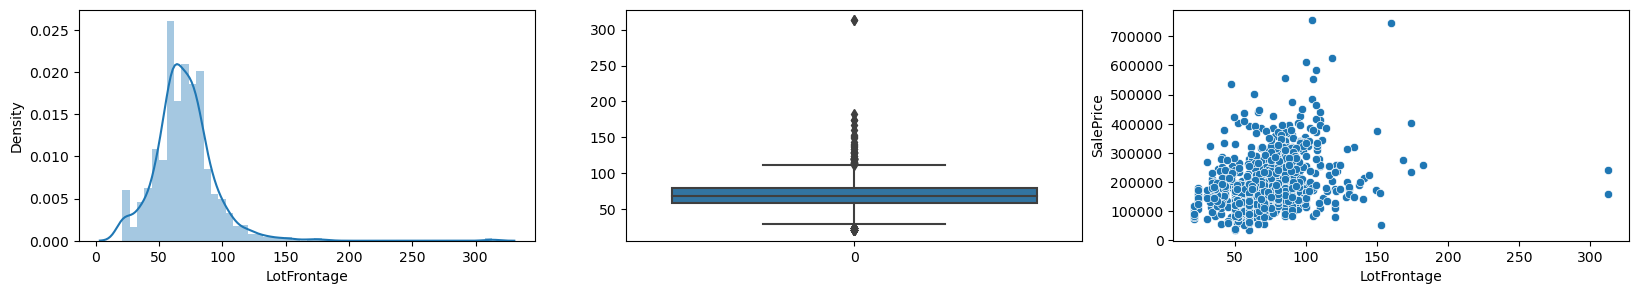

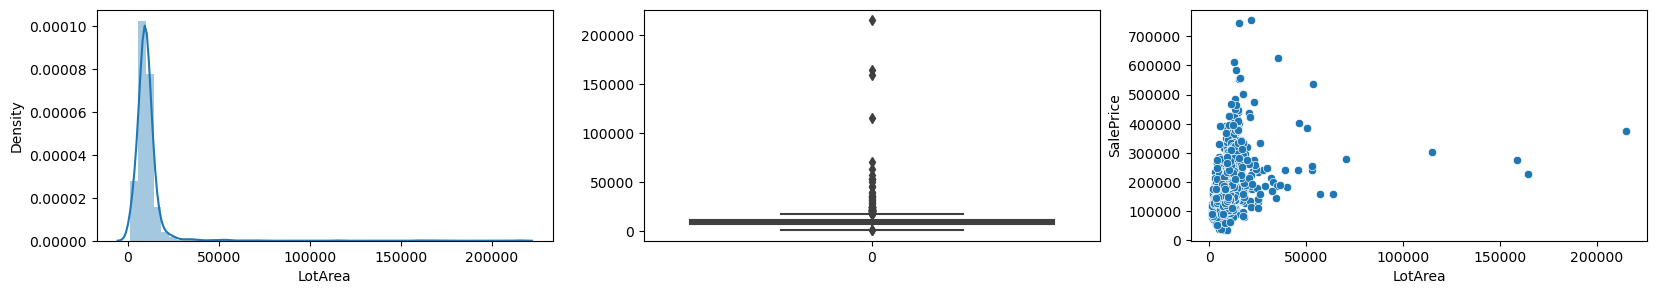

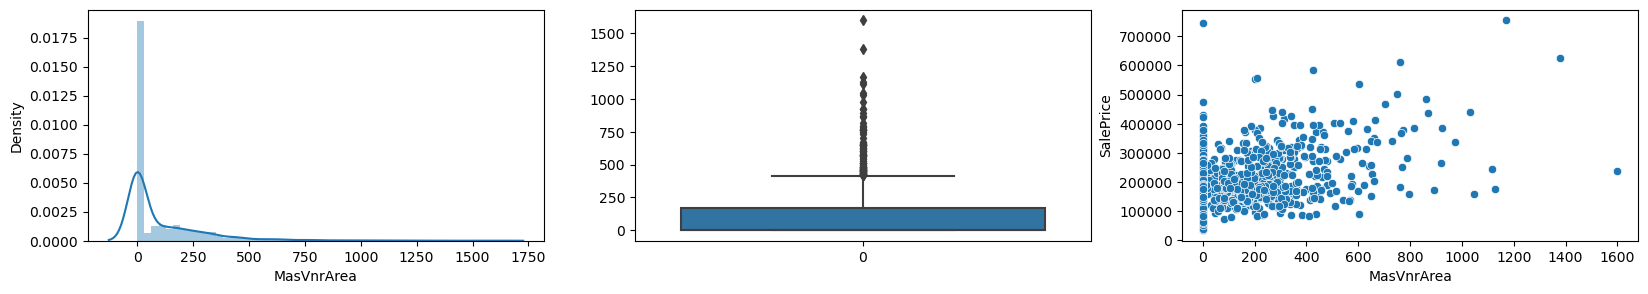

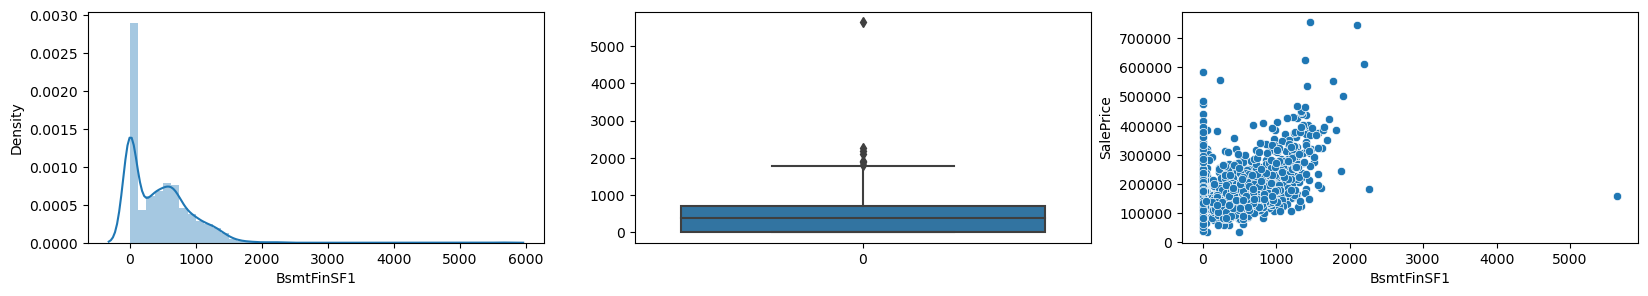

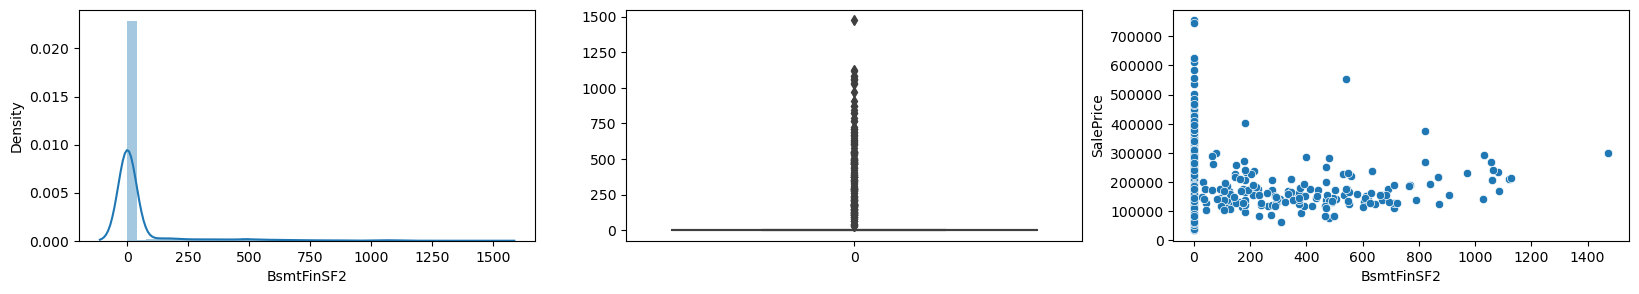

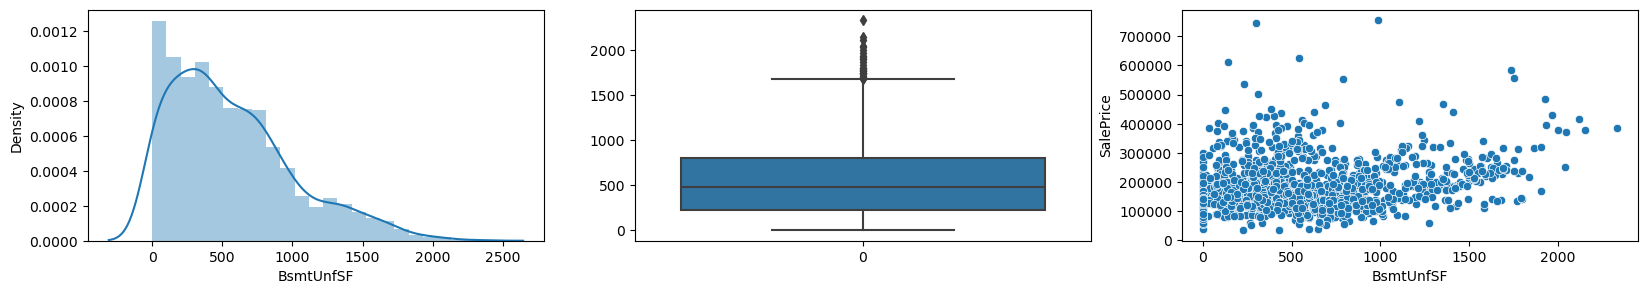

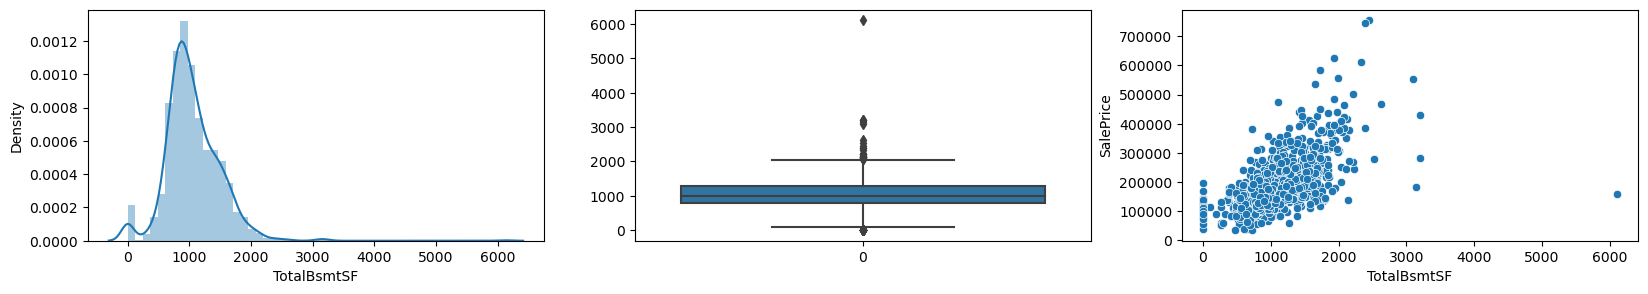

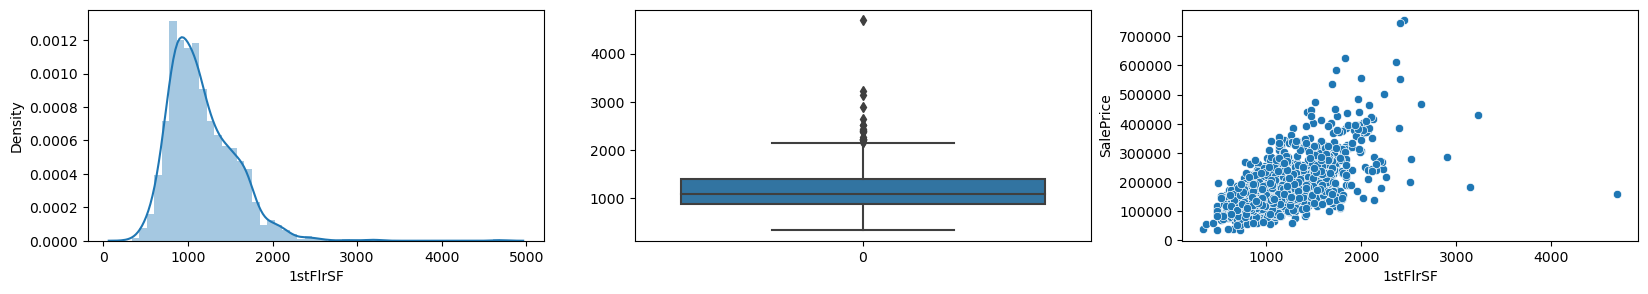

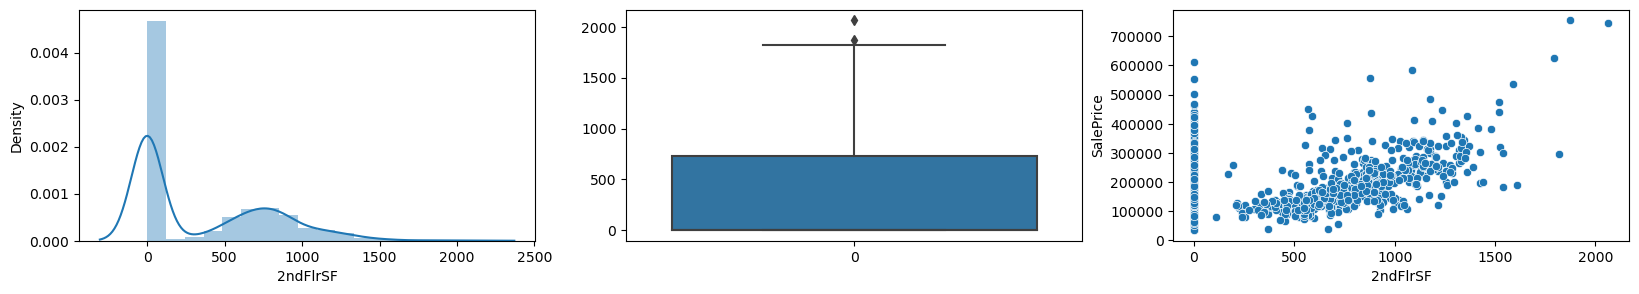

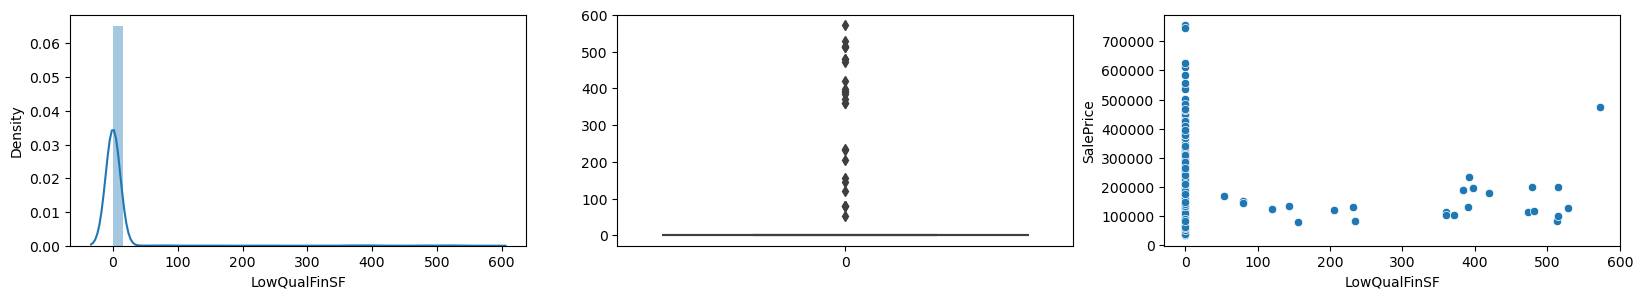

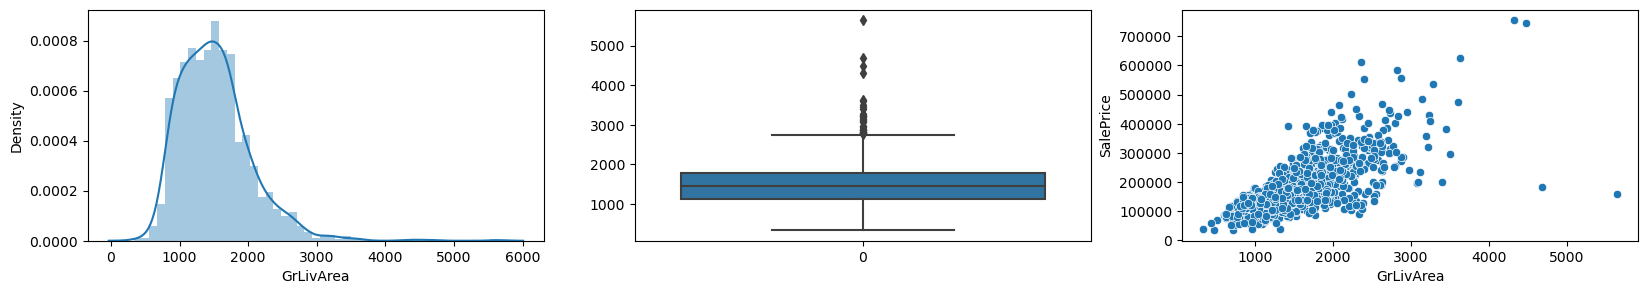

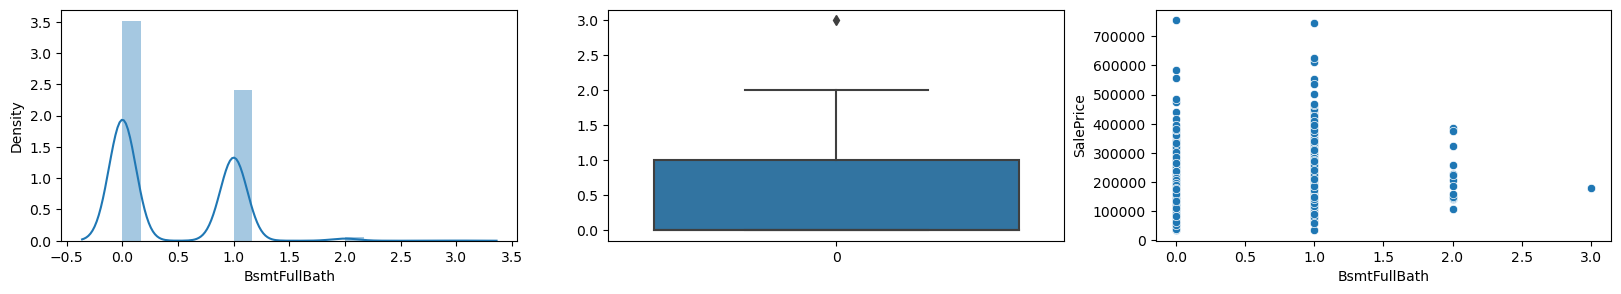

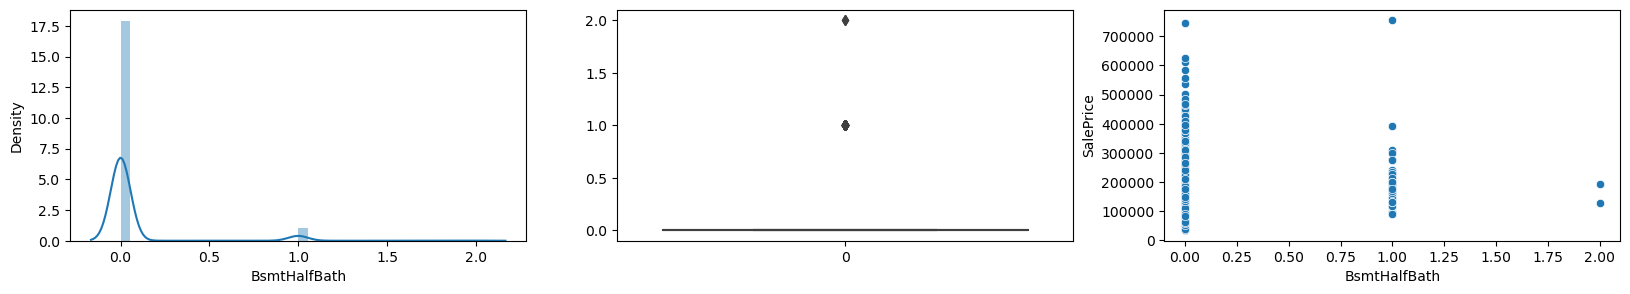

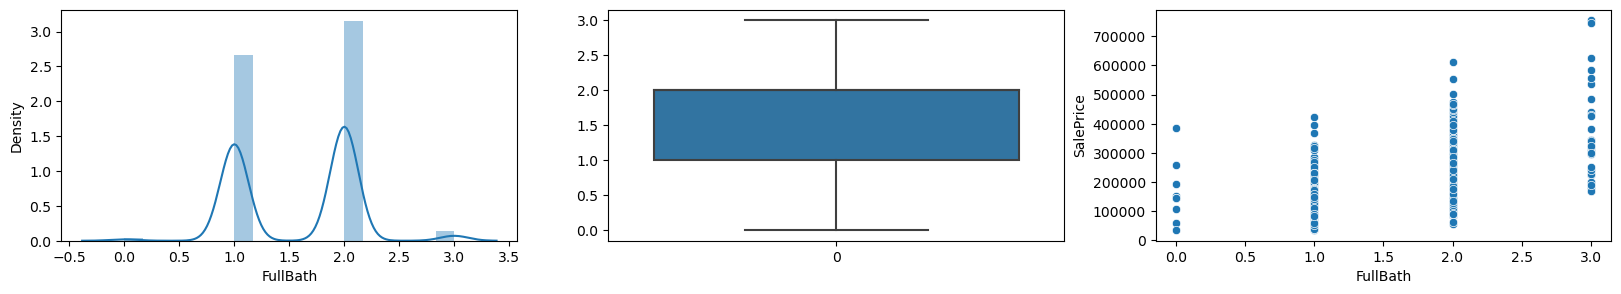

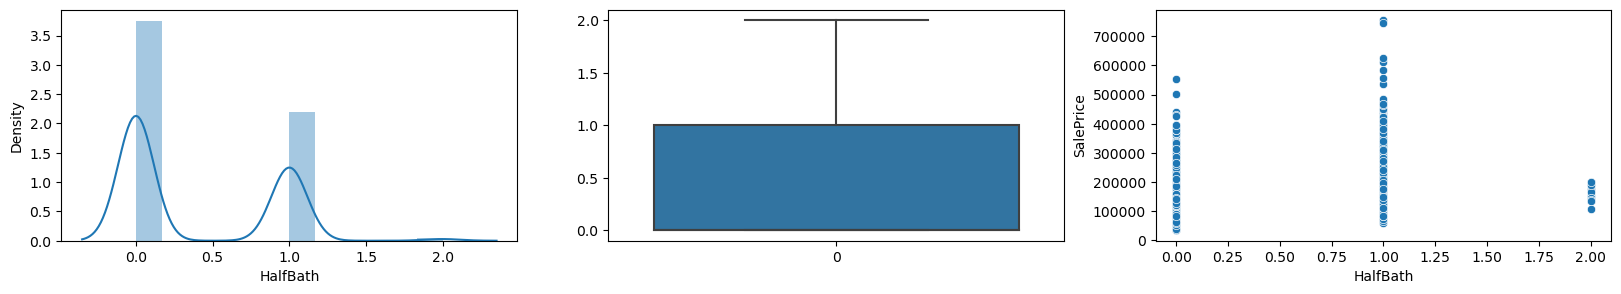

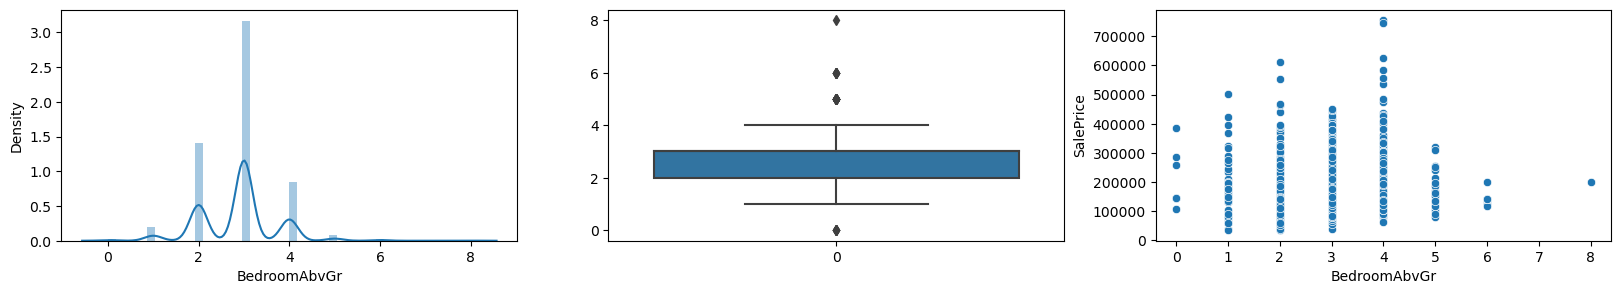

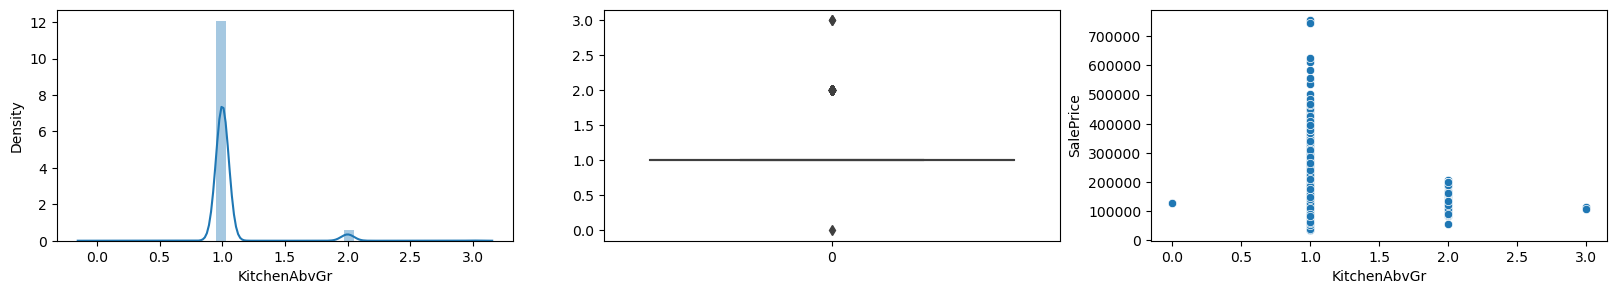

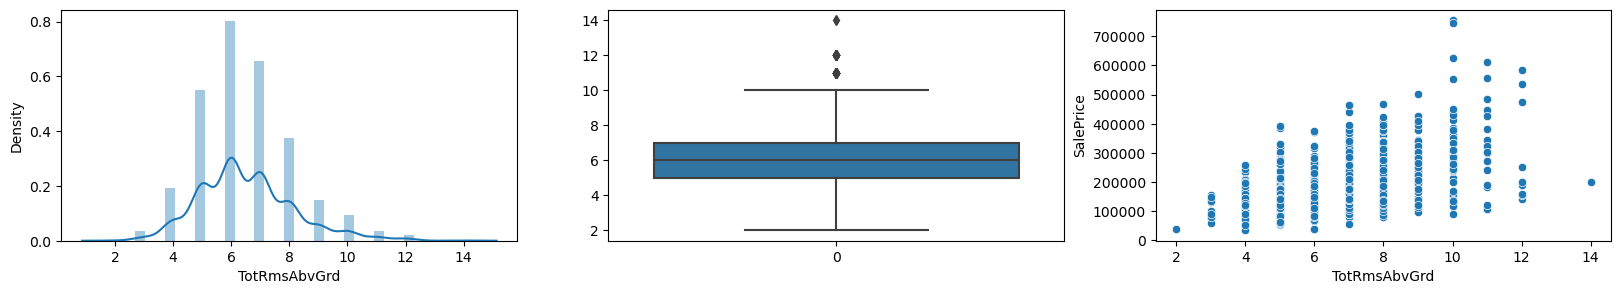

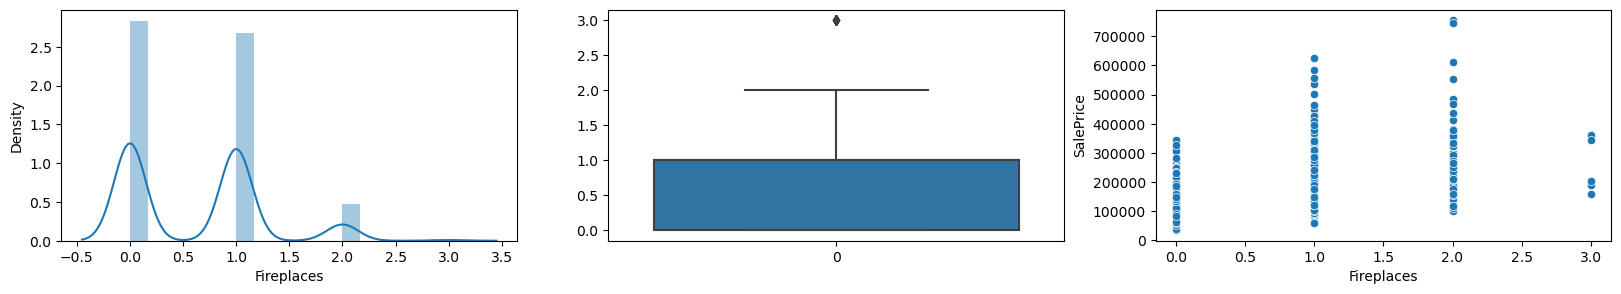

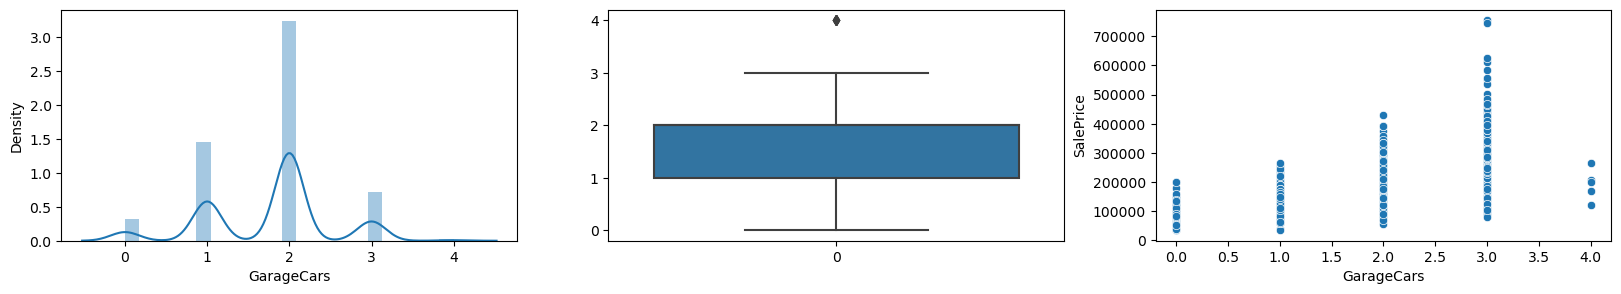

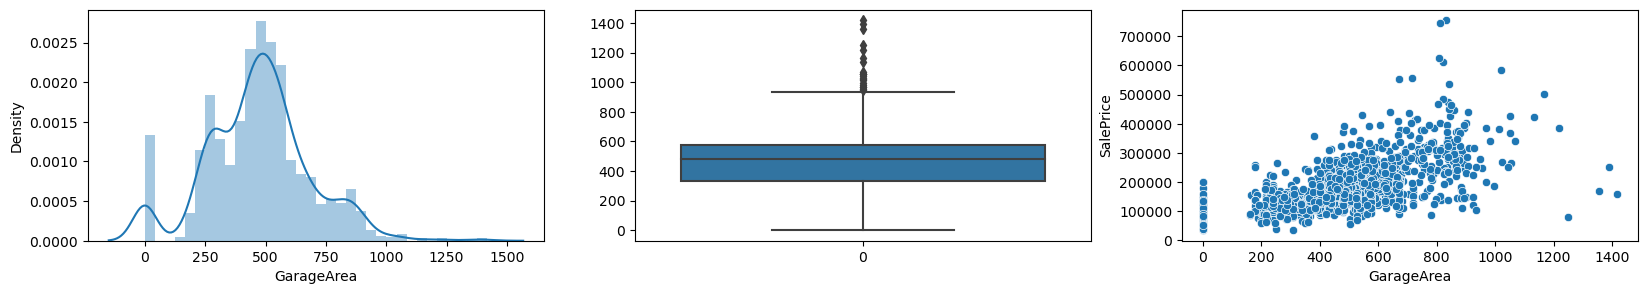

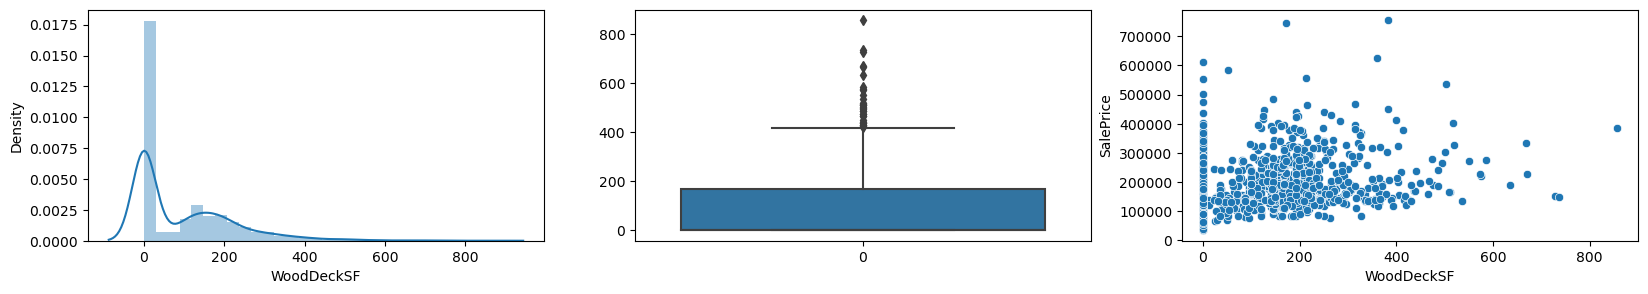

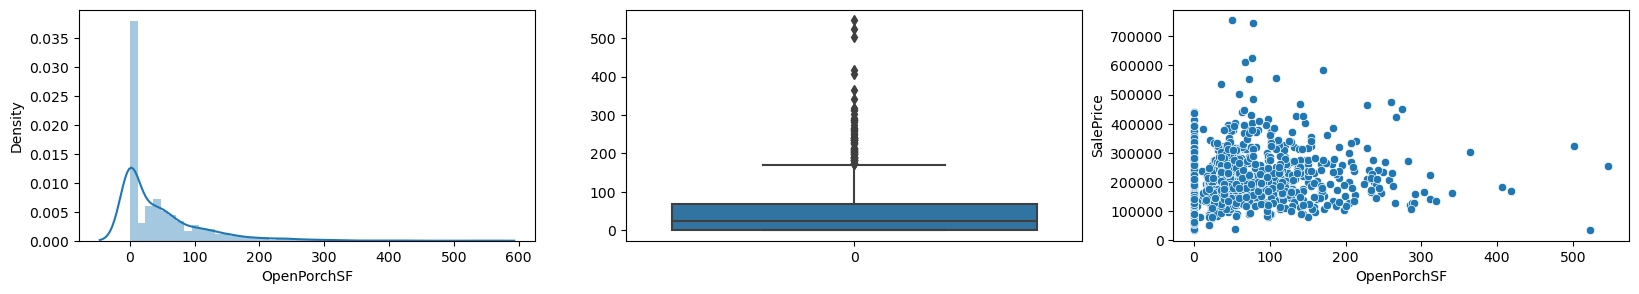

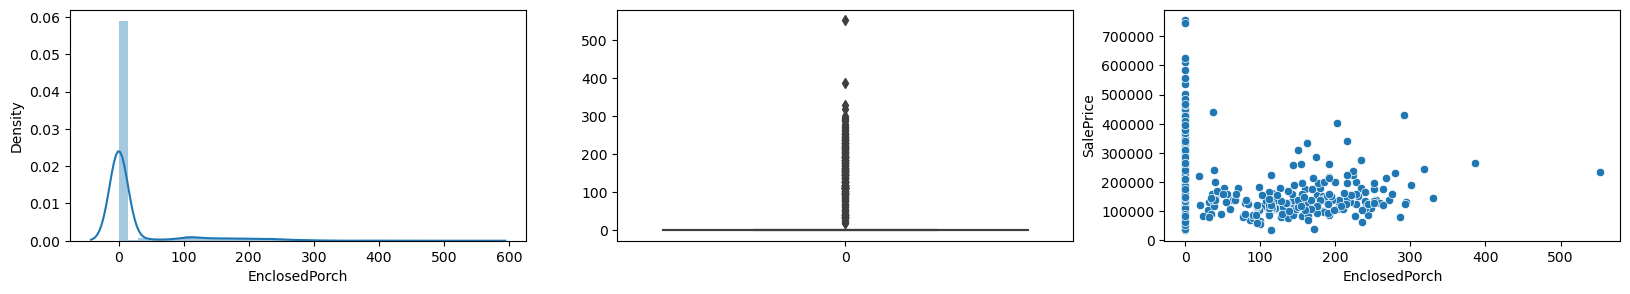

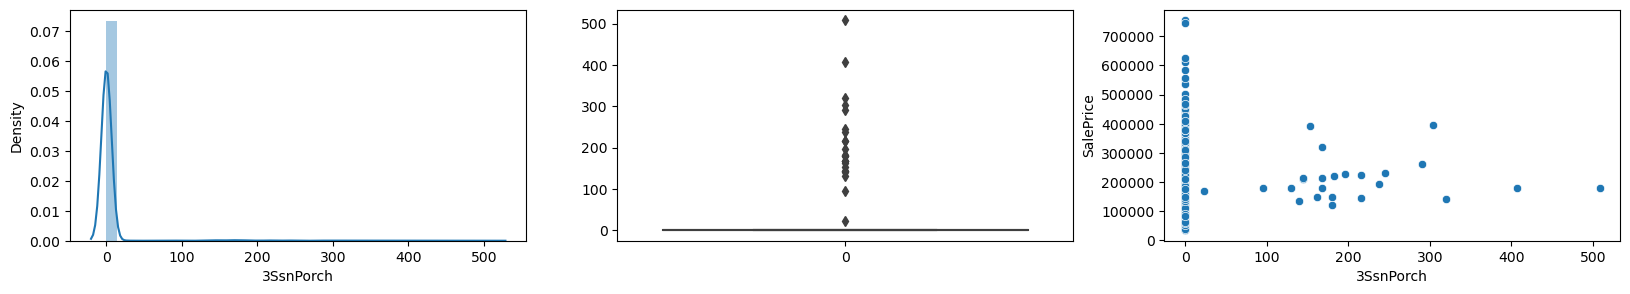

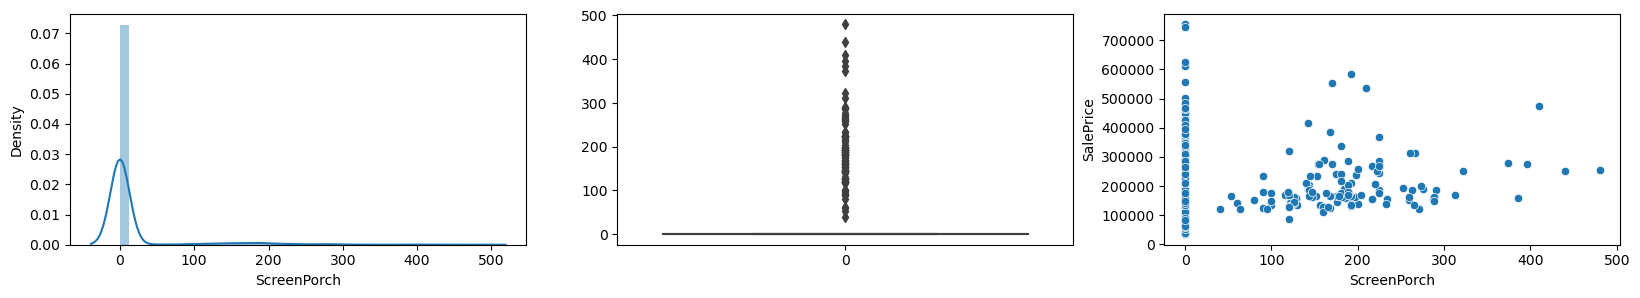

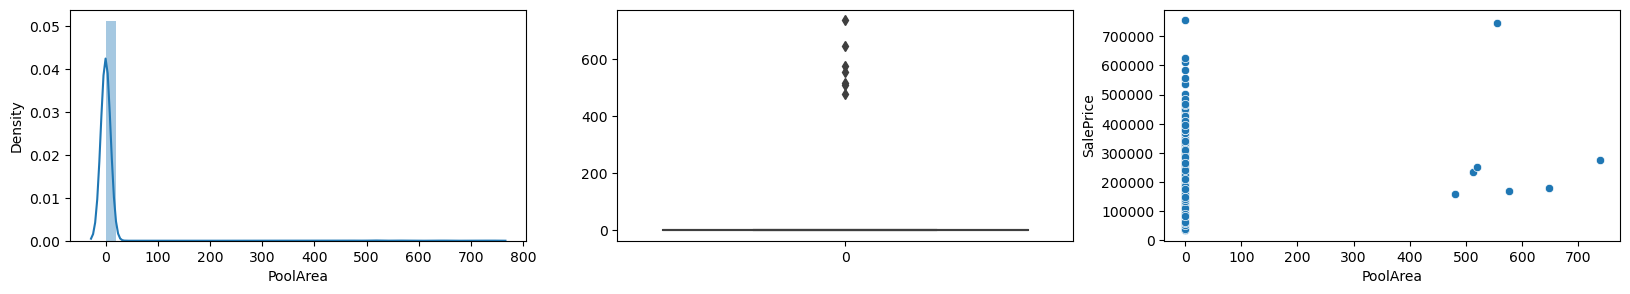

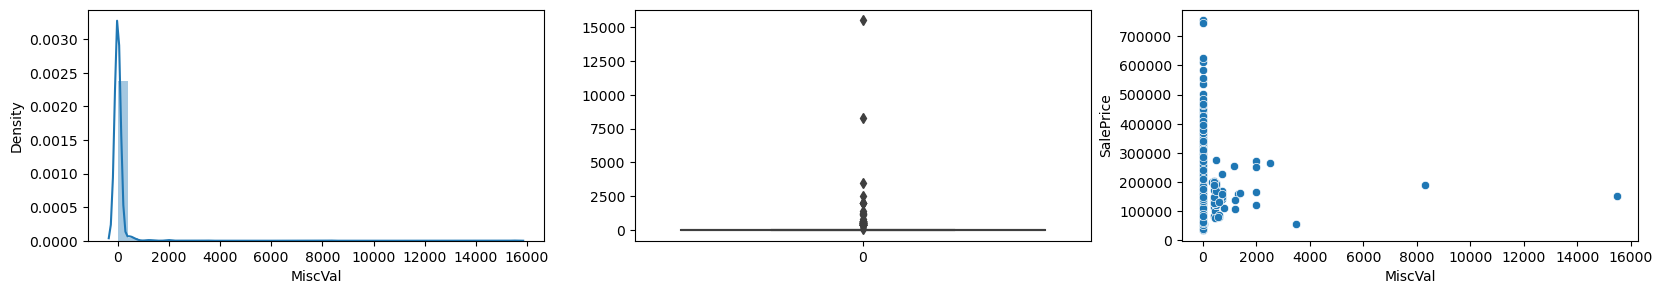

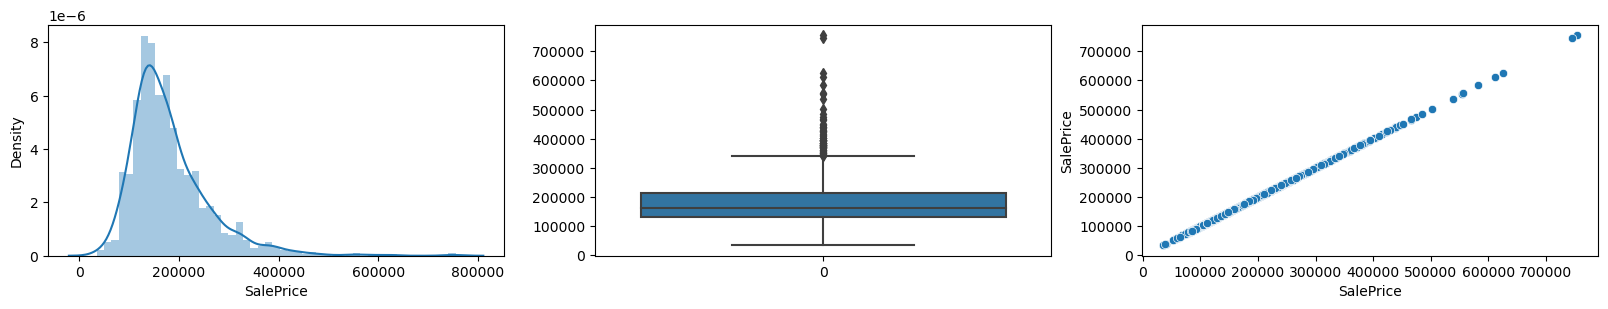

In [10]:
# Lets visualize the numerical features by doing univariate and bi-variate analysis

for col in (num_features.columns):
    plt.figure(figsize=(20, 3))
    plt.title(col, fontdict={'fontsize': 18})
    
    plt.subplot(1,3,1)
    sns.distplot(housing_df[col])
    
    plt.subplot(1,3,2)
    sns.boxplot(housing_df[col])
    
    plt.subplot(1,3,3)
    sns.scatterplot(x=housing_df[col],y="SalePrice", data=housing_df)

From the above plots we can say that:
- Most of the features have outliers so outlier treatment is necessary
- Most of the values for features BsmtFinSf2, LowQualFinSF, KitchenAbvGr, EnclosedPorch, 
  3SsnPorch, ScreenPorch,PoolArea, Miscval is 0
- GrLivArea is highly correlated to target feature SalePrice
- Sales price data is highly skewed on right side. This also need to be looked into


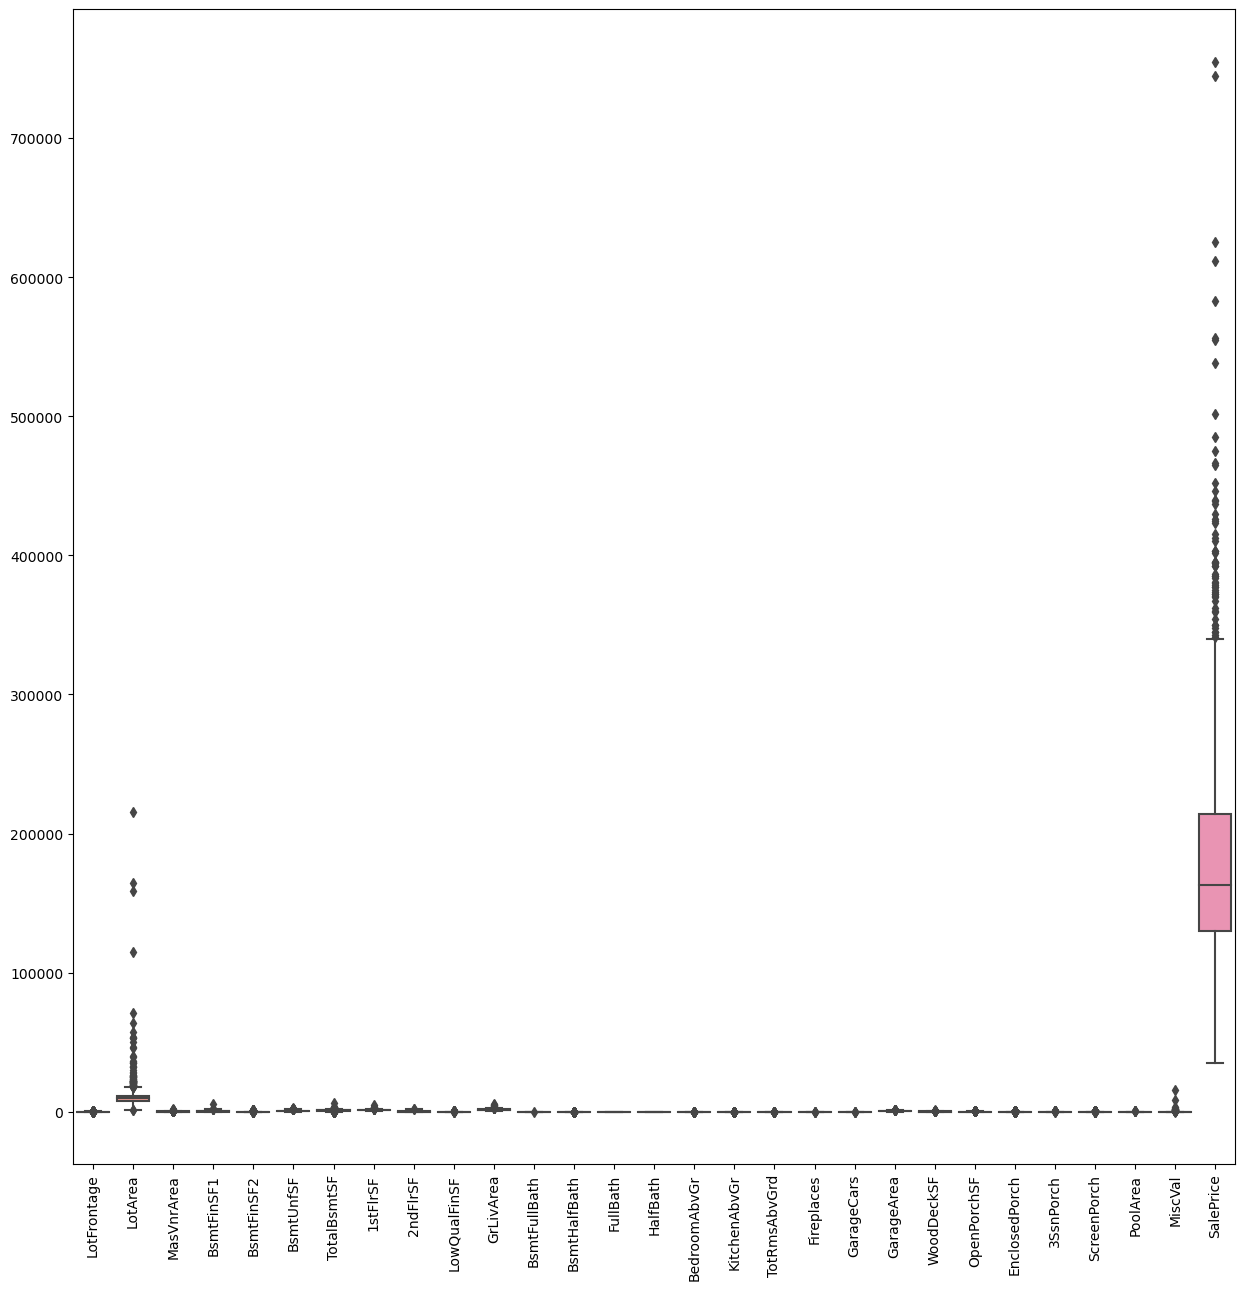

In [11]:
# Lets check what the box plot says:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=num_features);

- Outliers are clearly visible

In [12]:
# outlier treatment : Capping i.e. making the value greator than max and lower than min as max and min respectively
# max value = Q3 + IOR*1.5
# min value = Q1 - IQR*1.5
# where IQR is Inter Quartile Range ( Q3 - Q1 )

# Here we are finding the percentage of outliers in the numerical columns

count_outlier = []
per_outlier   = []
for col in (num_features.columns):
    IQR = num_features[col].quantile(.75) - num_features[col].quantile(.25)
    max_val = num_features[col].quantile(.75) + IQR*1.5  
    min_val = num_features[col].quantile(.25) - IQR*1.5 
    count = ( ((num_features[col] > max_val).sum()) + ((num_features[col] < min_val).sum()) )
    count_outlier.append(count)
    per = ( round((count / housing_df.shape[0]) * 100,2) )
    per_outlier.append(per)
    data_outlier = {'Feature': num_features.columns , 'Outlier Count': count_outlier, 'Outlier Per': per_outlier}
(pd.DataFrame(data_outlier).sort_values(by='Outlier Count', ascending = False))

Feature  Outlier Count  Outlier Per
23  EnclosedPorch            208        14.25
4      BsmtFinSF2            167        11.44
25    ScreenPorch            116         7.95
2      MasVnrArea             96         6.58
0     LotFrontage             88         6.03
12   BsmtHalfBath             82         5.62
22    OpenPorchSF             77         5.27
1         LotArea             69         4.73
16   KitchenAbvGr             68         4.66
28      SalePrice             61         4.18
6     TotalBsmtSF             61         4.18
27        MiscVal             52         3.56
15   BedroomAbvGr             35         2.40
21     WoodDeckSF             32         2.19
10      GrLivArea             31         2.12
17   TotRmsAbvGrd             30         2.05
5       BsmtUnfSF             29         1.99
9    LowQualFinSF             26         1.78
24      3SsnPorch             24         1.64
20     GarageArea             21         1.44
7        1stFlrSF             20         1.37
26       PoolArea              7         0.48
3      BsmtFinSF1              7         0.48
19     GarageCars              5         0.34
18     Fireplaces              5         0.34
8        2ndFlrSF              2         0.14
11   BsmtFullBath              1         0.07
13       FullBath              0         0.00
14       HalfBath              0         0.00

- Almost all of the numeric fetaures have outliers.
- **EnclosedPorch**,**BsmtFinSF2**,**ScreenPorch**,**MasVnrArea** has maximum outliers. 
- We will now cap these outliers to max and min values. 
- We can see that target feature **SalePrice** is also having outliers but it will excluded from capping

In [13]:
# Outlier treatment : Capping to max and min value
for col in (num_features.columns):
    IQR = num_features[col].quantile(.75) - num_features[col].quantile(.25)
    max_val = num_features[col].quantile(.75) + IQR*1.5  
    min_val = num_features[col].quantile(.25) - IQR*1.5 
   # count = ((num_features[col] > max_val).sum()) + ((num_features[col] < min_val).sum())
    num_features[col][num_features[col] > max_val] = max_val
    num_features[col][num_features[col] < min_val] = min_val

In [14]:
num_features.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count  1201.000000   1460.000000  1452.000000  1460.000000      1460.0   
mean     69.134888   9647.388014    90.192149   439.997517         0.0   
std      19.662022   3594.356399   134.925253   433.219435         0.0   
min      27.500000   1481.500000     0.000000     0.000000         0.0   
25%      59.000000   7553.500000     0.000000     0.000000         0.0   
50%      69.000000   9478.500000     0.000000   383.500000         0.0   
75%      80.000000  11601.500000   166.000000   712.250000         0.0   
max     111.500000  17673.500000   415.000000  1780.625000         0.0   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000        1460.0  ...   
mean    563.777740  1050.254795  1157.018151   346.789041           0.0  ...   
std     431.710214   397.937878   362.583002   435.791621           0.0  ...   
min       0.000000    42.000000   334.000000     0.000000           0.0  ...   
25%     223.000000   795.750000   882.000000     0.000000           0.0  ...   
50%     477.500000   991.500000  1087.000000     0.000000           0.0  ...   
75%     808.000000  1298.250000  1391.250000   728.000000           0.0  ...   
max    1685.500000  2052.000000  2155.125000  1820.000000           0.0  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000         1460.0   
mean      1.765411   470.670719    91.806849    42.603425            0.0   
std       0.742753   207.105729   116.658120    52.501584            0.0   
min       0.000000     0.000000     0.000000     0.000000            0.0   
25%       1.000000   334.500000     0.000000     0.000000            0.0   
50%       2.000000   480.000000     0.000000    25.000000            0.0   
75%       2.000000   576.000000   168.000000    68.000000            0.0   
max       3.500000   938.250000   420.000000   170.000000            0.0   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal      SalePrice  
count     1460.0       1460.0    1460.0   1460.0    1460.000000  
mean         0.0          0.0       0.0      0.0  177331.526370  
std          0.0          0.0       0.0      0.0   67205.835915  
min          0.0          0.0       0.0      0.0   34900.000000  
25%          0.0          0.0       0.0      0.0  129975.000000  
50%          0.0          0.0       0.0      0.0  163000.000000  
75%          0.0          0.0       0.0      0.0  214000.000000  
max          0.0          0.0       0.0      0.0  340037.500000  

[8 rows x 29 columns]

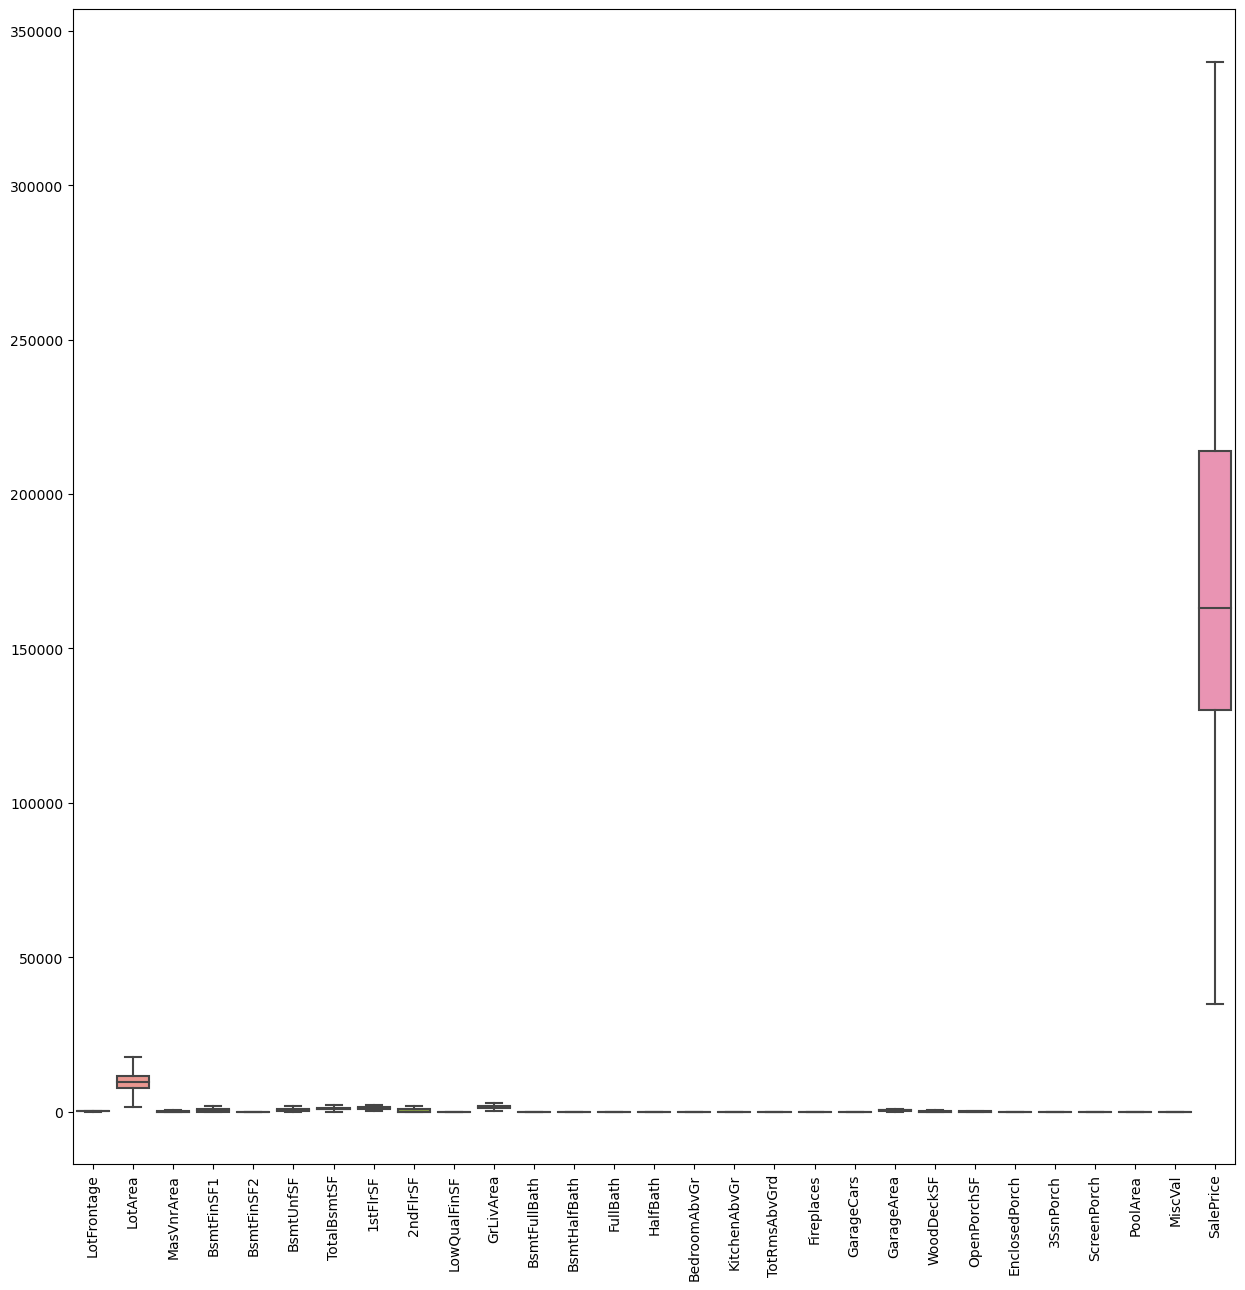

In [15]:
#Checking the box plot to see the outlier treatment
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=num_features);

As there are no more outliers, Outliers are successfully treated

In [16]:
# Checking the values in following columns as these columns has most of the values as 0

for col in ['PoolArea','3SsnPorch','MiscVal','ScreenPorch','BsmtHalfBath','EnclosedPorch','LowQualFinSF','BsmtFinSF2','KitchenAbvGr']:
    print(f'Value Count and %age of 0 value for feature {col} is:')
    print( (num_features[col] == 0).sum() , round((num_features[col] == 0).sum()/num_features.shape[0] * 100,2))
    

Value Count and %age of 0 value for feature PoolArea is:
1460 100.0
Value Count and %age of 0 value for feature 3SsnPorch is:
1460 100.0
Value Count and %age of 0 value for feature MiscVal is:
1460 100.0
Value Count and %age of 0 value for feature ScreenPorch is:
1460 100.0
Value Count and %age of 0 value for feature BsmtHalfBath is:
1460 100.0
Value Count and %age of 0 value for feature EnclosedPorch is:
1460 100.0
Value Count and %age of 0 value for feature LowQualFinSF is:
1460 100.0
Value Count and %age of 0 value for feature BsmtFinSF2 is:
1460 100.0
Value Count and %age of 0 value for feature KitchenAbvGr is:
0 0.0


Feature KitchenAbvGr is not having any 0 values lets check its value count separately

In [17]:
num_features.KitchenAbvGr.value_counts()

1    1460
Name: KitchenAbvGr, dtype: int64

This column is having all the value as 1 <br>
We can remove all these columns


In [18]:
# dropping the columns 'PoolArea','3SsnPorch','MiscVal','ScreenPorch','EnclosedPorch','LowQualFinSF','BsmtFinSF2','KitchenAbvGr'
num_features.drop(columns = ['PoolArea','3SsnPorch','MiscVal','ScreenPorch','BsmtHalfBath','EnclosedPorch','LowQualFinSF','BsmtFinSF2','KitchenAbvGr'], inplace = True)
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   float64
 2   MasVnrArea    1452 non-null   float64
 3   BsmtFinSF1    1460 non-null   float64
 4   BsmtUnfSF     1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   float64
 7   2ndFlrSF      1460 non-null   int64  
 8   GrLivArea     1460 non-null   float64
 9   BsmtFullBath  1460 non-null   float64
 10  FullBath      1460 non-null   int64  
 11  HalfBath      1460 non-null   int64  
 12  BedroomAbvGr  1460 non-null   float64
 13  TotRmsAbvGrd  1460 non-null   int64  
 14  Fireplaces    1460 non-null   float64
 15  GarageCars    1460 non-null   float64
 16  GarageArea    1460 non-null   float64
 17  WoodDeckSF    1460 non-null   int64  
 18  OpenPorchSF   1460 non-null 

Lets check the correlation among the rest of the numerical features

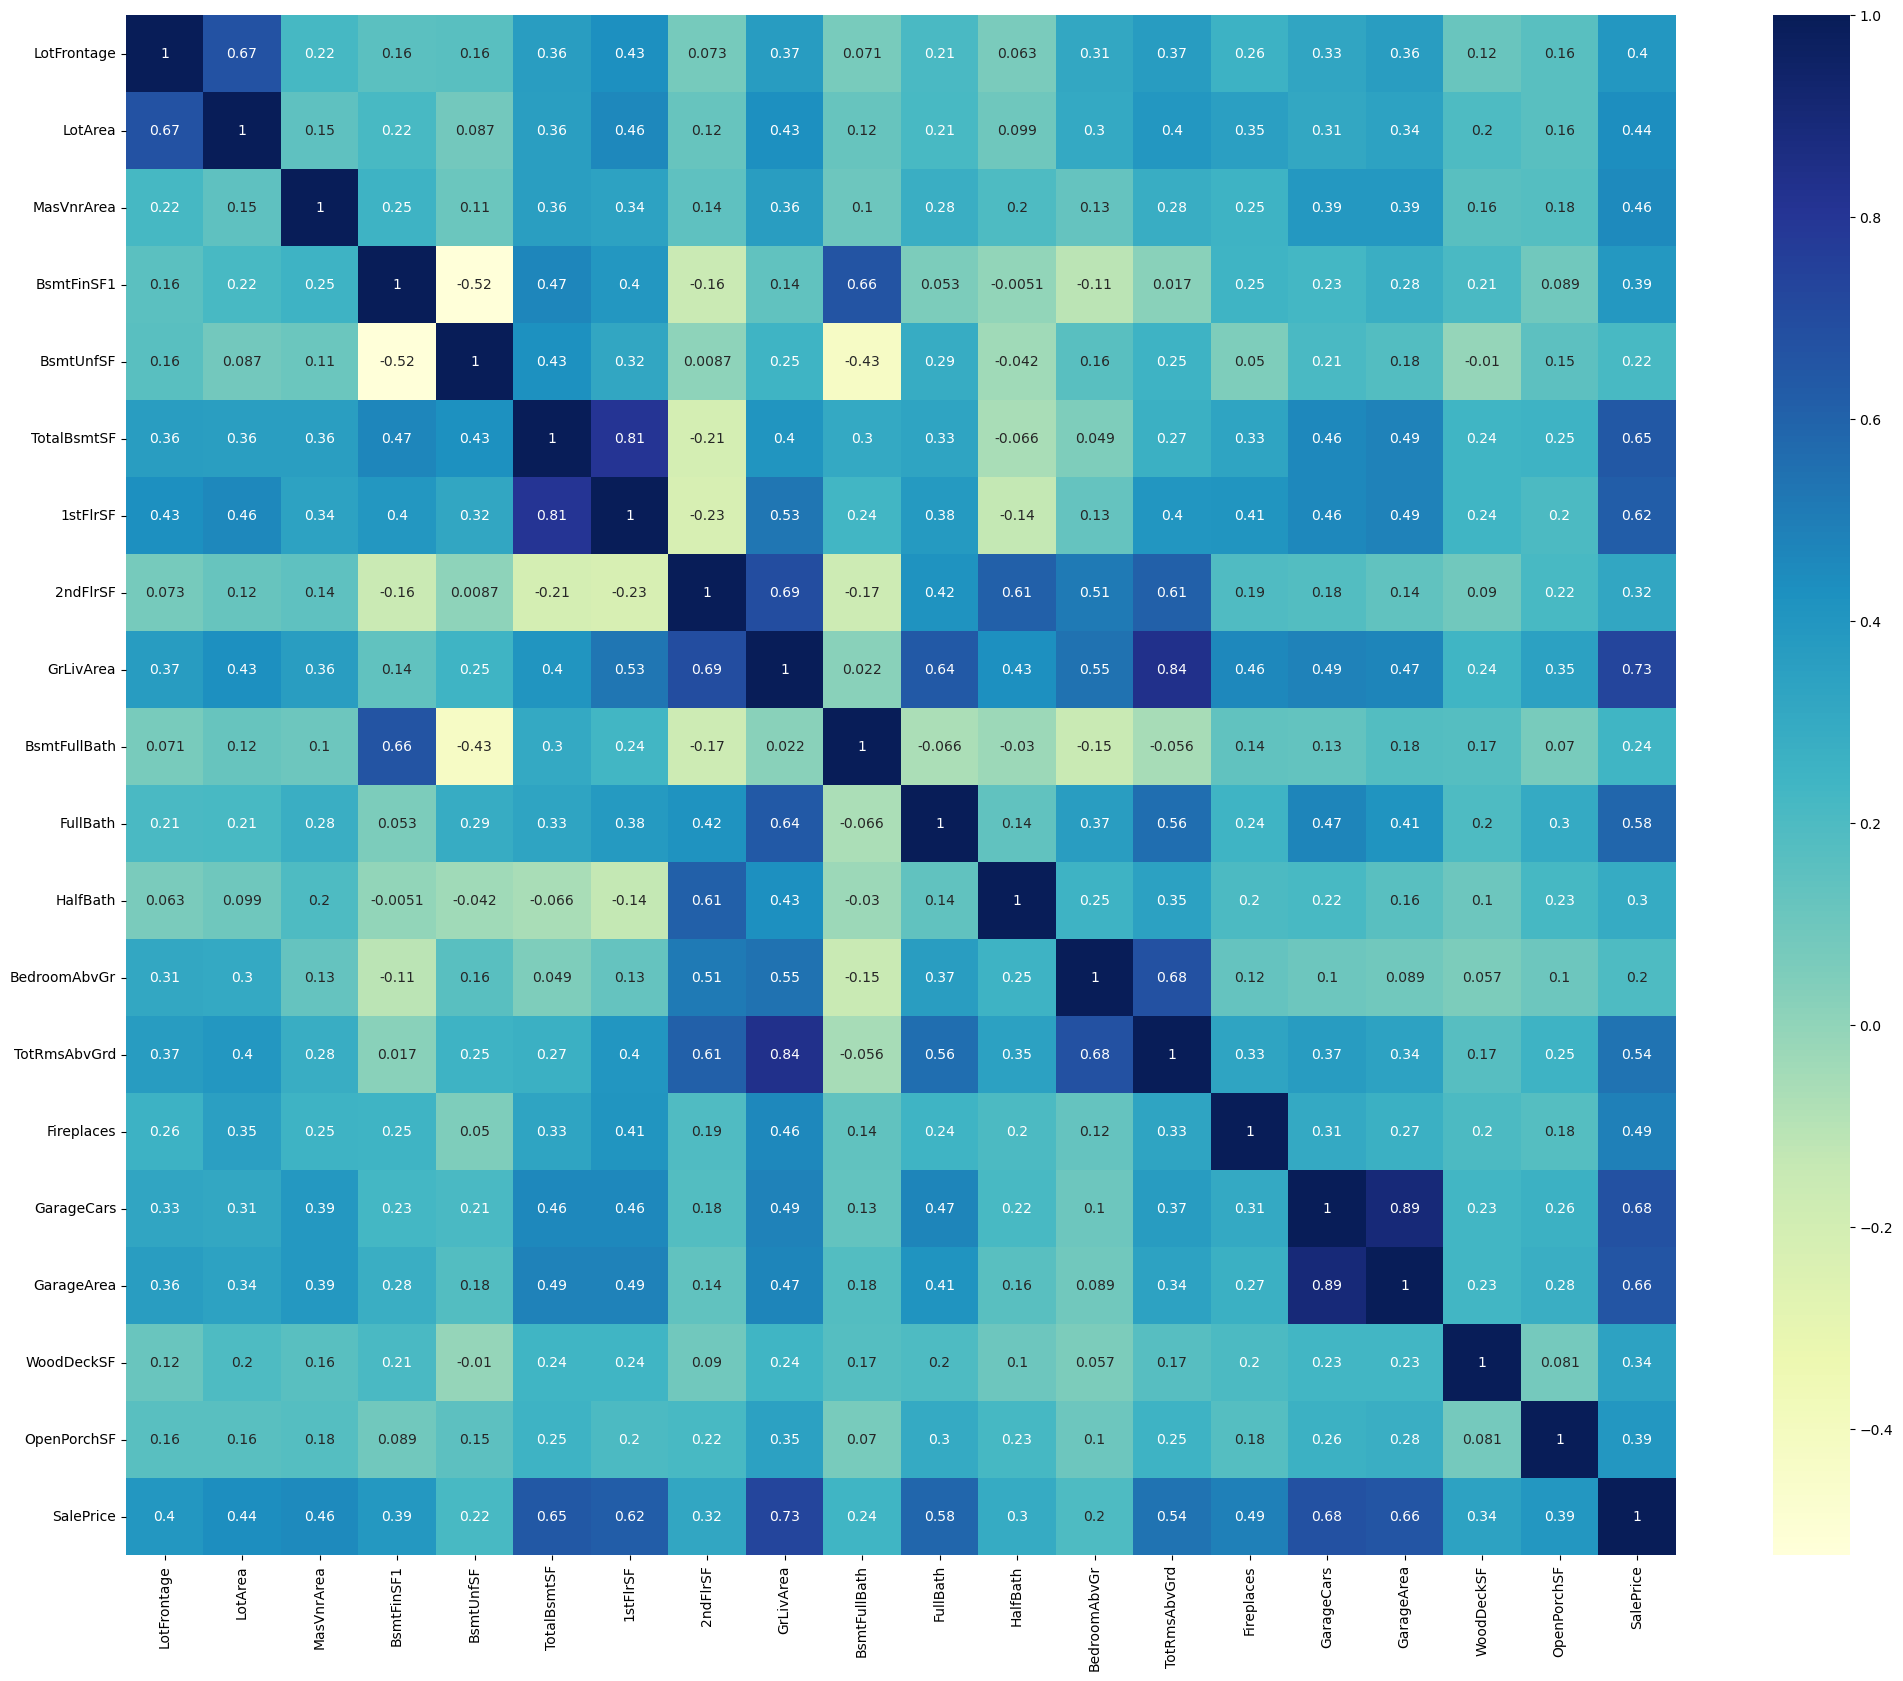

In [19]:
# creating heatmap

plt.figure(figsize=(25, 20))
sns.heatmap(num_features.corr(), annot=True, cmap="YlGnBu")
plt.show()

Here we can see some good correlations like:
- GarageCars and GarageArea (0.89)
- TotRmsAbvGrd and GrLivArea (0.84)
- TotalBsmtSF and 1stflrSF (0.81)
- Features like 'TotalBsmtSF', '1stFlrSF', 'GrLivArea' are showing positive correlation with SalePrice.

So we can remove GarageCars, TotRmsAbvGrd and 1stflrSF

In [20]:
# dropping the columns GarageCars, TotRmsAbvGrd and 1stflrSF
num_features.drop(columns=['GarageCars','TotRmsAbvGrd','1stFlrSF'], inplace = True)
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   float64
 2   MasVnrArea    1452 non-null   float64
 3   BsmtFinSF1    1460 non-null   float64
 4   BsmtUnfSF     1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   int64  
 6   2ndFlrSF      1460 non-null   int64  
 7   GrLivArea     1460 non-null   float64
 8   BsmtFullBath  1460 non-null   float64
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   float64
 12  Fireplaces    1460 non-null   float64
 13  GarageArea    1460 non-null   float64
 14  WoodDeckSF    1460 non-null   int64  
 15  OpenPorchSF   1460 non-null   int64  
 16  SalePrice     1460 non-null   float64
dtypes: float64(11), int64(6)
memory usage: 194.0 KB


Lets do last step of checking missing values in numerical columns

In [21]:
# Checking missing values in numerical columns
num_features.isna().sum()

LotFrontage     259
LotArea           0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
Fireplaces        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

Here only **LotFrontage** and **MasVnrArea** has the missing values.<br>
259 is good no. of values so instead of removing the missing values , we can fill the missing values either with mean or median.

In [22]:
num_features[['LotFrontage','MasVnrArea']].describe()

LotFrontage   MasVnrArea
count  1201.000000  1452.000000
mean     69.134888    90.192149
std      19.662022   134.925253
min      27.500000     0.000000
25%      59.000000     0.000000
50%      69.000000     0.000000
75%      80.000000   166.000000
max     111.500000   415.000000

In [23]:
# Filling missing value by using mean for LotFrontage as mean and median are equal

num_features.LotFrontage.fillna(housing_df.LotFrontage.mean(), inplace = True)

In [24]:
# filling missing value by median for MasVnrArea as there is difference between mean and median
num_features.MasVnrArea.fillna(housing_df.MasVnrArea.mean(), inplace = True)

In [25]:
num_features.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.297219   9647.388014    90.266084   439.997517   563.777740   
std      17.835063   3594.356399   134.558522   433.219435   431.710214   
min      27.500000   1481.500000     0.000000     0.000000     0.000000   
25%      60.000000   7553.500000     0.000000     0.000000   223.000000   
50%      70.049958   9478.500000     0.000000   383.500000   477.500000   
75%      79.000000  11601.500000   164.250000   712.250000   808.000000   
max     111.500000  17673.500000   415.000000  1780.625000  1685.500000   

       TotalBsmtSF     2ndFlrSF    GrLivArea  BsmtFullBath     FullBath  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1050.254795   346.789041  1503.735873      0.425000     1.565068   
std     397.937878   435.791621   481.375641      0.517373     0.550916   
min      42.000000     0.000000   334.000000      0.000000     0.000000   
25%     795.750000     0.000000  1129.500000      0.000000     1.000000   
50%     991.500000     0.000000  1464.000000      0.000000     2.000000   
75%    1298.250000   728.000000  1776.750000      1.000000     2.000000   
max    2052.000000  1820.000000  2747.625000      2.500000     3.000000   

          HalfBath  BedroomAbvGr   Fireplaces   GarageArea   WoodDeckSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.382877      2.851712     0.611301   470.670719    91.806849   
std       0.502885      0.759516     0.638959   207.105729   116.658120   
min       0.000000      0.500000     0.000000     0.000000     0.000000   
25%       0.000000      2.000000     0.000000   334.500000     0.000000   
50%       0.000000      3.000000     1.000000   480.000000     0.000000   
75%       1.000000      3.000000     1.000000   576.000000   168.000000   
max       2.000000      4.500000     2.500000   938.250000   420.000000   

       OpenPorchSF      SalePrice  
count  1460.000000    1460.000000  
mean     42.603425  177331.526370  
std      52.501584   67205.835915  
min       0.000000   34900.000000  
25%       0.000000  129975.000000  
50%      25.000000  163000.000000  
75%      68.000000  214000.000000  
max     170.000000  340037.500000

Analysis for numerical features are done.

### Analysing Categorical features
Here we will analyse the Categorical data, visualize it and clean it as well.

In [26]:
# Checking the unique values in categorical features
val=[]
for col in cat_features.columns:
    val.append(housing_df[col].nunique())
data = {'Column':cat_features.columns, 'Unique_val':val }
pd.DataFrame(data)
    

Column  Unique_val
0      MSSubClass          15
1        MSZoning           5
2          Street           2
3           Alley           2
4        LotShape           4
5     LandContour           4
6       Utilities           2
7       LotConfig           5
8       LandSlope           3
9    Neighborhood          25
10     Condition1           9
11     Condition2           8
12       BldgType           5
13     HouseStyle           8
14    OverallQual          10
15    OverallCond           9
16      YearBuilt         112
17   YearRemodAdd          61
18      RoofStyle           6
19       RoofMatl           8
20    Exterior1st          15
21    Exterior2nd          16
22     MasVnrType           4
23      ExterQual           4
24      ExterCond           5
25     Foundation           6
26       BsmtQual           4
27       BsmtCond           4
28   BsmtExposure           4
29   BsmtFinType1           6
30   BsmtFinType2           6
31        Heating           6
32      HeatingQC           5
33     CentralAir           2
34     Electrical           5
35    KitchenQual           4
36     Functional           7
37    FireplaceQu           5
38     GarageType           6
39    GarageYrBlt          97
40   GarageFinish           3
41     GarageQual           5
42     GarageCond           5
43     PavedDrive           3
44         PoolQC           3
45          Fence           4
46    MiscFeature           4
47         MoSold          12
48         YrSold           5
49       SaleType           9
50  SaleCondition           6

Here we dont have any feature where we have single unique value. Hence we can keep all features.

In [27]:
# Checking the missing values in categorical columns
val_count=[]
for col in cat_features.columns:
    val_count.append(housing_df[col].value_counts().sum())
data = {'Column':cat_features.columns, 'Value Count':val_count }
pd.DataFrame(data)

Column  Value Count
0      MSSubClass         1460
1        MSZoning         1460
2          Street         1460
3           Alley           91
4        LotShape         1460
5     LandContour         1460
6       Utilities         1460
7       LotConfig         1460
8       LandSlope         1460
9    Neighborhood         1460
10     Condition1         1460
11     Condition2         1460
12       BldgType         1460
13     HouseStyle         1460
14    OverallQual         1460
15    OverallCond         1460
16      YearBuilt         1460
17   YearRemodAdd         1460
18      RoofStyle         1460
19       RoofMatl         1460
20    Exterior1st         1460
21    Exterior2nd         1460
22     MasVnrType         1452
23      ExterQual         1460
24      ExterCond         1460
25     Foundation         1460
26       BsmtQual         1423
27       BsmtCond         1423
28   BsmtExposure         1422
29   BsmtFinType1         1423
30   BsmtFinType2         1422
31        Heating         1460
32      HeatingQC         1460
33     CentralAir         1460
34     Electrical         1459
35    KitchenQual         1460
36     Functional         1460
37    FireplaceQu          770
38     GarageType         1379
39    GarageYrBlt         1379
40   GarageFinish         1379
41     GarageQual         1379
42     GarageCond         1379
43     PavedDrive         1460
44         PoolQC            7
45          Fence          281
46    MiscFeature           54
47         MoSold         1460
48         YrSold         1460
49       SaleType         1460
50  SaleCondition         1460

In [28]:
# Lets further analyse these columns
for col in ['Alley','PoolQC','Fence', 'MiscFeature','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2']:
    print(f'Missing Value for col {col} is :  {cat_features[col].isnull().sum()}' )


Missing Value for col Alley is :  1369
Missing Value for col PoolQC is :  1453
Missing Value for col Fence is :  1179
Missing Value for col MiscFeature is :  1406
Missing Value for col FireplaceQu is :  690
Missing Value for col GarageType is :  81
Missing Value for col GarageFinish is :  81
Missing Value for col GarageQual is :  81
Missing Value for col GarageCond is :  81
Missing Value for col BsmtQual is :  37
Missing Value for col BsmtCond is :  37
Missing Value for col BsmtExposure is :  38
Missing Value for col BsmtFinType1 is :  37
Missing Value for col BsmtFinType2 is :  38


**On deeper look**:
- NA in column 'Alley' means No Alley 
- For 'POOLQC' , NA means no pool 
- For 'Fence' , NA means no Fence 
- NA in Column FireplaceQu, means No Fireplace
- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2, NA means 'No basement'
- For GarageType, GarageFinish, GarageQual, GarageCond , NA  means 'No garage'
- For MiscFeature, NA means no additional features 


So replacing the meaning full values in these columns

In [29]:
# replacing NA in following columns with meaning full names

cat_features.Alley.fillna('No Alley',inplace = True)
cat_features.PoolQC.fillna('No Pool',inplace = True)
cat_features.Fence.fillna('No Fence',inplace = True)
cat_features.MiscFeature.fillna('None',inplace = True)
cat_features.FireplaceQu.fillna('No Fireplace',inplace = True)

for col in ['GarageType','GarageFinish','GarageQual','GarageCond']:
    cat_features[col].fillna('No Garage', inplace = True)
    
for col in ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2' ]:    cat_features[col].fillna('No Basement', inplace = True)
    
    

In [30]:
# Checking the Value Count again
val_count=[]
for col in cat_features.columns:
    val_count.append(cat_features[col].value_counts().sum())
data = {'Column':cat_features.columns, 'Value_Count':val_count }
pd.DataFrame(data)

Column  Value_Count
0      MSSubClass         1460
1        MSZoning         1460
2          Street         1460
3           Alley         1460
4        LotShape         1460
5     LandContour         1460
6       Utilities         1460
7       LotConfig         1460
8       LandSlope         1460
9    Neighborhood         1460
10     Condition1         1460
11     Condition2         1460
12       BldgType         1460
13     HouseStyle         1460
14    OverallQual         1460
15    OverallCond         1460
16      YearBuilt         1460
17   YearRemodAdd         1460
18      RoofStyle         1460
19       RoofMatl         1460
20    Exterior1st         1460
21    Exterior2nd         1460
22     MasVnrType         1452
23      ExterQual         1460
24      ExterCond         1460
25     Foundation         1460
26       BsmtQual         1460
27       BsmtCond         1460
28   BsmtExposure         1460
29   BsmtFinType1         1460
30   BsmtFinType2         1460
31        Heating         1460
32      HeatingQC         1460
33     CentralAir         1460
34     Electrical         1459
35    KitchenQual         1460
36     Functional         1460
37    FireplaceQu         1460
38     GarageType         1460
39    GarageYrBlt         1379
40   GarageFinish         1460
41     GarageQual         1460
42     GarageCond         1460
43     PavedDrive         1460
44         PoolQC         1460
45          Fence         1460
46    MiscFeature         1460
47         MoSold         1460
48         YrSold         1460
49       SaleType         1460
50  SaleCondition         1460

In [31]:
cat_features.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Visualising Categorical Variables

Here we are doing 
- Univariate analysis to understand the distribution of the feature
- Bivariate analysis to understand the distribution of feature w.r.t to target feature i.e. SalePrice

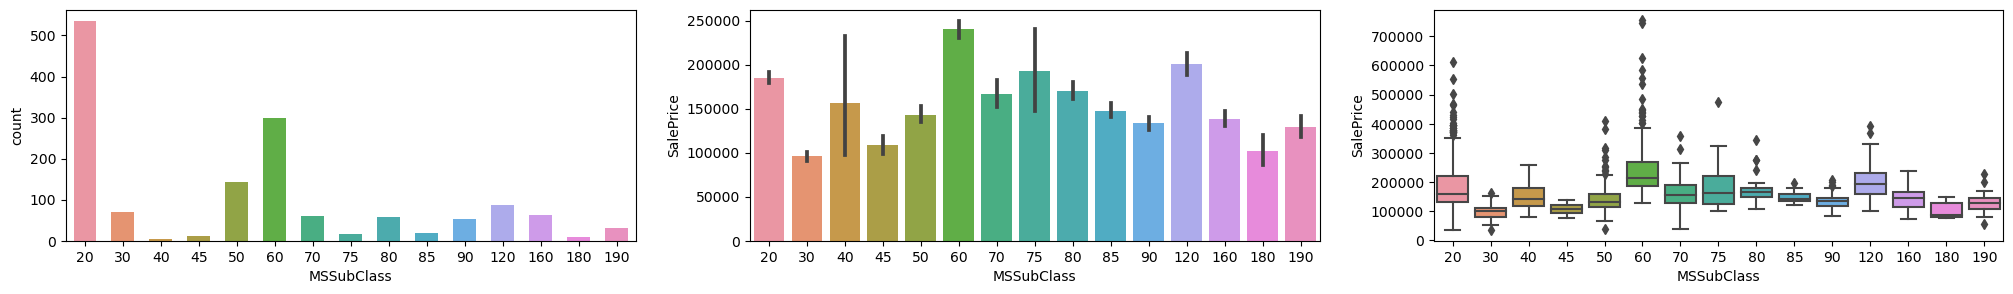

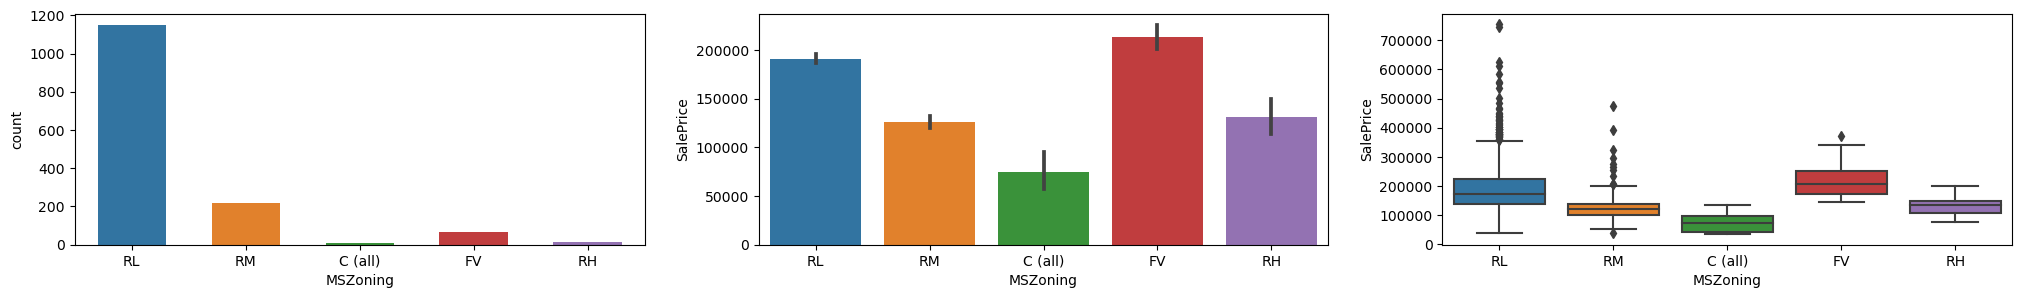

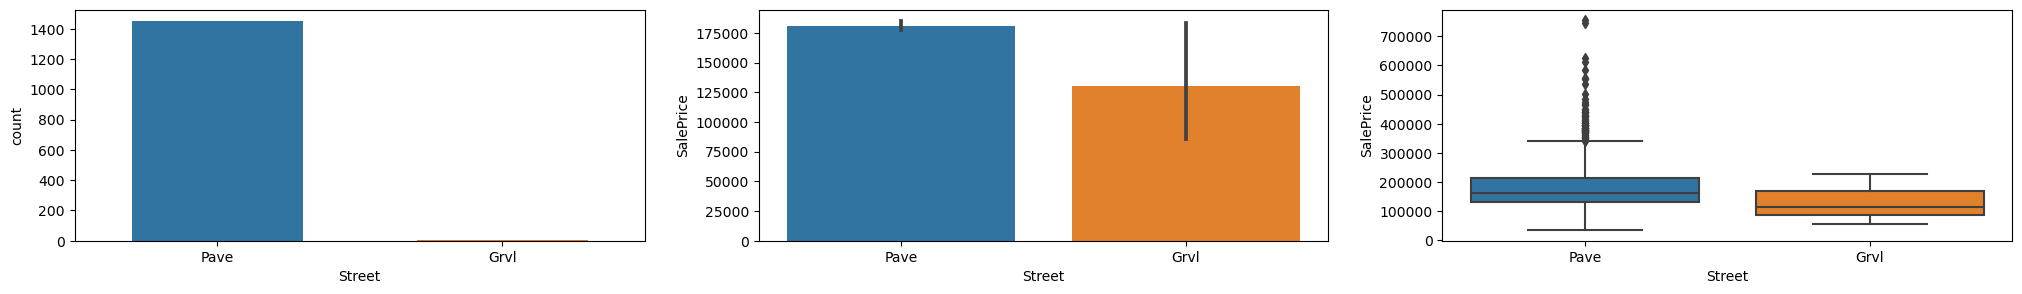

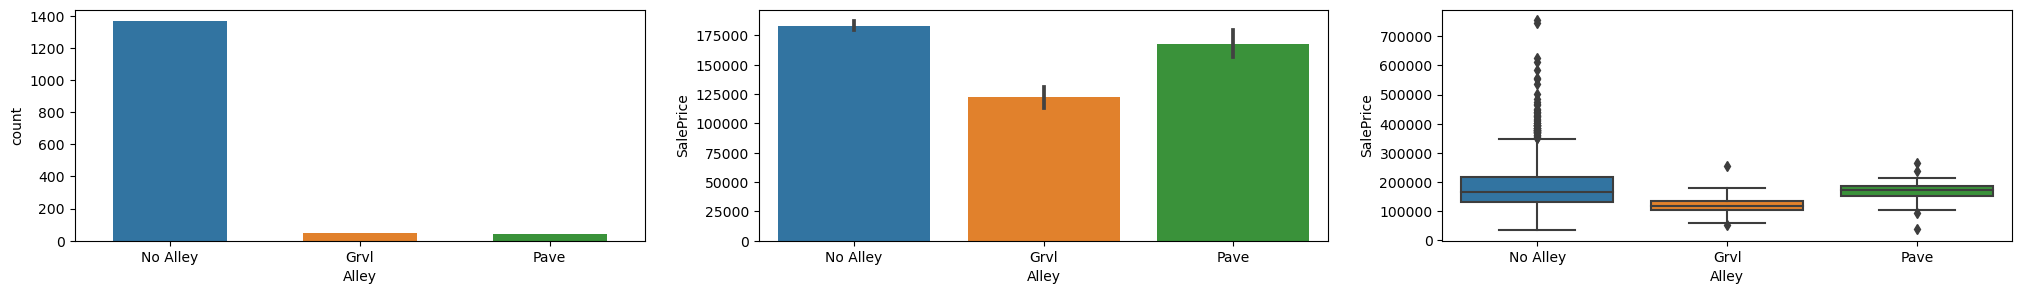

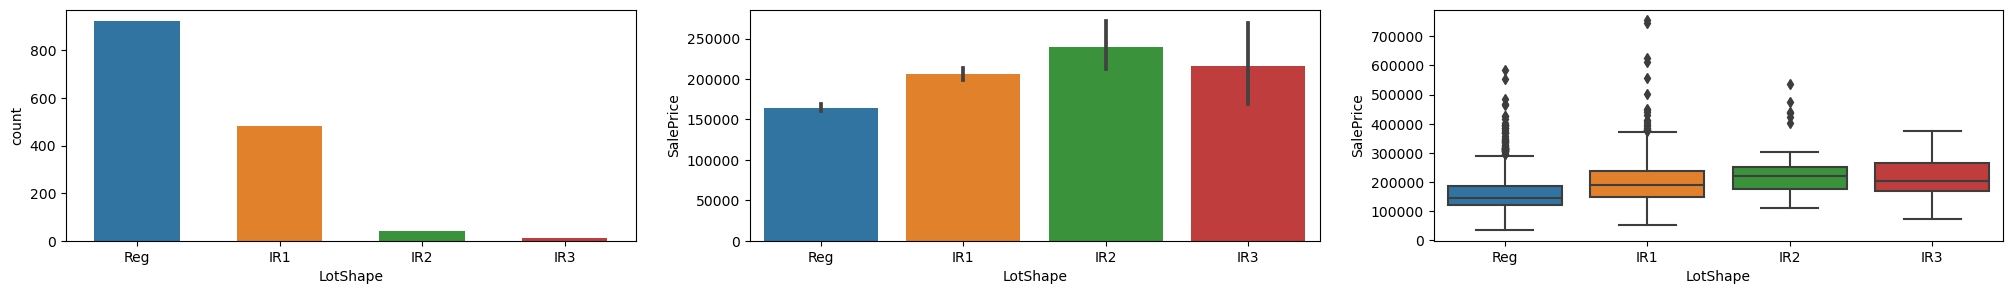

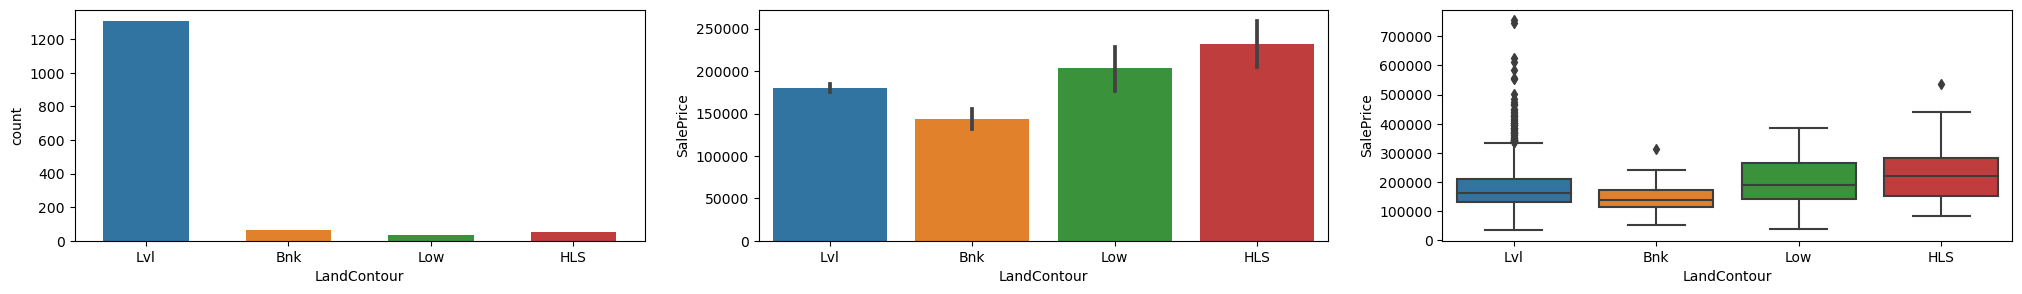

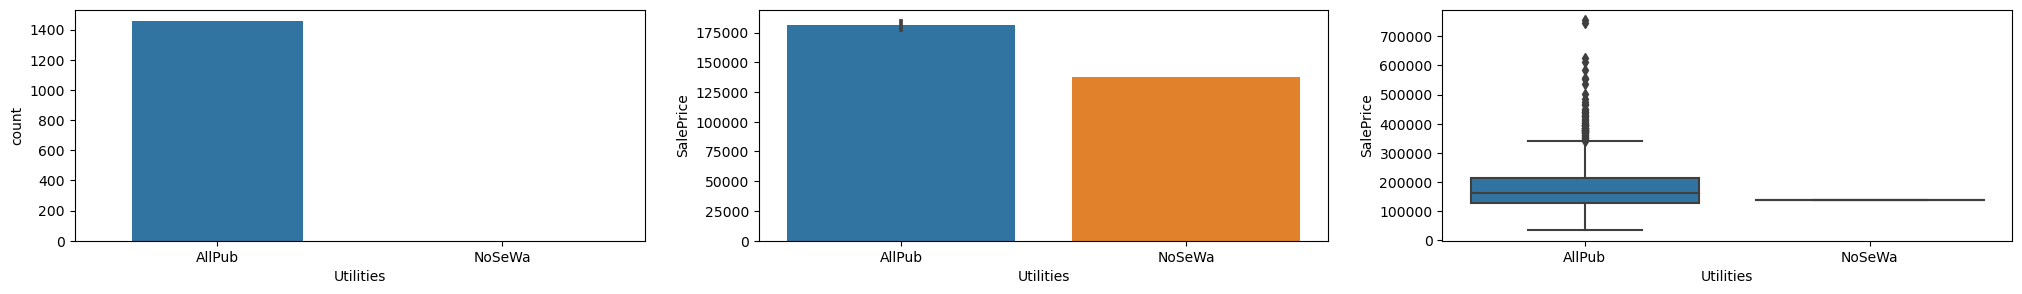

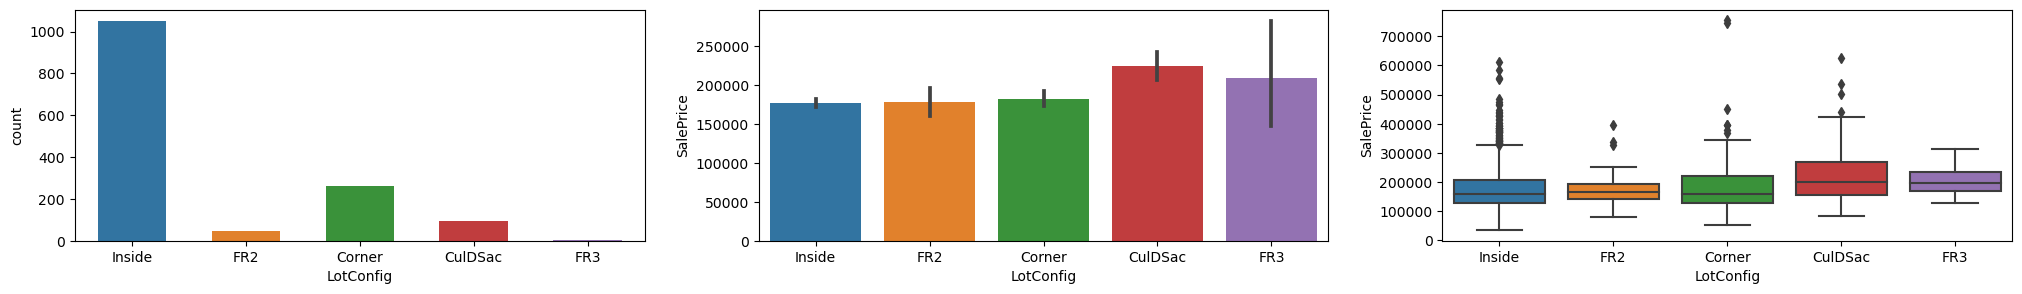

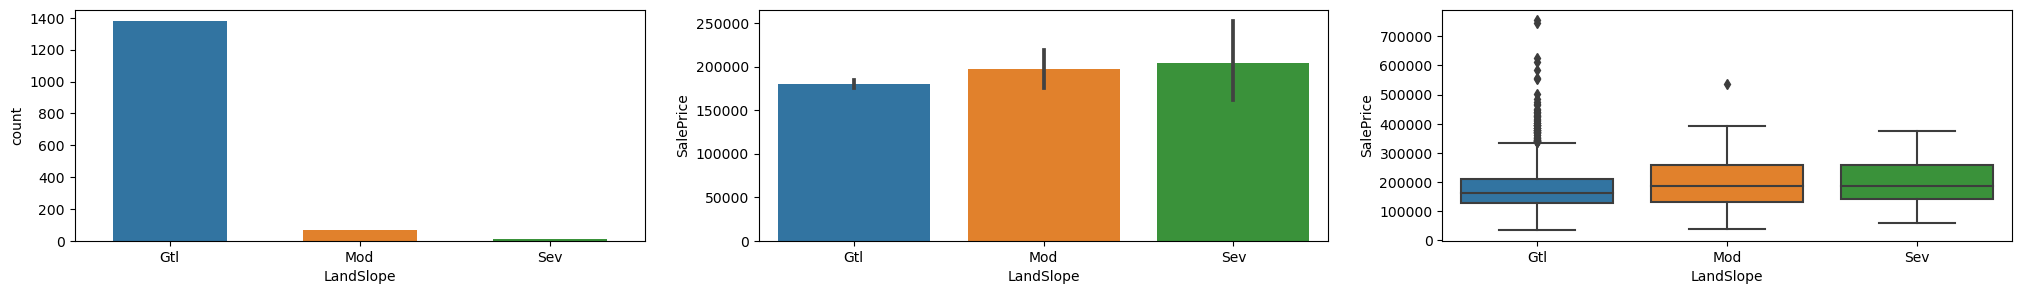

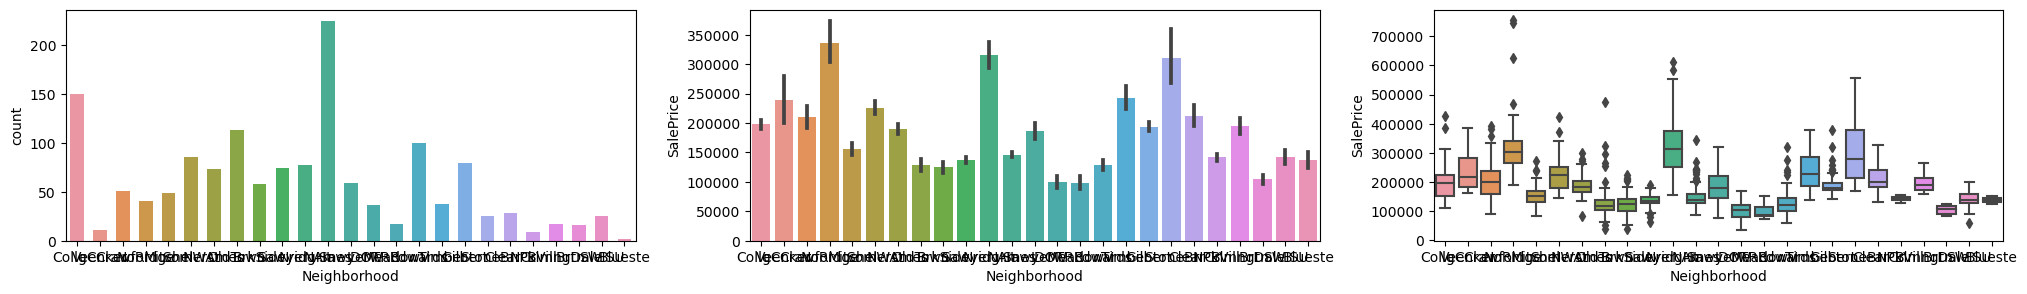

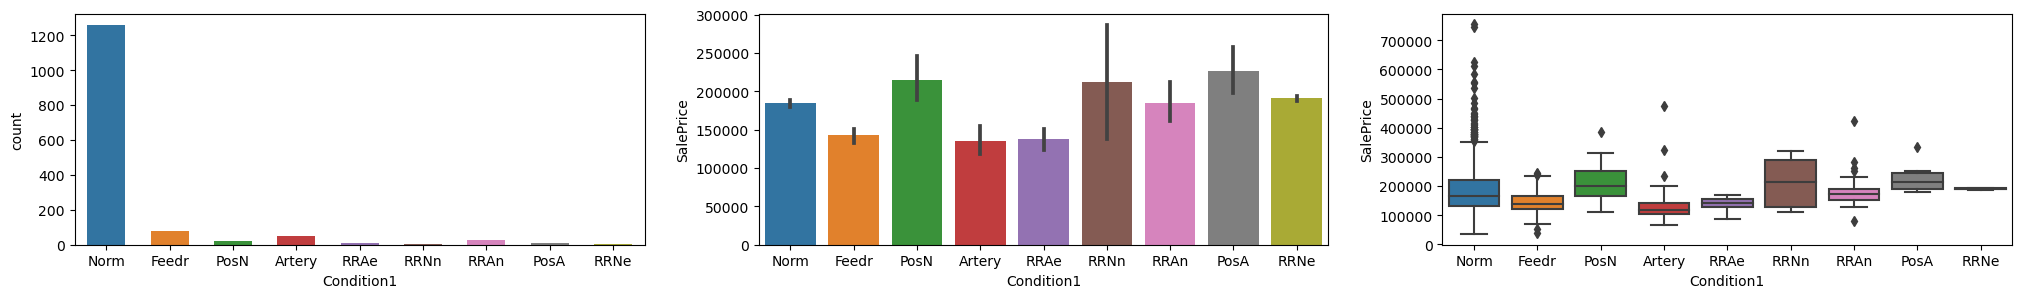

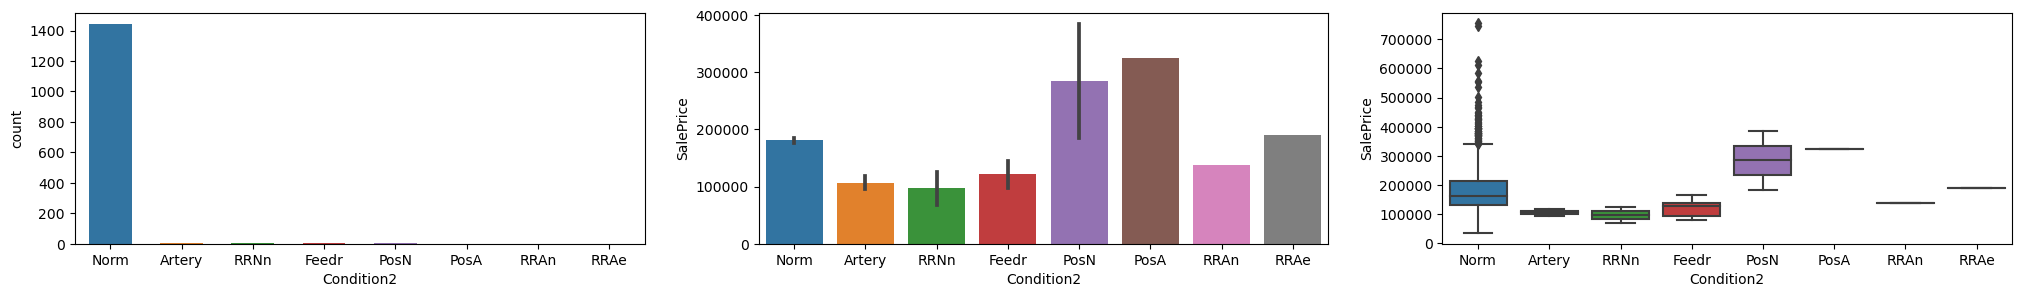

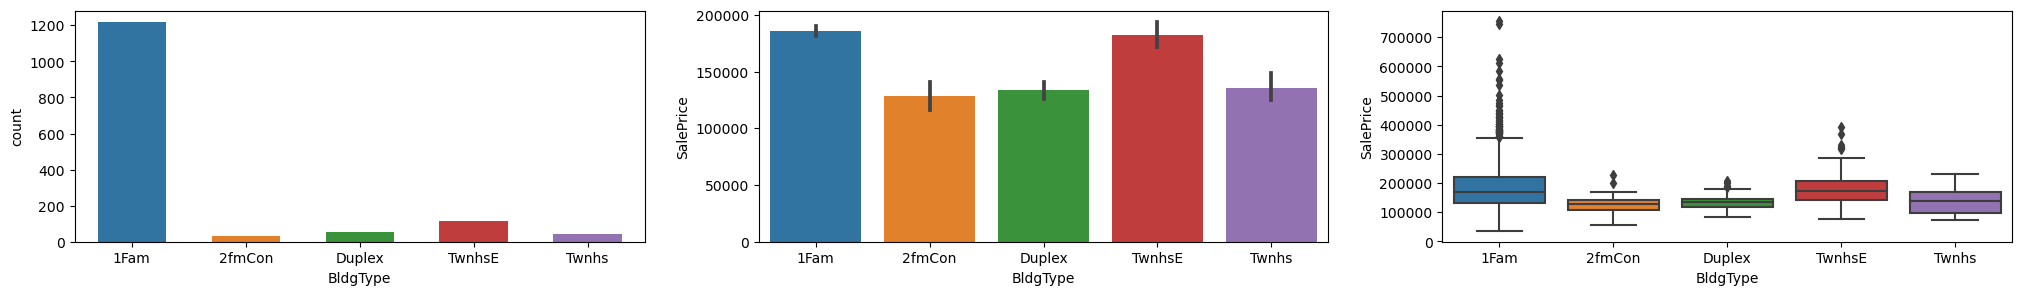

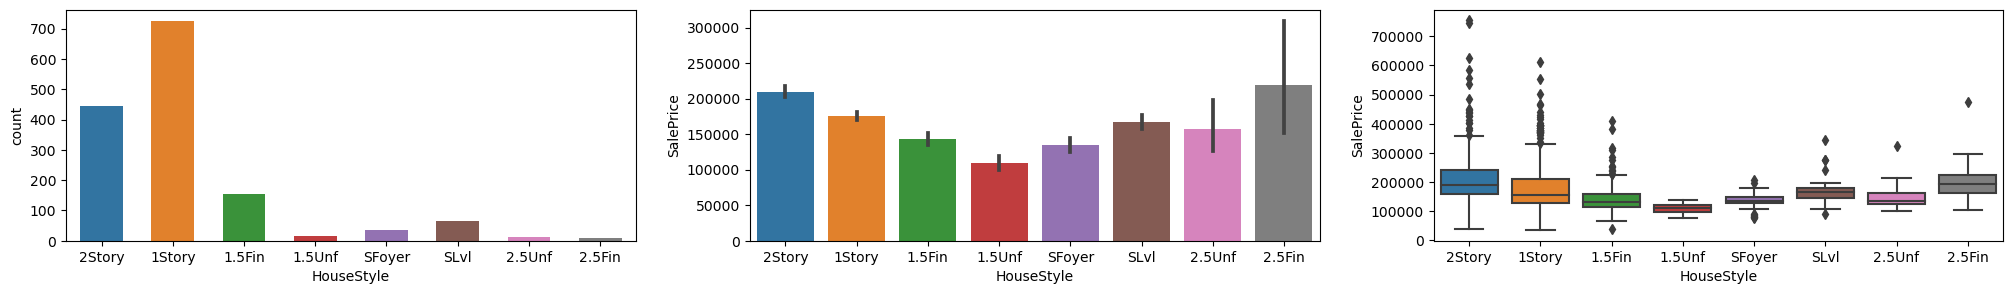

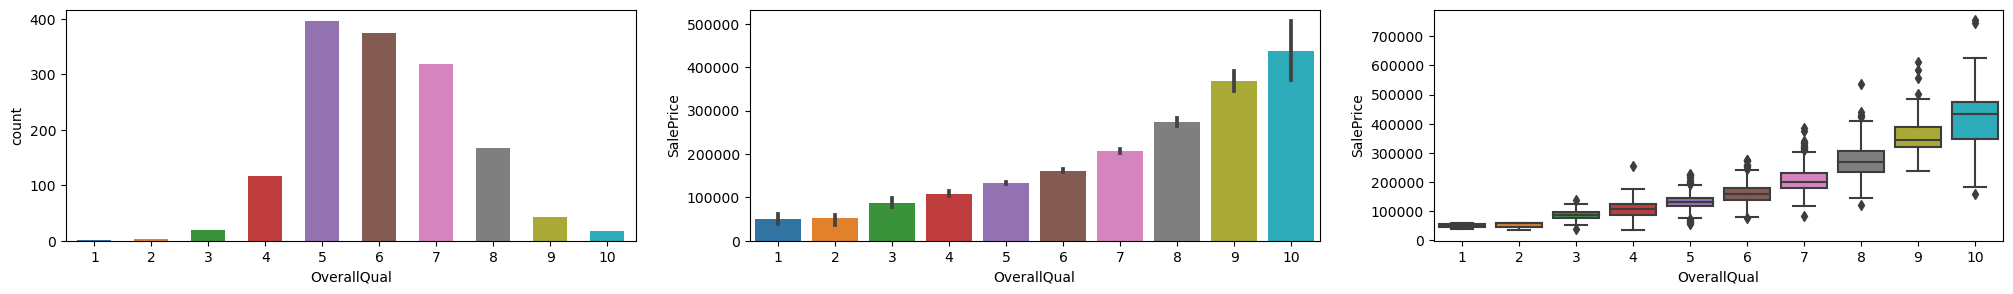

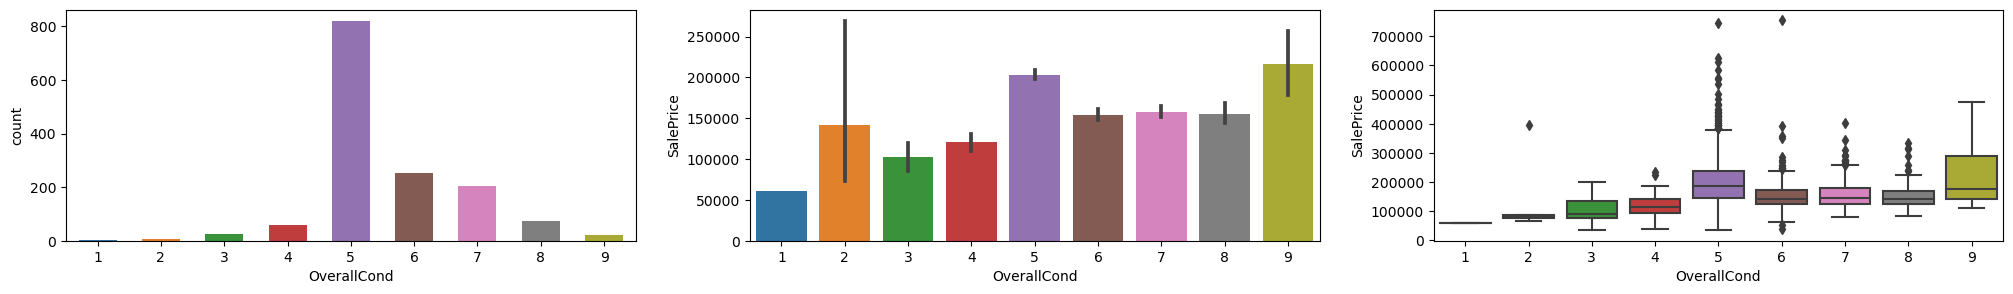

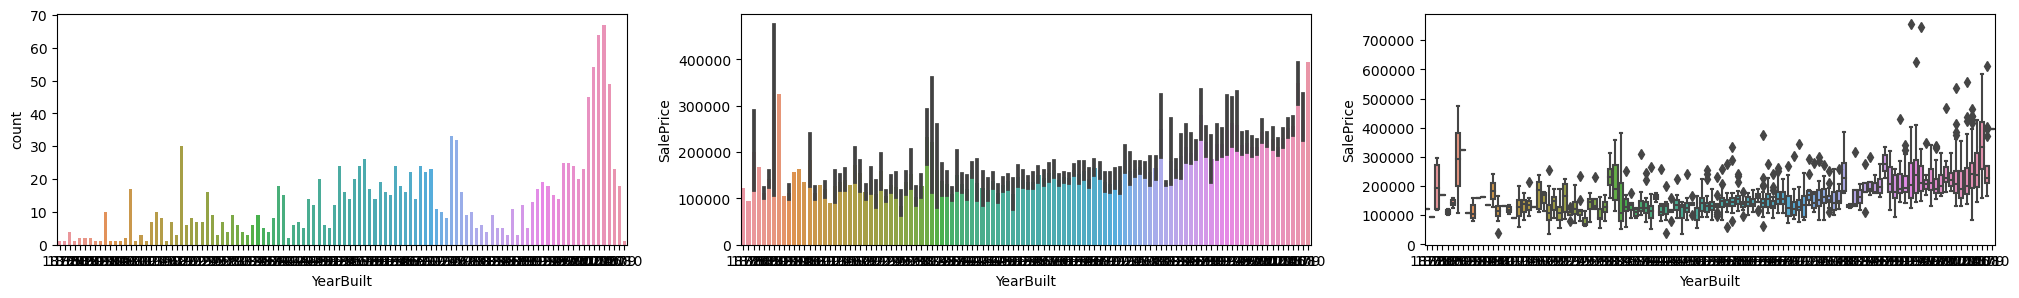

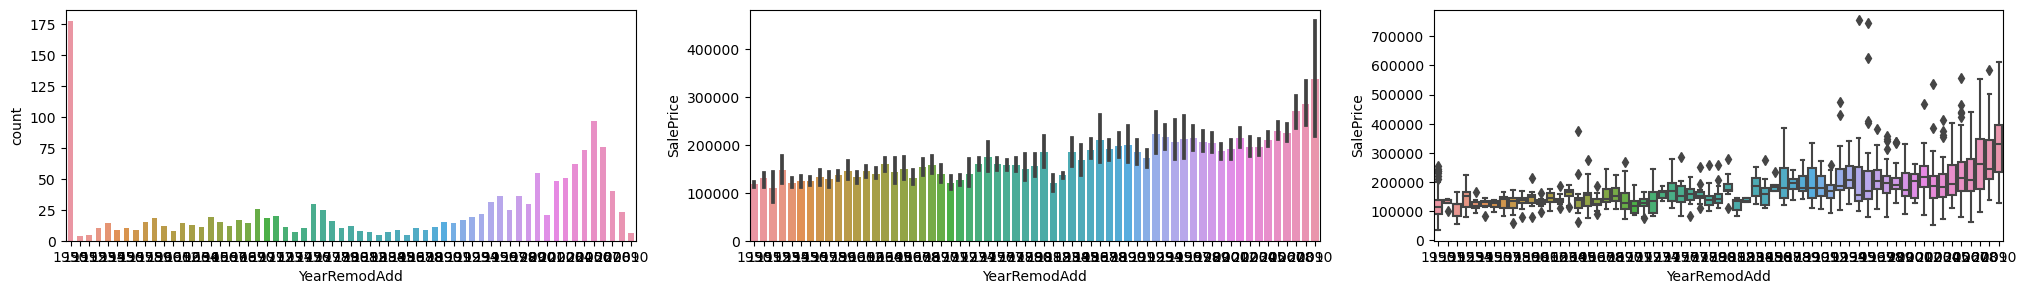

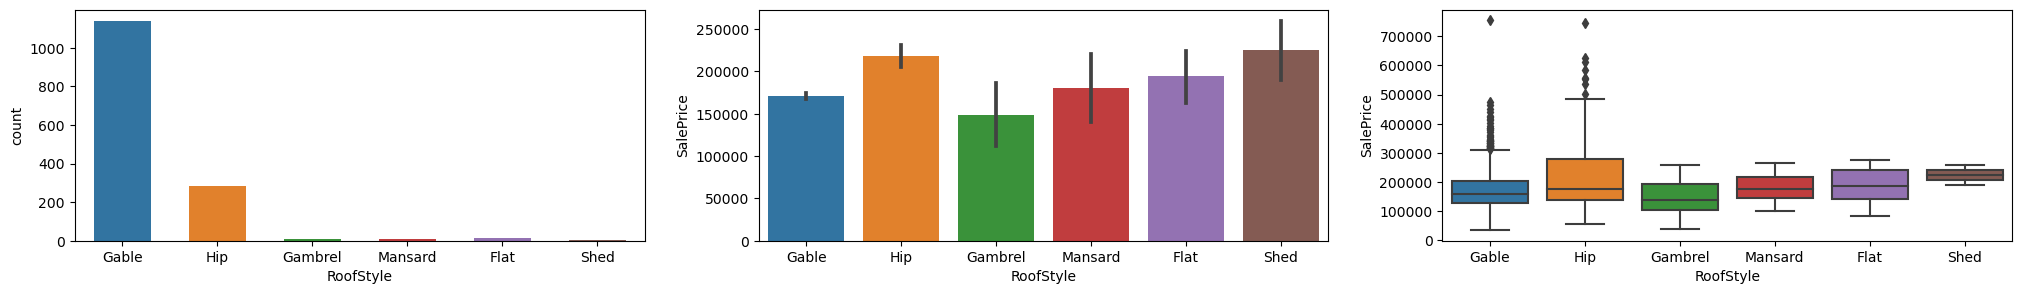

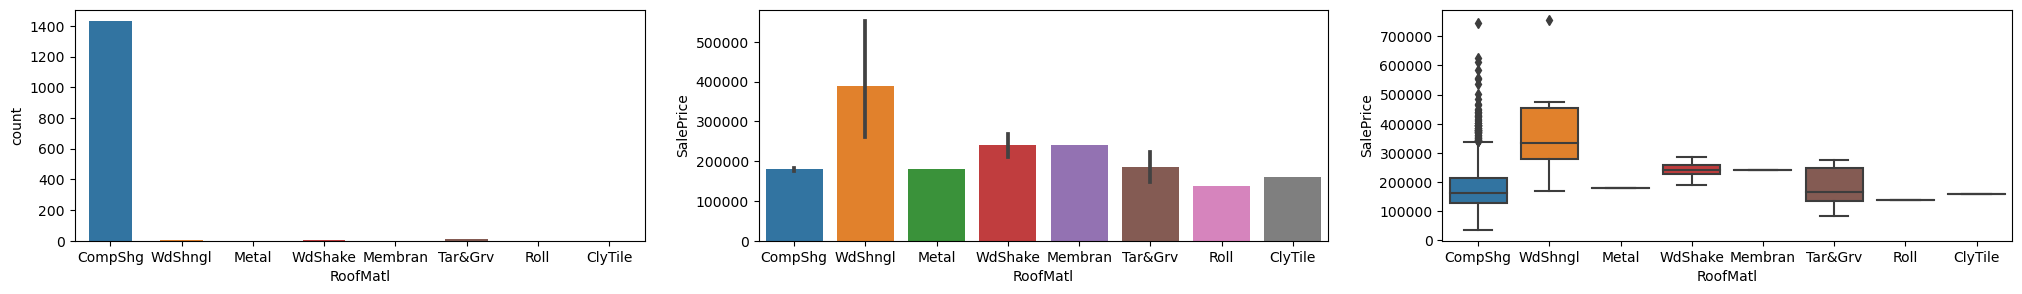

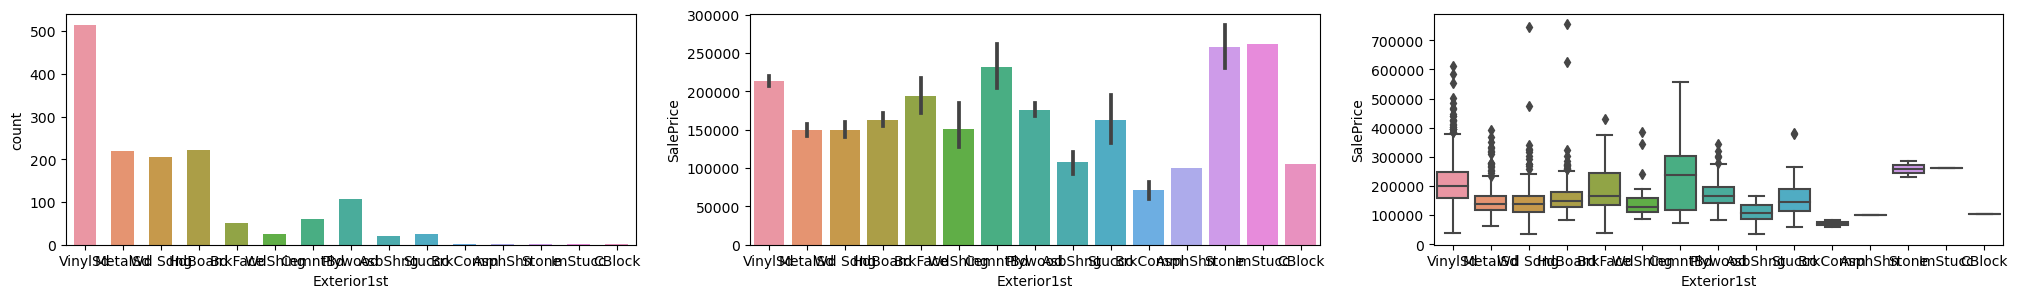

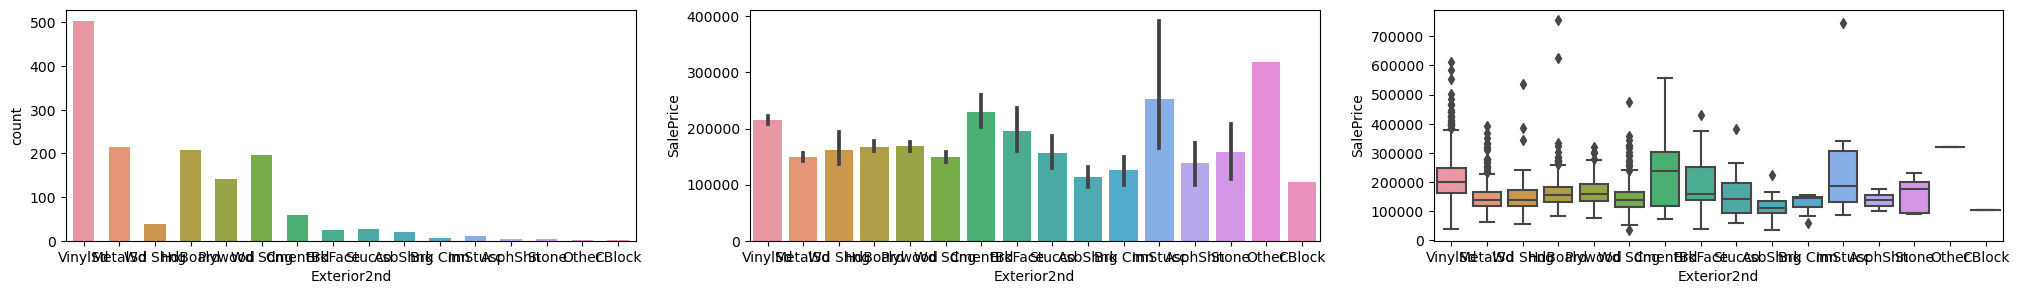

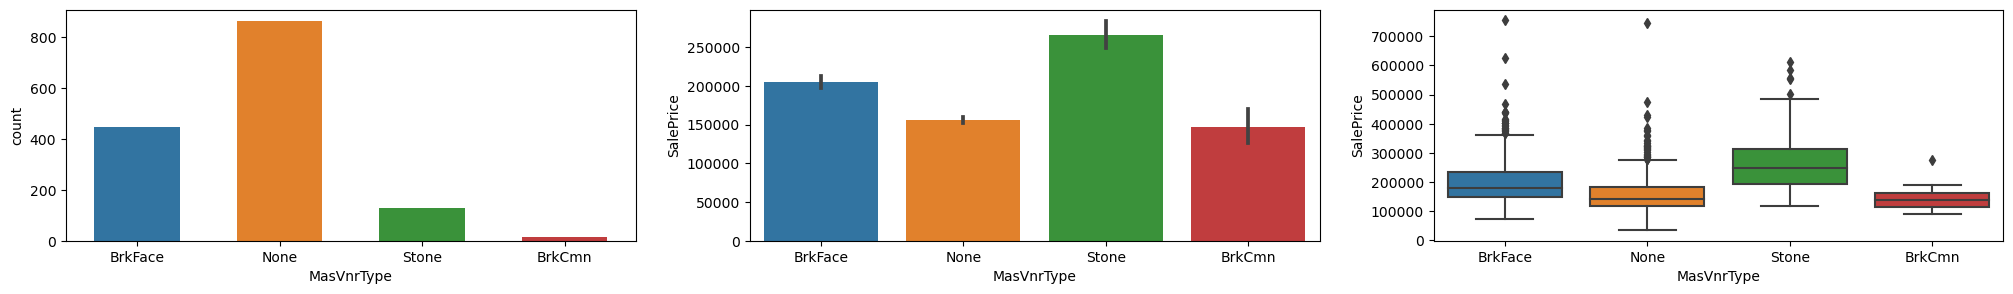

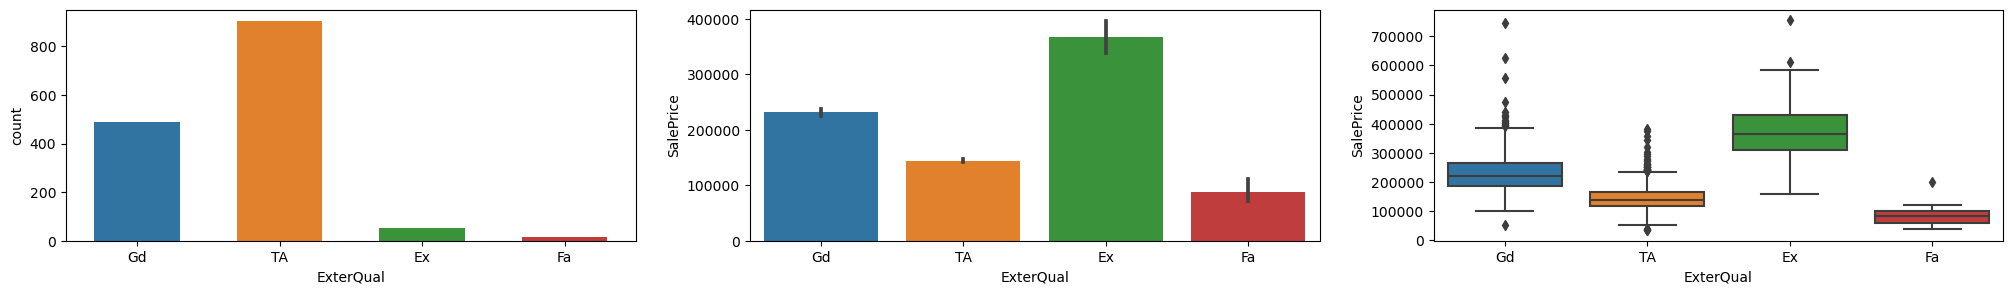

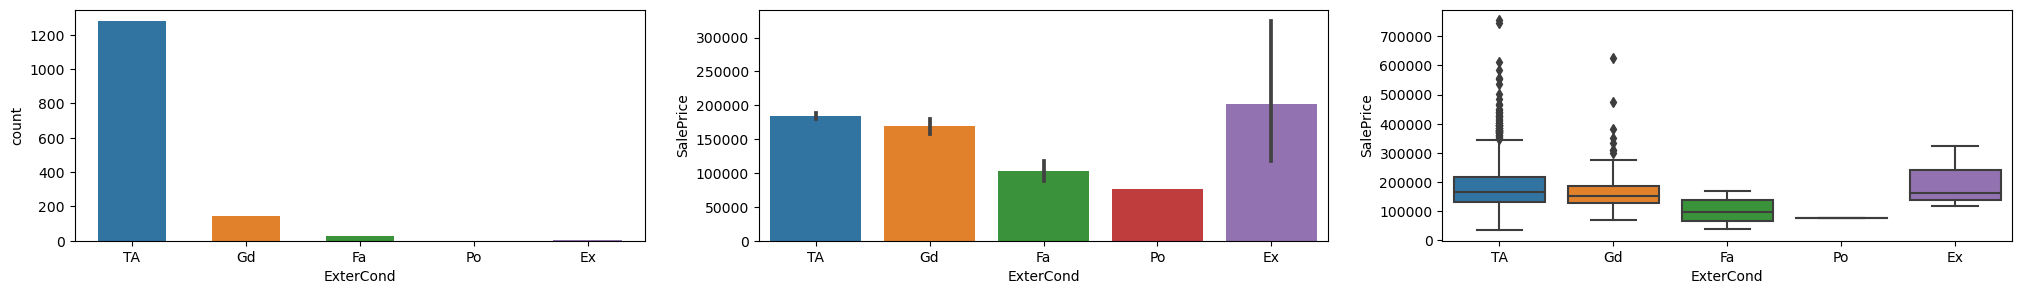

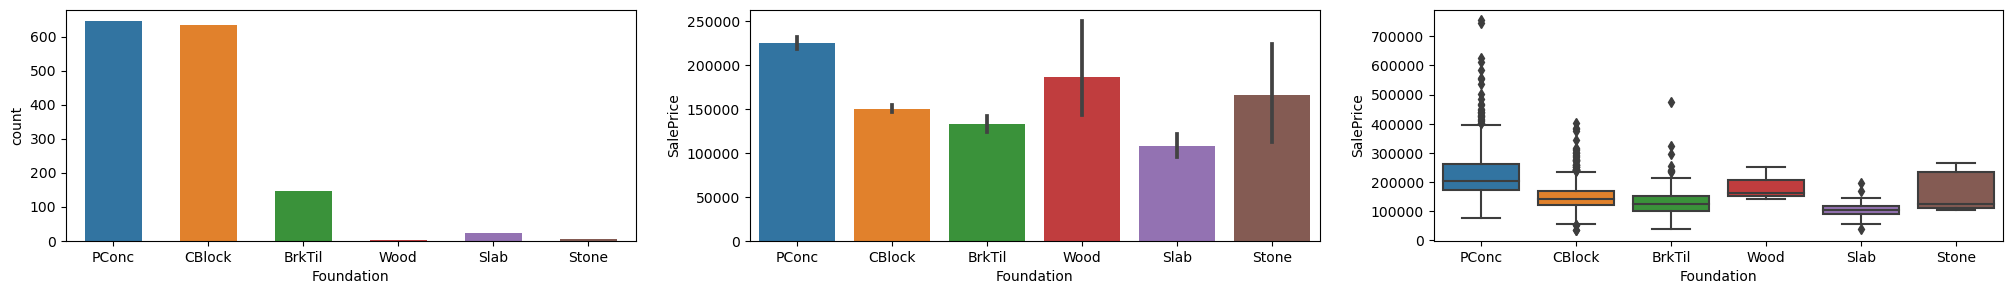

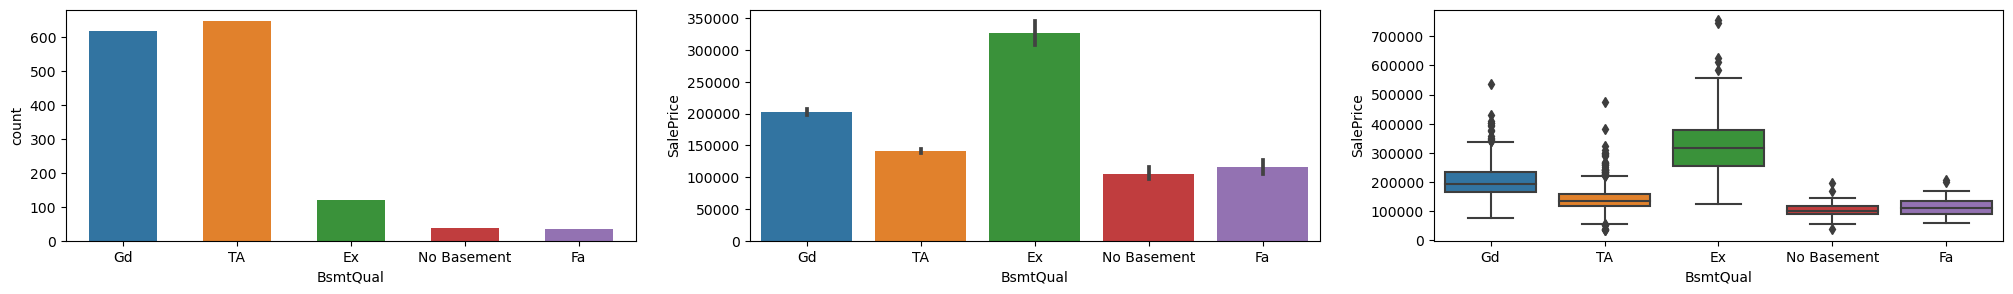

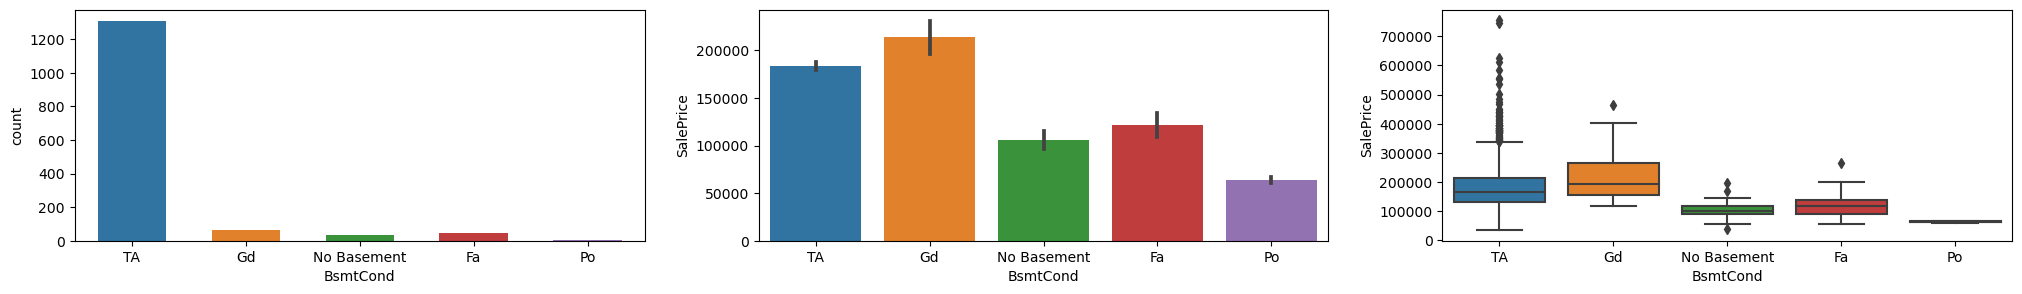

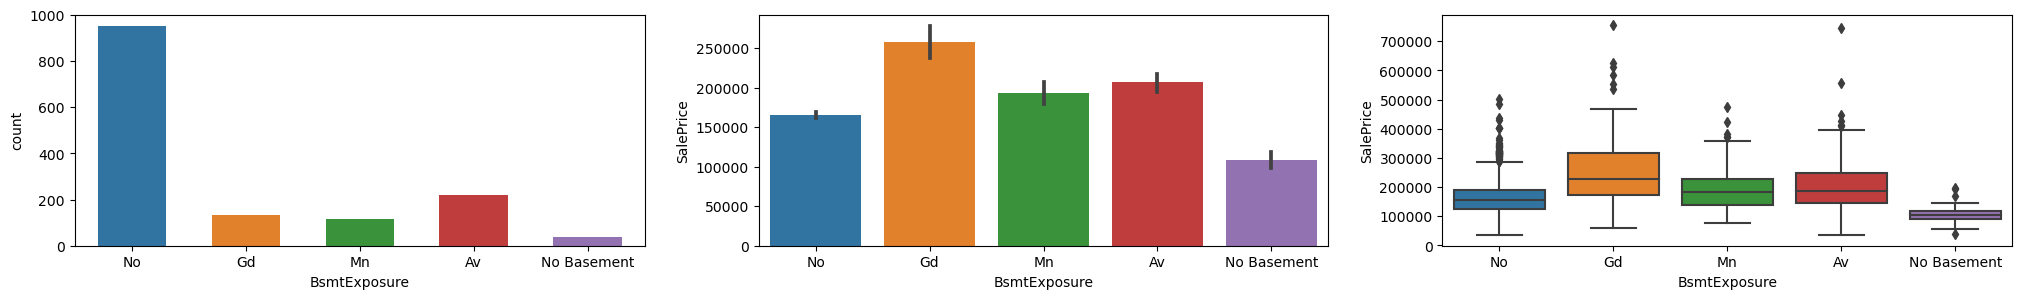

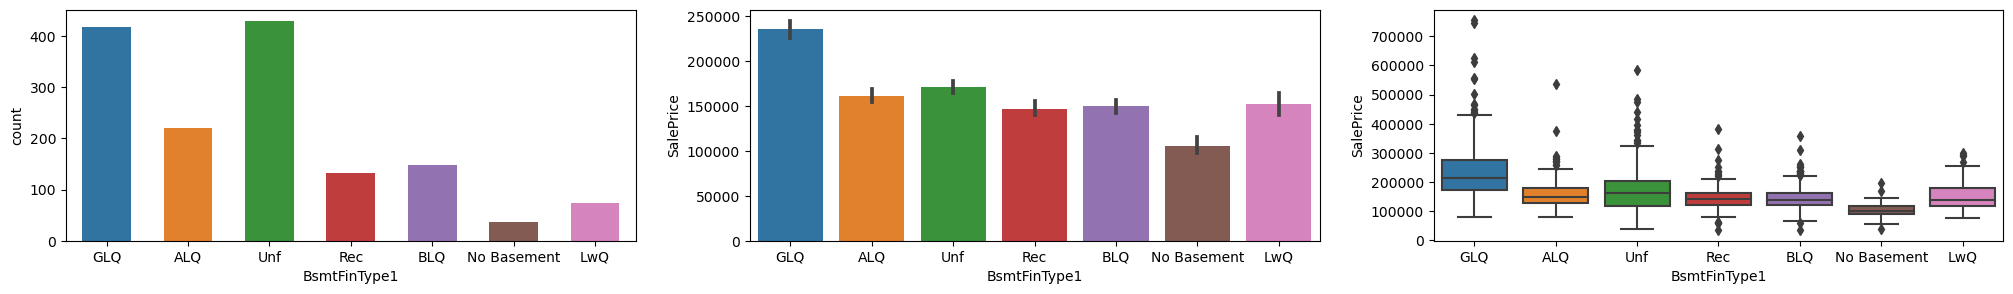

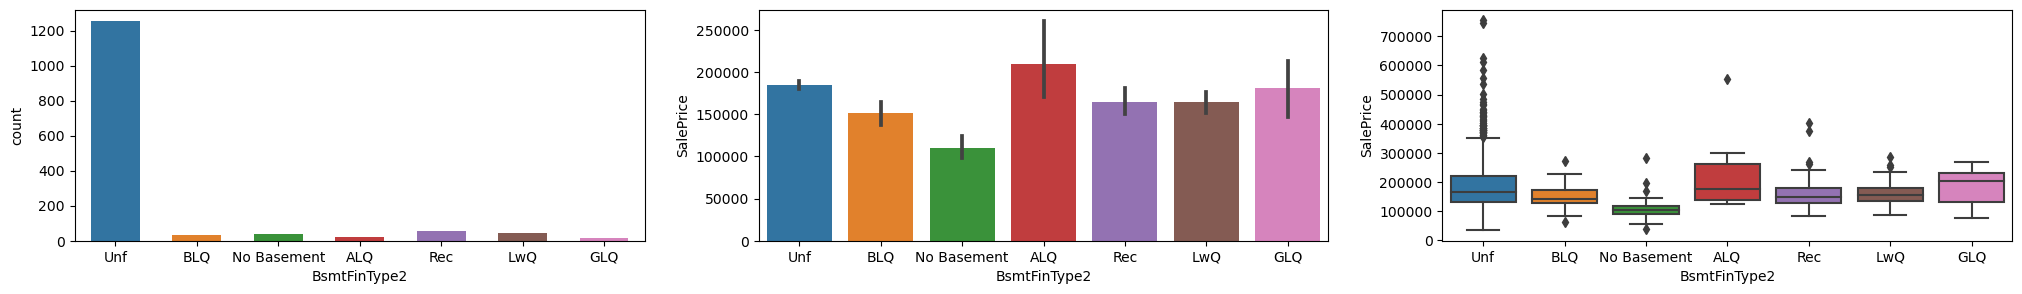

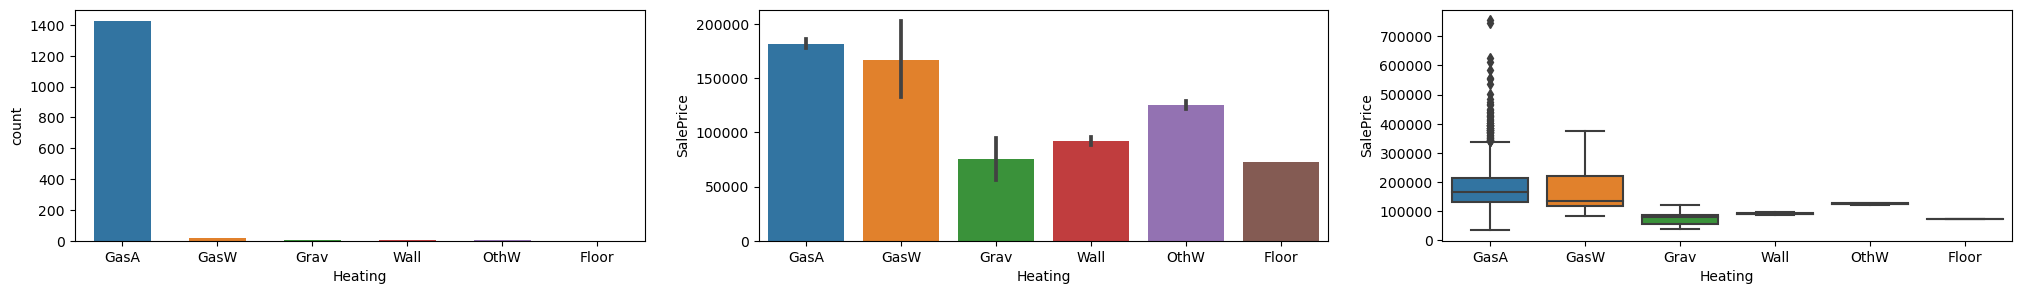

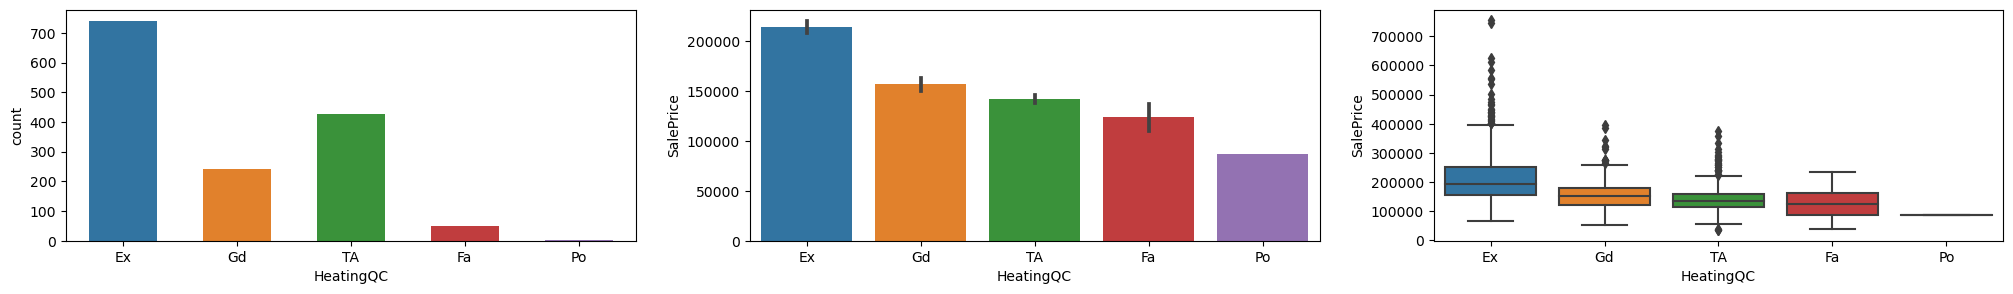

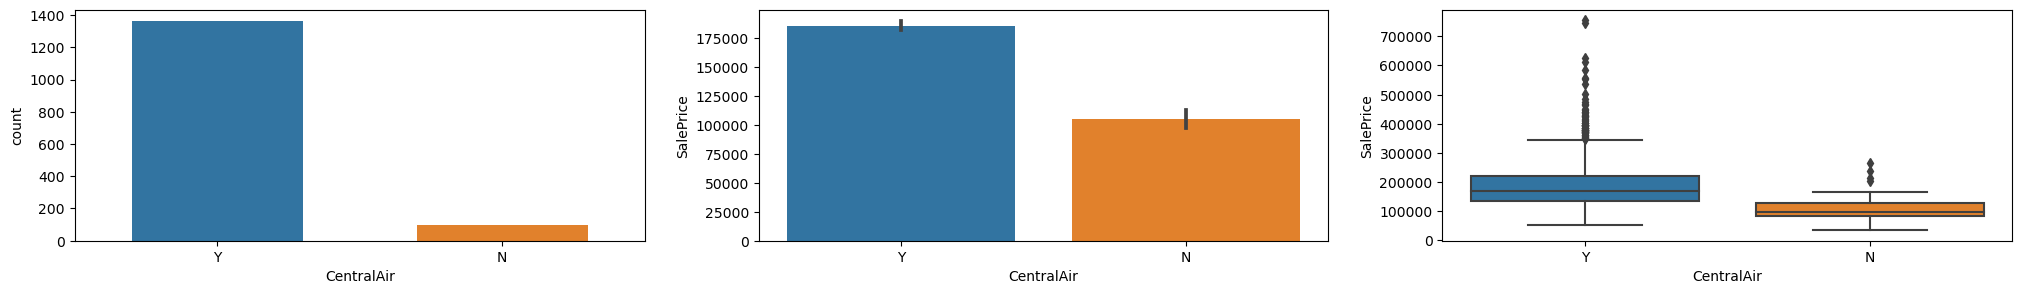

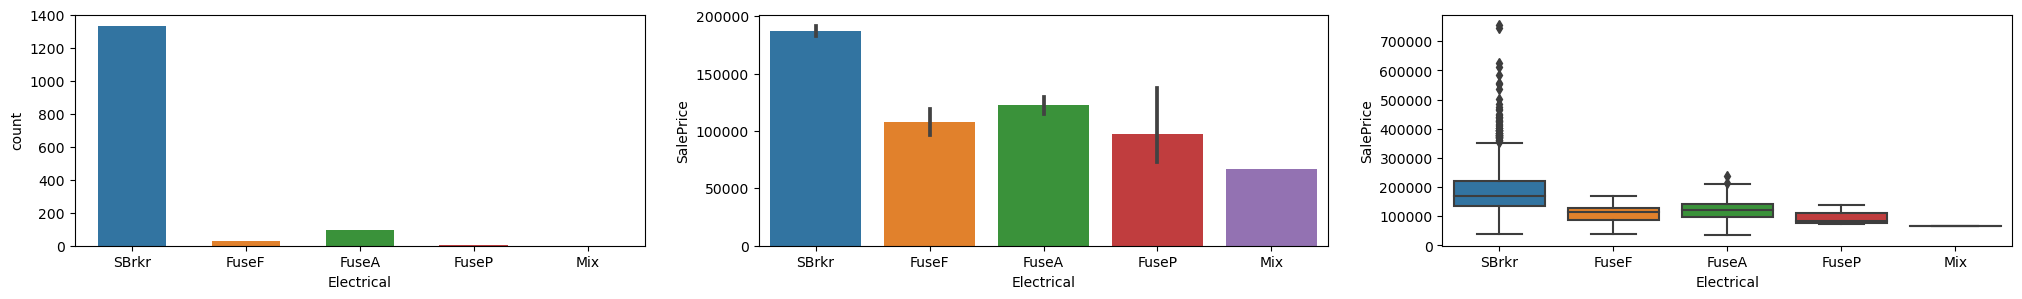

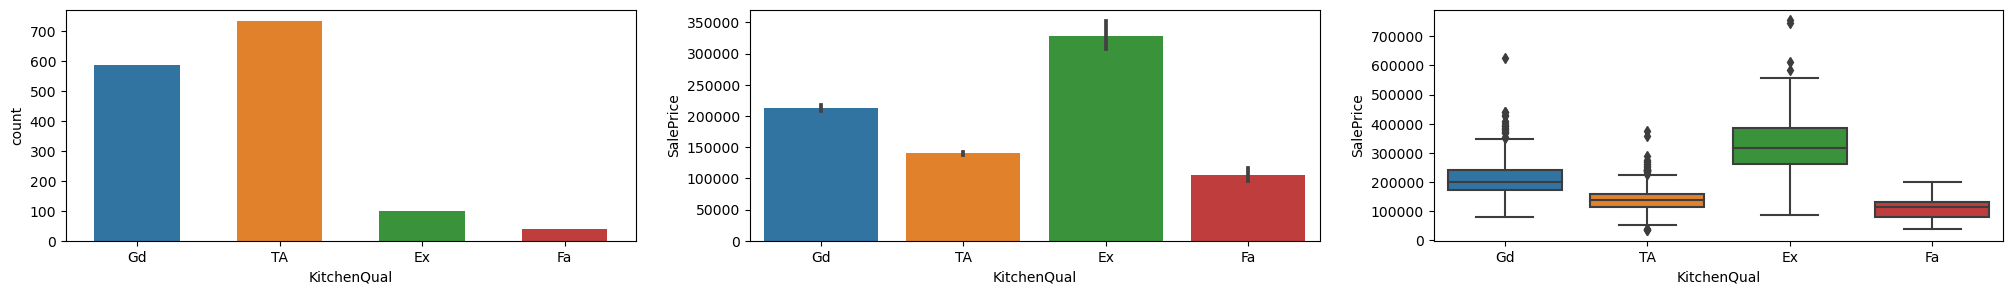

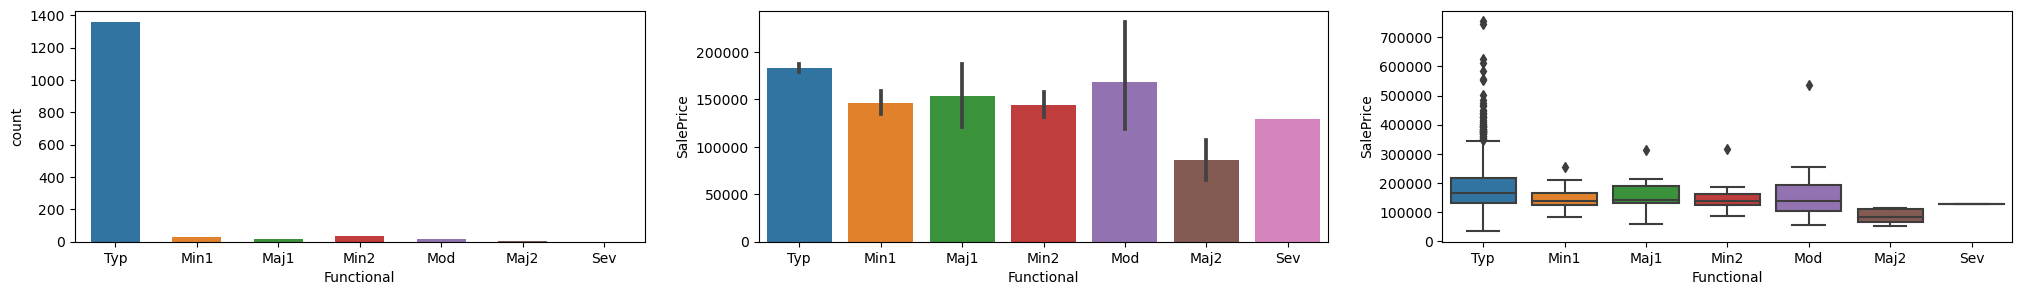

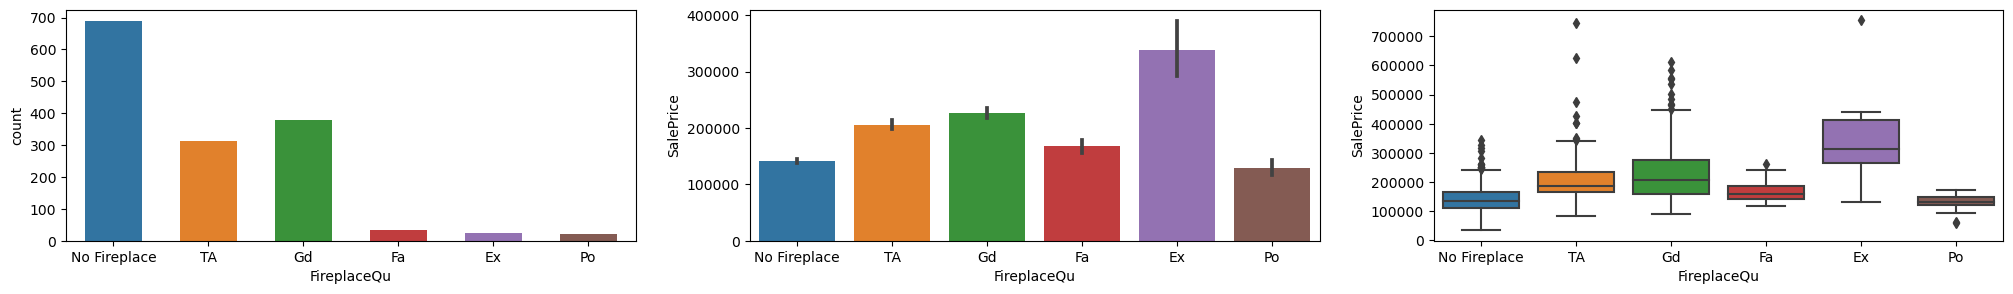

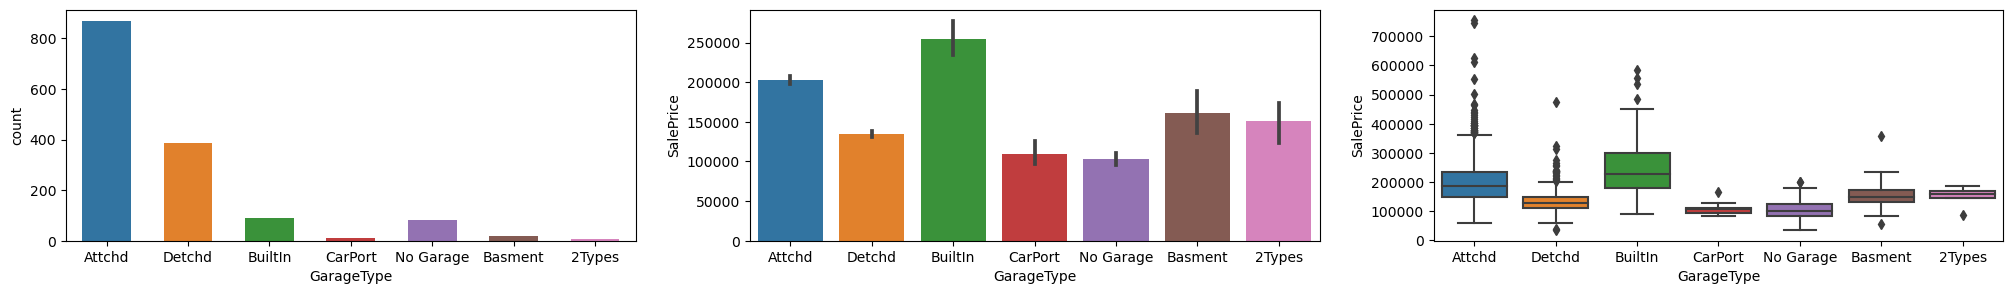

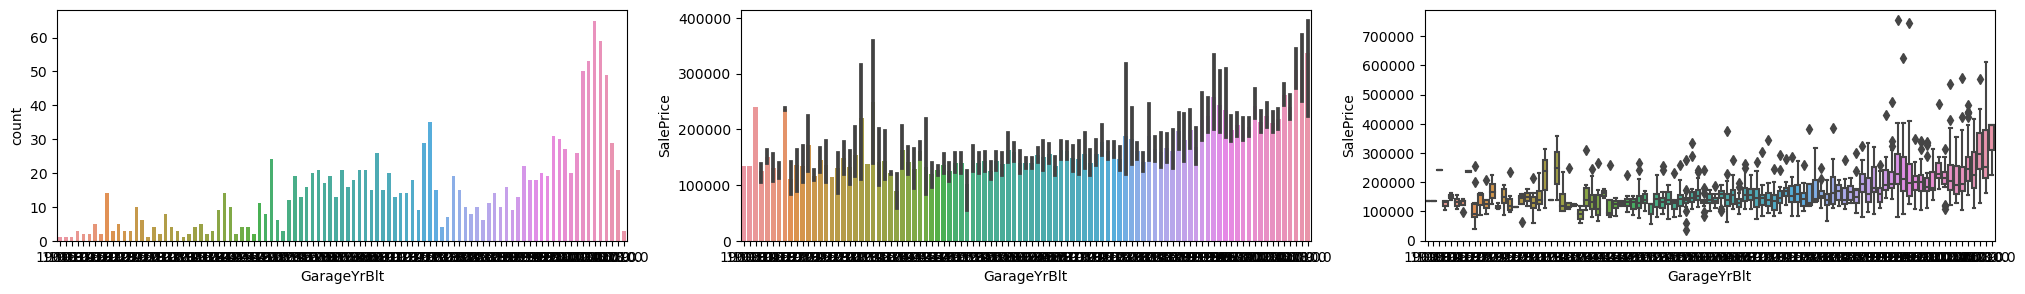

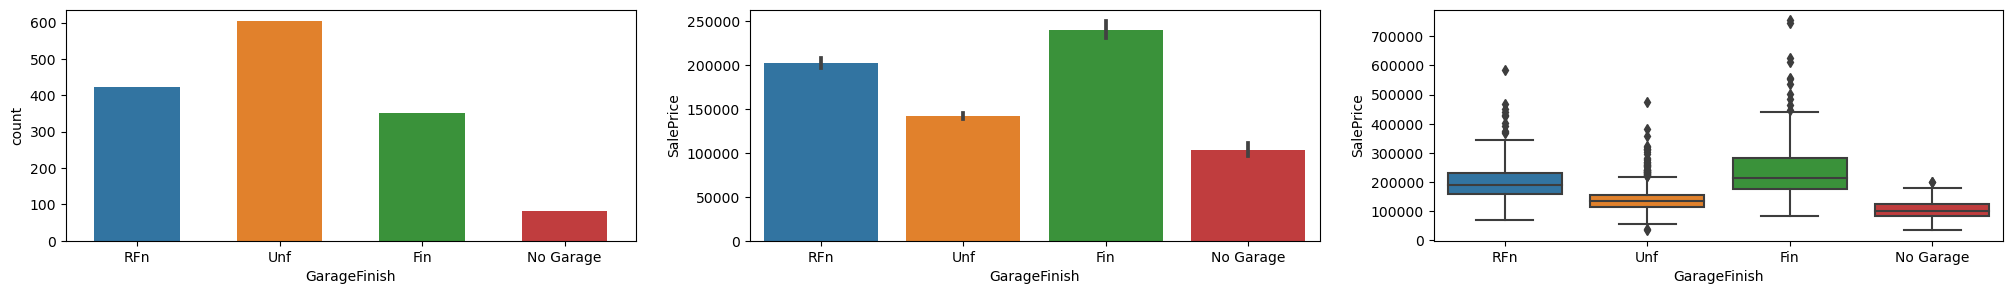

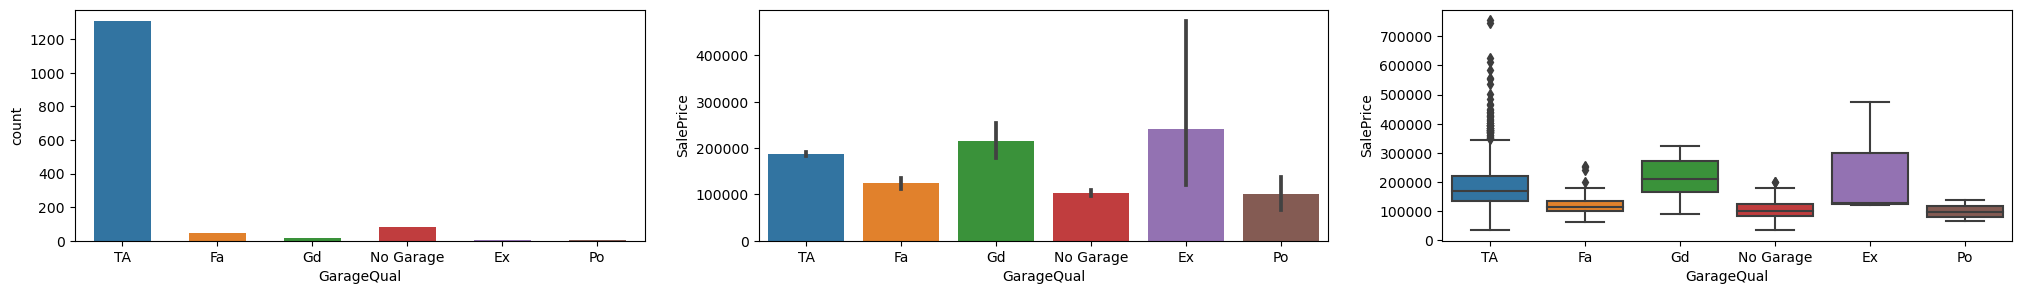

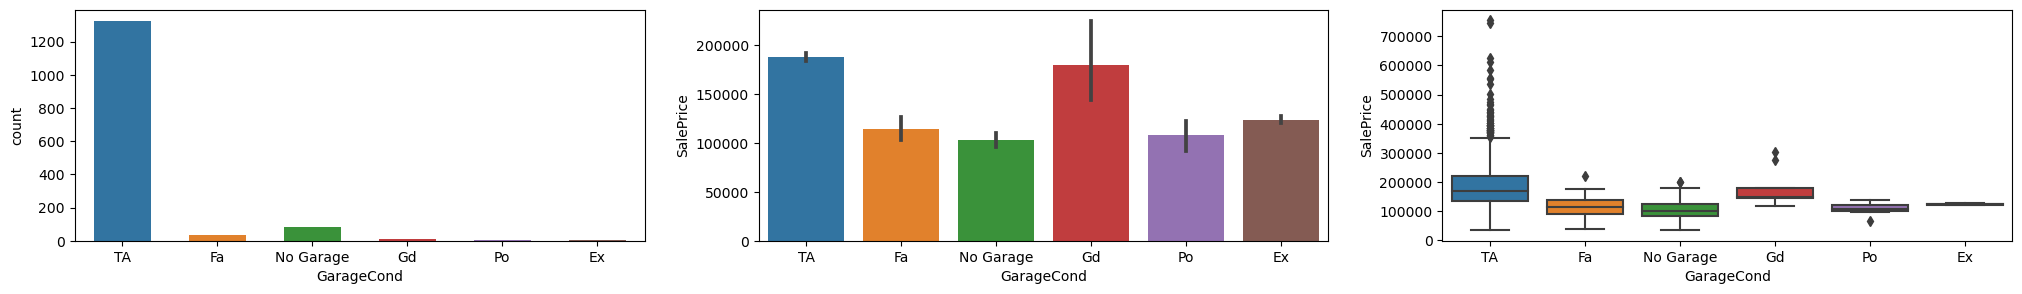

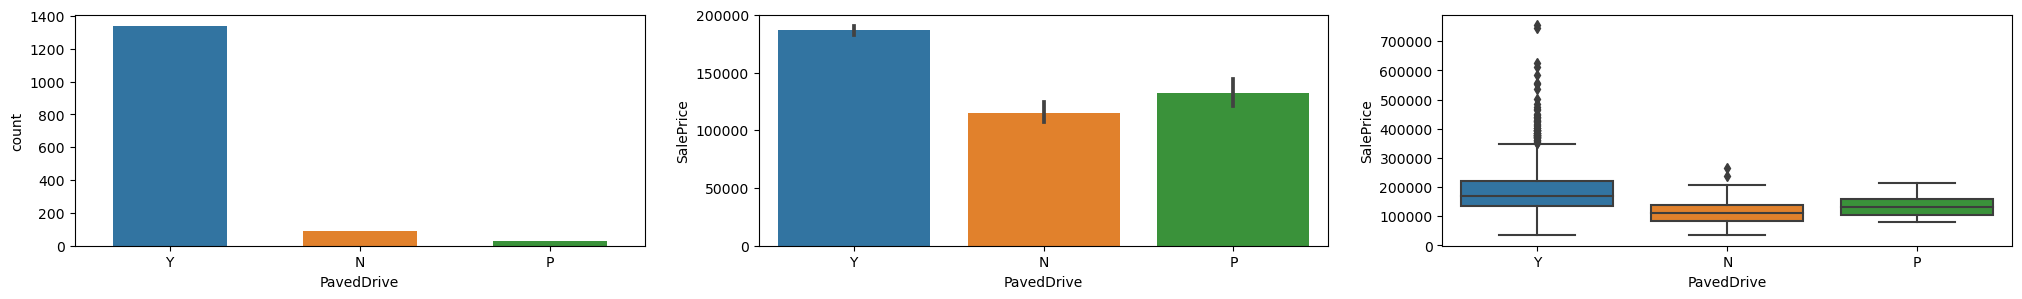

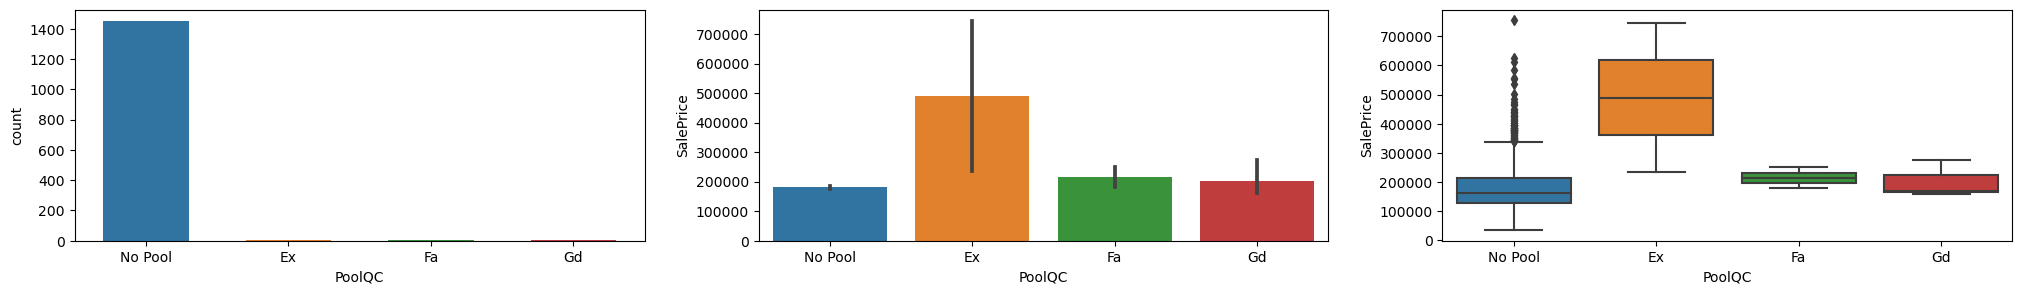

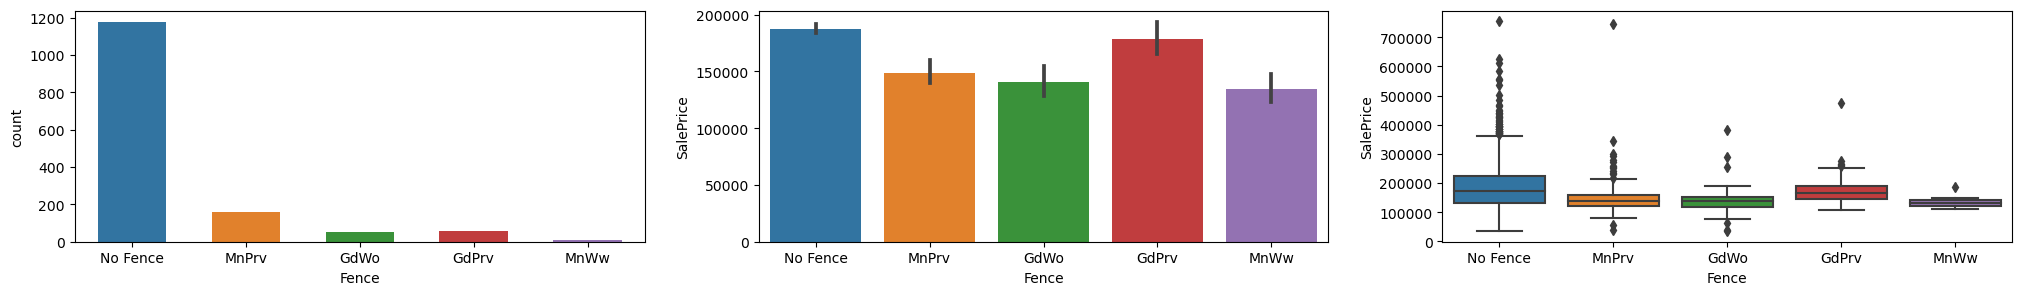

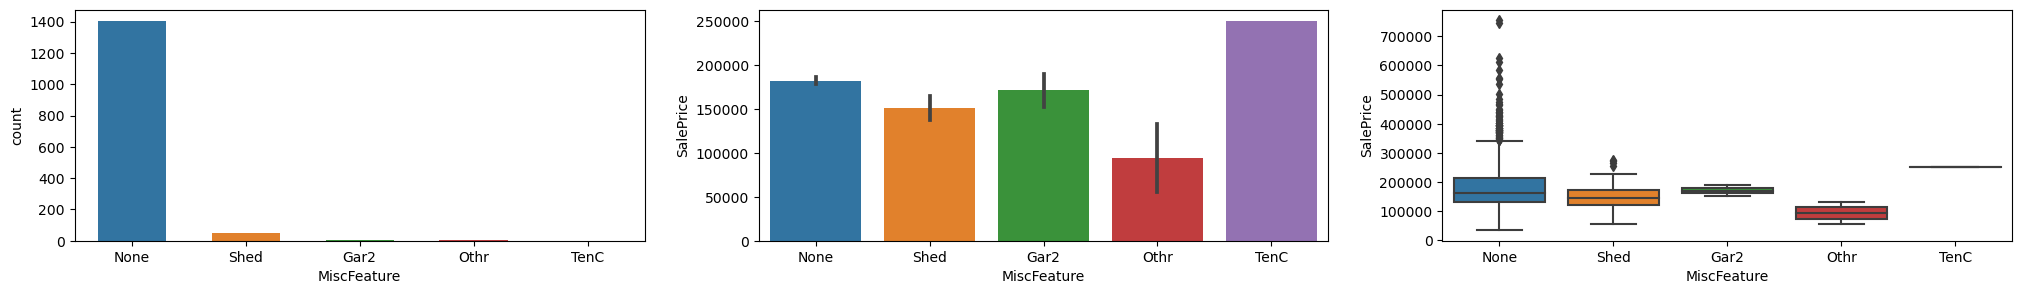

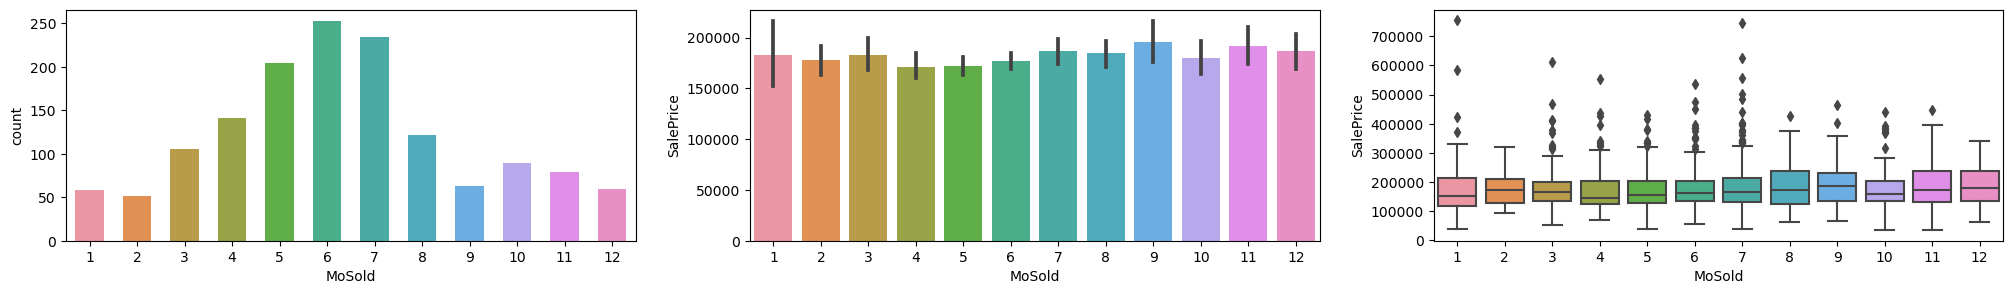

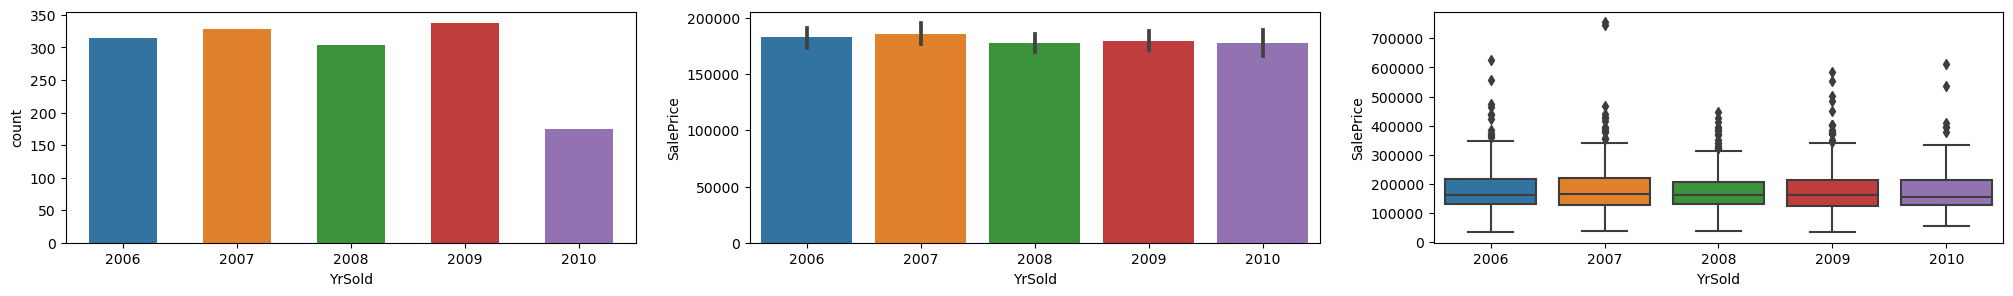

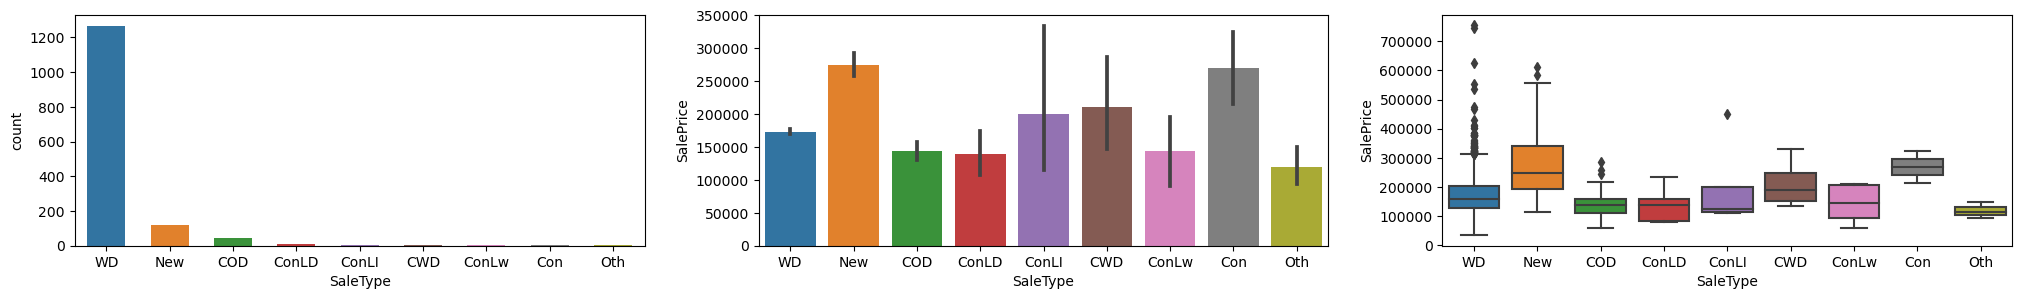

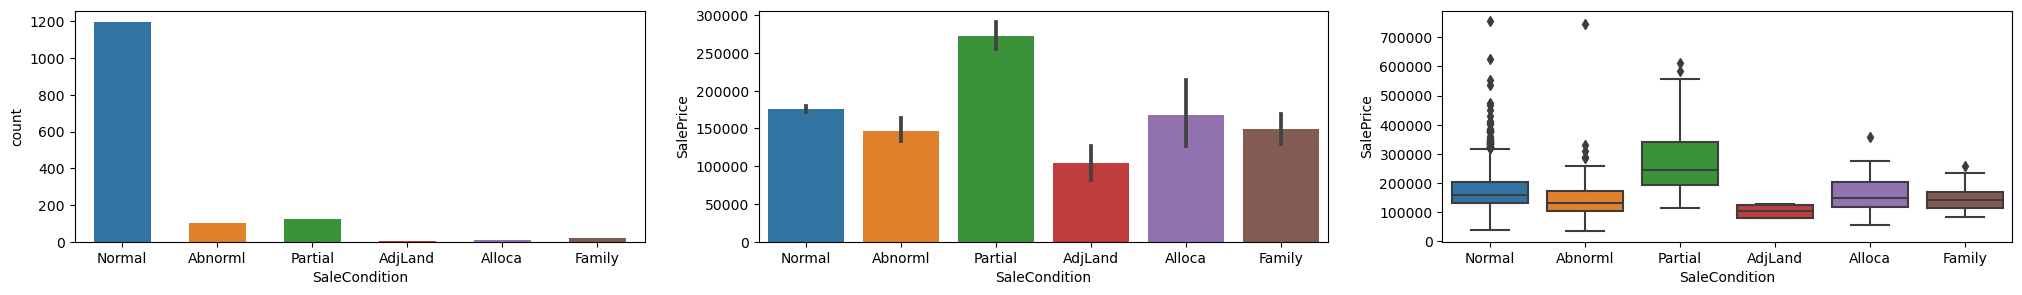

In [32]:
for col in (cat_features.columns):
    plt.figure(figsize=(25, 3))
    plt.title(col, fontdict={'fontsize': 18})
    
    plt.subplot(1,3,1)
    sns.countplot(data=cat_features, x=cat_features[col], width=0.6)
    
    plt.subplot(1,3,2)
    sns.barplot(x=cat_features[col], y="SalePrice", data=housing_df)
    
    plt.subplot(1,3,3)
    sns.boxplot(x=cat_features[col],y="SalePrice",data=housing_df)
  
    plt.show()



From the above plots we can infer that:

- Properties with `No Alley` are more and have more saleprice
- `Regular` Lot shape is large in no. but `Moderaltely iregular` have more sale pice
- Houses at `severe land slope` have lowest SalePrice
- Almost all properties have all public `utilities`
- `Single Family detached` is large in number and have more sale price as well
- `2 story house`s have more expensive out of all house style
- Price range is more for houses having `Excellent Overall condition` 
- Houses with `Excellent quality of material on the exterior` have the highest SalePrice
- Houses with `Excellent condition of material on the exterior` have the highest SalePrice
- Houses with `excellent basement quality` are expensive
- Houses with `excellent Kitchen and fireplace` quality are expensive
- `Builtin and attached` Garages are more pricey

PoolQC and Utilities have very less discrete values . Lets analyse them separately


In [33]:
# checking value count for Utilities
cat_features.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [34]:
# Checking value count for PoolQC
cat_features.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

These both columns can be dropped

In [35]:
# Since Utilities housing_df.drop(columns = ['Utilities', 'PoolQC'], inplace = True)
cat_features.drop(columns = ['Utilities', 'PoolQC'], inplace = True)
cat_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  YearBuilt      1460 non-null   object
 16  YearRemodAdd   1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

Let's derive new column 'Age' using Year of built and year of sold

In [36]:
# creating new column for age of house
cat_features['Age'] = housing_df['YrSold'] - housing_df['YearBuilt']
cat_features.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [37]:
cat_features.head()

MSSubClass MSZoning Street     Alley LotShape LandContour LotConfig  \
0         60       RL   Pave  No Alley      Reg         Lvl    Inside   
1         20       RL   Pave  No Alley      Reg         Lvl       FR2   
2         60       RL   Pave  No Alley      IR1         Lvl    Inside   
3         70       RL   Pave  No Alley      IR1         Lvl    Corner   
4         60       RL   Pave  No Alley      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... GarageFinish GarageQual GarageCond  \
0       Gtl      CollgCr       Norm  ...          RFn         TA         TA   
1       Gtl      Veenker      Feedr  ...          RFn         TA         TA   
2       Gtl      CollgCr       Norm  ...          RFn         TA         TA   
3       Gtl      Crawfor       Norm  ...          Unf         TA         TA   
4       Gtl      NoRidge       Norm  ...          RFn         TA         TA   

  PavedDrive     Fence MiscFeature MoSold SaleType SaleCondition Age  
0          Y  No Fence        None      2       WD        Normal   5  
1          Y  No Fence        None      5       WD        Normal  31  
2          Y  No Fence        None      9       WD        Normal   7  
3          Y  No Fence        None      2       WD       Abnorml  91  
4          Y  No Fence        None     12       WD        Normal   8  

[5 rows x 48 columns]

## Step 3: Data Preparation



### Dummy Variables

Here we have large no. of categorical variables which are having multiple values. So we will create dummies for them .

In [38]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
dummy_df = pd.get_dummies(data = cat_features, drop_first = True)
dummy_df.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  Age_117  Age_119  Age_122  Age_125  Age_126  Age_127  Age_128  \
0  ...        0        0        0        0        0        0        0   
1  ...        0        0        0        0        0        0        0   
2  ...        0        0        0        0        0        0        0   
3  ...        0        0        0        0        0        0        0   
4  ...        0        0        0        0        0        0        0   

   Age_129  Age_135  Age_136  
0        0        0        0  
1        0        0        0  
2        0        0        0  
3        0        0        0  
4        0        0        0  

[5 rows x 538 columns]

Since there will be large no. of dummy columns created , Lets check all the imbalanced columns.<br>
This can be done by checking the columns where 99% of values are same either 0 or 1.

In [39]:
# Creating list of the dummy columns having 99% data is having same value
dummy_del =[]
for col in (dummy_df.columns):
    if ((dummy_df[col] == 0).sum()/dummy_df.shape[0]*100 > 99):
        dummy_del.append(col) #print(f'Value Count and %age of 0 value for feature {col} is:')
        #print( (dummy_df[col] == 0).sum() , round((dummy_df[col] == 0).sum()/dummy_df.shape[0]*100,2)
        
print(dummy_del)
print(len(dummy_del))

['MSSubClass_40', 'MSSubClass_45', 'MSSubClass_180', 'LotShape_IR3', 'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_NPkVill', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_RRAe', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'OverallQual_2', 'OverallCond_2', 'YearRemodAdd_1951', 'YearRemodAdd_1952', 'YearRemodAdd_1953', 'YearRemodAdd_1954', 'YearRemodAdd_1955', 'YearRemodAdd_1956', 'YearRemodAdd_1957', 'YearRemodAdd_1960', 'YearRemodAdd_1961', 'YearRemodAdd_1962', 'YearRemodAdd_1963', 'YearRemodAdd_1964', 'YearRemodAdd_1967', 'YearRemodAdd_1969', 'YearRemodAdd_1973', 'YearRemodAdd_1974', 'YearRemodAdd_1975', 'YearRemodAdd_1979', 'YearRemodAdd_1980', 'YearRemodAdd_1981', 'YearRemodAdd_1982', 'YearRemodAdd_1983', 'YearRemodAdd_1984', 'YearRemodAdd_1985', 'YearRemodAdd_1986', 'YearRemodAd

242 columns are imbalanced columns

In [40]:
# dropping all the columns which are imbalanced in nature
dummy_df.drop(columns = dummy_del, inplace = True)
print(dummy_df.shape)

(1460, 296)


In [41]:
num_features.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [42]:
# Concating the numrical features and dummy features created out of categorical features
df = pd.concat([num_features,dummy_df], axis = 1)
df.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0   8450.0       196.0       706.0      150.0          856   
1         80.0   9600.0         0.0       978.0      284.0         1262   
2         68.0  11250.0       162.0       486.0      434.0          920   
3         60.0   9550.0         0.0       216.0      540.0          756   
4         84.0  14260.0       350.0       655.0      490.0         1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  Age_46  Age_47  Age_48  \
0       854     1710.0           1.0         2  ...       0       0       0   
1         0     1262.0           0.0         2  ...       0       0       0   
2       866     1786.0           1.0         2  ...       0       0       0   
3       756     1717.0           1.0         1  ...       0       0       0   
4      1053     2198.0           1.0         2  ...       0       0       0   

   Age_49  Age_50  Age_51  Age_52  Age_53  Age_54  Age_59  
0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0  

[5 rows x 313 columns]

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [43]:
# creating independent data set by dropping dependent variable SalePrice
X = df.drop(['SalePrice'], axis = 1)
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0         65.0   8450.0       196.0       706.0      150.0          856   
1         80.0   9600.0         0.0       978.0      284.0         1262   
2         68.0  11250.0       162.0       486.0      434.0          920   
3         60.0   9550.0         0.0       216.0      540.0          756   
4         84.0  14260.0       350.0       655.0      490.0         1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  Age_46  Age_47  Age_48  \
0       854     1710.0           1.0         2  ...       0       0       0   
1         0     1262.0           0.0         2  ...       0       0       0   
2       866     1786.0           1.0         2  ...       0       0       0   
3       756     1717.0           1.0         1  ...       0       0       0   
4      1053     2198.0           1.0         2  ...       0       0       0   

   Age_49  Age_50  Age_51  Age_52  Age_53  Age_54  Age_59  
0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0  

[5 rows x 312 columns]

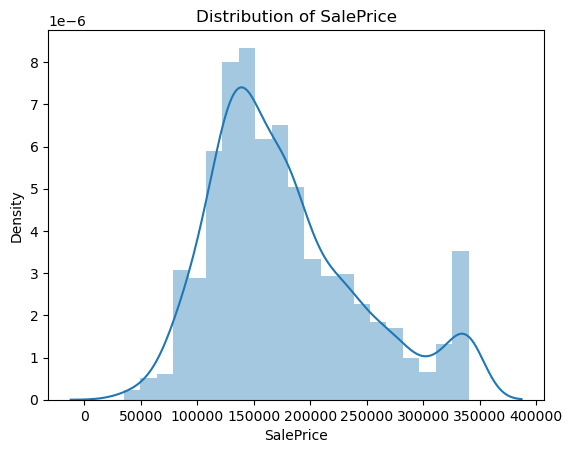

In [44]:
# we have already seen the distribution of sales price before. Lets check it again 
plt.title('Distribution of SalePrice')
sns.distplot(num_features['SalePrice'])
plt.show()

It is skewed on right side. Let's check it on log scale

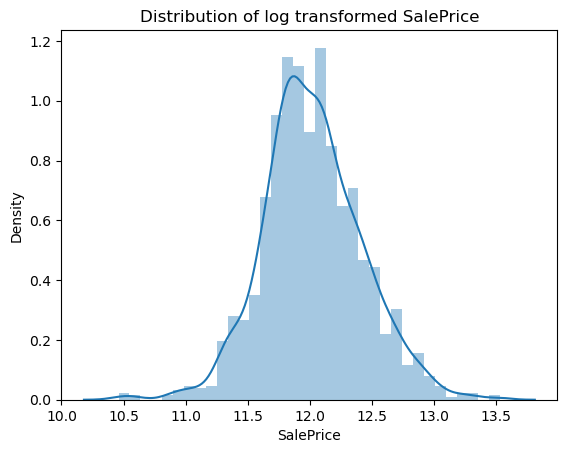

In [45]:
# checking saleprice on log scale
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

It seems normal now. we are going to use the log of SalePrice as our target variable for now.

In [46]:
# Putting log of SalePrice in y
y = np.log(num_features['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


In [47]:
# Splitting into train and test data

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 312)
(438, 312)
(1021,)
(438,)


### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might cause issues at the time of model evaluation. We should therefore use standardization or normalization so that units of the coefficients obtained are all on the same scale. <br>
Here we have two common ways of rescaling:

1. Min-Max scaling ( normailzation) ( x-xmin)/(xmax - xmin)
2. Standardisation (mean-0, sigma-1) ( x- mU)/sigma

This time, we will use Standardisation scaling.

from sklearn.preprocessing import StandardScaler

In [48]:
# creating object of standard scaler
scaler = StandardScaler()

In [49]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables i.e. all numerical variables
# here we get the no. of columns
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)

# Scaling both test and train data set
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [50]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
210     -0.108024 -1.117166   -0.665113    0.057374  -0.375237    -0.463273   
318      1.168096  0.081094    1.227470    1.252830  -0.457448     0.725402   
239     -0.940276 -0.242180   -0.665113   -0.804090   0.184253    -0.780745   
986     -0.551892 -1.199170   -0.665113   -1.020608  -0.171994    -1.396001   
1416    -0.496408  0.482745   -0.665113   -1.020608   0.494827    -0.677382   

      2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  Age_46  Age_47  \
210  -0.788850  -1.338981      1.072205 -1.026085  ...       0       0   
318   2.146453   2.394669      1.072205  0.786428  ...       0       0   
239   0.798610  -0.033670     -0.839972 -1.026085  ...       0       0   
986   0.671889   0.276419     -0.839972 -1.026085  ...       0       0   
1416  1.616532   1.648777     -0.839972  0.786428  ...       0       0   

      Age_48  Age_49  Age_50  Age_51  Age_52  Age_53  Age_54  Age_59  
210        0       0       0       0       0       0       0       0  
318        0       0       0       0       0       0       0       0  
239        0       0       0       0       0       0       0       0  
986        0       0       0       0       0       0       0       0  
1416       0       0       0       0       0       0       0       0  

[5 rows x 312 columns]

In [51]:
X_train.describe()

LotFrontage       LotArea    MasVnrArea    BsmtFinSF1     BsmtUnfSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -3.331756e-16  1.844210e-16 -5.219462e-18  2.261767e-17 -8.525121e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.299621e+00 -2.267033e+00 -6.651132e-01 -1.020608e+00 -1.279555e+00   
25%   -4.964081e-01 -6.033873e-01 -6.651132e-01 -1.020608e+00 -7.862906e-01   
50%    6.119836e-02 -3.047613e-02 -6.651132e-01 -1.176826e-01 -2.245172e-01   
75%    5.022942e-01  5.307202e-01  5.029654e-01  6.193997e-01  5.610520e-01   
max    2.360990e+00  2.249314e+00  2.402941e+00  3.080852e+00  2.569506e+00   

        TotalBsmtSF      2ndFlrSF     GrLivArea  BsmtFullBath      FullBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03   1021.000000  1.021000e+03   
mean   3.479641e-18 -4.697516e-17 -1.043892e-16      0.000000  1.670228e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00      1.000490  1.000490e+00   
min   -2.486234e+00 -7.888499e-01 -2.231537e+00     -0.839972 -2.838598e+00   
25%   -6.380054e-01 -7.888499e-01 -7.732768e-01     -0.839972 -1.026085e+00   
50%   -1.482616e-01 -7.888499e-01 -7.766971e-02     -0.839972  7.864283e-01   
75%    6.441881e-01  8.861620e-01  5.550813e-01      1.072205  7.864283e-01   
max    2.460424e+00  3.404440e+00  2.607593e+00      3.940469  2.598941e+00   

       ...       Age_46       Age_47       Age_48       Age_49       Age_50  \
count  ...  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean   ...     0.009794     0.012733     0.011753     0.011753     0.009794   
std    ...     0.098529     0.112173     0.107826     0.107826     0.098529   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

            Age_51       Age_52      Age_53       Age_54       Age_59  
count  1021.000000  1021.000000  1021.00000  1021.000000  1021.000000  
mean      0.017630     0.006856     0.01665     0.014691     0.010774  
std       0.131666     0.082557     0.12802     0.120374     0.103287  
min       0.000000     0.000000     0.00000     0.000000     0.000000  
25%       0.000000     0.000000     0.00000     0.000000     0.000000  
50%       0.000000     0.000000     0.00000     0.000000     0.000000  
75%       0.000000     0.000000     0.00000     0.000000     0.000000  
max       1.000000     1.000000     1.00000     1.000000     1.000000  

[8 rows x 312 columns]

Here we can see that maximum value for all columns are less than 1 which means that they have been scaled and we can go ahead with model building

##### Feature Selection using RFE  
- Here will use RFE ( Recursive feature elemination) to eleminate features.


In [52]:
# Running RFE with output number of variables as 200

lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

rfe = RFE(lmodel , n_features_to_select=200)
rfe = rfe.fit(X_train, y_train)


In [53]:
# list of all the columns, their inclusion in model, ranking

list = pd.DataFrame({'Columns' : X_train.columns, 'Included': rfe.support_, 'Ranking' :rfe.ranking_})
list.sort_values(by = 'Ranking')

Columns  Included  Ranking
155               BsmtQual_Gd      True        1
167          BsmtFinType1_LwQ      True        1
168  BsmtFinType1_No Basement      True        1
169          BsmtFinType1_Rec      True        1
170          BsmtFinType1_Unf      True        1
..                        ...       ...      ...
58         Neighborhood_SWISU     False      109
0                 LotFrontage     False      110
140       Exterior2nd_VinylSd     False      111
11               BedroomAbvGr     False      112
73          HouseStyle_1Story     False      113

[312 rows x 3 columns]

In [54]:
# lets take list of all columns included in one variable
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'GarageArea',
       'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_85',
       'MSSubClass_90',
       ...
       'Age_40', 'Age_43', 'Age_44', 'Age_46', 'Age_47', 'Age_48', 'Age_50',
       'Age_51', 'Age_52', 'Age_59'],
      dtype='object', length=200)

In [55]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

## Step 5 : Model Building and Evaluation

In [56]:
# Lets define a function for model evaluation which we will use later
def model_eval():
    print(f'R-Square for train:{r2_score(y_train,y_train_pred)}')
    print(f'R-Square for test:{r2_score(y_test,y_test_pred)}')
    print(f'RMSE for train:{np.sqrt(mean_squared_error(y_train, y_train_pred))}')
    print(f'RMSE for test:{np.sqrt(mean_squared_error(y_test, y_test_pred))}')


In [57]:
# here creating the function for Cross-validation, Model Building and Model Evaluation

def reg_model(params,x,y,est):
    
    model_cv = GridSearchCV(estimator = est, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
    model_cv.fit(x, y)
    alpha = model_cv.best_params_["alpha"]
    print(f'Optimal value of Alpha is :{model_cv.best_params_}')
    
    return model_cv , alpha      
    
 

**Model 1** - **Ridge Regression**

- Here we are analysing multiple models in one go using multiple values of lambda. So we need not creating multiple models using different values of lambda

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimal value of Alpha is :{'alpha': 2.0}
R-Square for train:0.9436190965526192
R-Square for test:0.8659669311749246
RMSE for train:0.08972875378486447
RMSE for test:0.13994770973204126


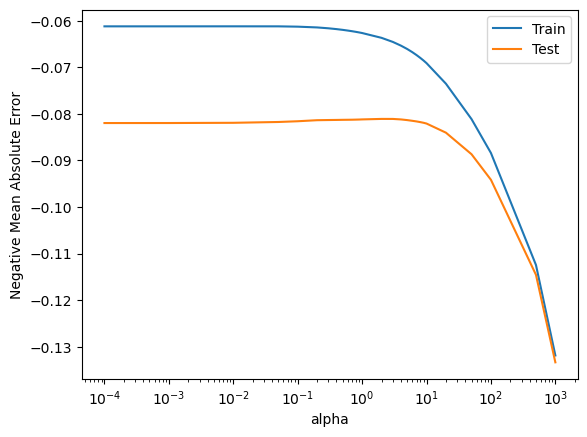

In [58]:
# using Ridge regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Taking instance of Ridge regressor
ridge = Ridge()

# Calling function for model fit
Ridge_model,ridge_alpha = reg_model(params,X_train_rfe,y_train,ridge)

# getting the instance on best alpha value
Ridge_fin_model = Ridge(alpha=ridge_alpha)

# fitting the model on training data set
Ridge_fin_model.fit(X_train_rfe,y_train)

# getting predicted values for train and test dataset
y_train_pred = Ridge_fin_model.predict(X_train_rfe)
y_test_pred = Ridge_fin_model.predict(X_test_rfe)

# calling the model evaluation function
model_eval()

cv_result = pd.DataFrame(Ridge_model.cv_results_)
cv_result

# plotting the result of ridge regressor for train and test predicted values
plt.plot(cv_result.param_alpha, cv_result.mean_train_score, label='Train')
plt.plot(cv_result.param_alpha, cv_result.mean_test_score, label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()




**Inferences**
- Optimal value of Alpha is **2.0**
- R2 score for Train dataset is 0.94
- R2 Score for Test dataset is 0.86 i.e 87% of the variance in test data can be explained by the model.
- RMSE for Test dataset is 0.139 that means the prediction made by the model can vary by 0.139 unit.

Plot is also showing that both train and test are decreasing as the value of alpha increasing

**Model 2** - **Lasso Regression**
-Here we are analysing multiple models in one go using multiple values of lambda. So we need not creating multiple models using different values of lambda

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimal value of Alpha is :{'alpha': 0.0001}
R-Square for train:0.945342320671325
R-Square for test:0.8700172391196719
RMSE for train:0.088346879586147
RMSE for test:0.1378169687693749


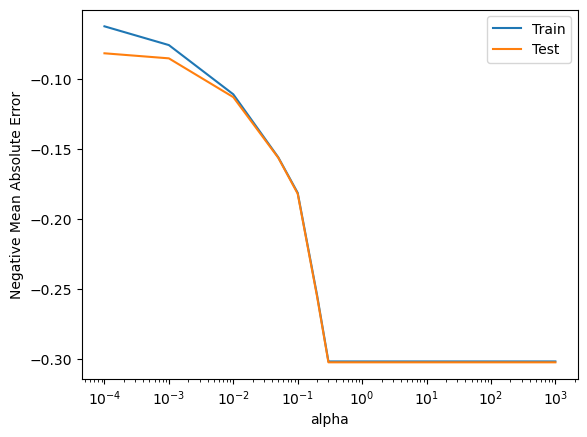

In [59]:
# using Lasso regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Taking instance of Lasso regressor
lasso = Lasso()

# Calling function for model fit
Lasso_model,Lasso_alpha = reg_model(params,X_train_rfe,y_train,lasso)

# getting the instance on best alpha value
Lasso_fin_model = Lasso(alpha = Lasso_alpha)

# fitting the model on training data set
Lasso_fin_model.fit(X_train_rfe,y_train)

# getting predicted values for train and test dataset
y_train_pred = Lasso_fin_model.predict(X_train_rfe)
y_test_pred = Lasso_fin_model.predict(X_test_rfe)

# calling the model evaluation function
model_eval()

lasso_cv_result = pd.DataFrame(Lasso_model.cv_results_)

# plotting the result of ridge regressor for train and test predicted values
plt.plot(lasso_cv_result.param_alpha, lasso_cv_result.mean_train_score, label='Train')
plt.plot(lasso_cv_result.param_alpha, lasso_cv_result.mean_test_score, label='Test')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.legend()
plt.show()

**Inferences**
- Optimal value of Alpha is 0.0001
- R2 score for Train dataset is 0.94
- R2 Score for Test dataset is 0.87 i.e. 87% of the variance in test data can be explained by the model.
- RMSE for Test dataset is 0.137 that means the prediction made by the model can vary by 0.137 unit.

Plot also shows that as the value of alpha increases, we see a decrease in both train and test error and then become constant

In [60]:
# comparison of coefficients of Lasso and ridge

Coefficients = pd.DataFrame({ 'Ridge(Alpha = 2.0)': Ridge_fin_model.coef_ , 'Lasso(Alpha = .0001)': Lasso_fin_model.coef_}, index=X_train_rfe.columns)
pd.set_option('display.max_rows', None)
Coefficients

Ridge(Alpha = 2.0)  Lasso(Alpha = .0001)
LotArea                             0.026064              0.024285
BsmtUnfSF                          -0.030484             -0.029799
TotalBsmtSF                         0.070129              0.070122
GrLivArea                           0.127265              0.127344
GarageArea                          0.029064              0.029508
MSSubClass_30                      -0.096870             -0.103687
MSSubClass_70                       0.030719              0.022080
MSSubClass_80                      -0.049893             -0.049660
MSSubClass_85                       0.029106              0.027327
MSSubClass_90                      -0.014663             -0.020932
MSSubClass_120                      0.043778              0.036065
MSSubClass_190                     -0.029141             -0.047577
MSZoning_FV                         0.151670              0.349001
MSZoning_RH                         0.151028              0.344688
MSZoning_RL                         0.166422              0.342855
MSZoning_RM                         0.141015              0.305644
Street_Pave                        -0.034946             -0.051261
Alley_Pave                          0.029098              0.016641
LandContour_HLS                     0.053219              0.053154
LandContour_Low                     0.036481              0.040279
LandContour_Lvl                     0.048529              0.052122
LotConfig_CulDSac                   0.032477              0.031384
LotConfig_FR2                      -0.016200             -0.011593
LandSlope_Mod                       0.025770              0.028013
Neighborhood_BrDale                -0.036286             -0.031265
Neighborhood_ClearCr                0.061501              0.067889
Neighborhood_Crawfor                0.061868              0.061607
Neighborhood_Edwards               -0.080487             -0.083319
Neighborhood_IDOTRR                -0.100219             -0.063905
Neighborhood_MeadowV               -0.126273             -0.147429
Neighborhood_Mitchel               -0.039641             -0.037981
Neighborhood_NAmes                 -0.047863             -0.050337
Neighborhood_NWAmes                -0.025129             -0.028421
Neighborhood_NridgHt                0.044307              0.040231
Neighborhood_OldTown               -0.072623             -0.064075
Neighborhood_Sawyer                -0.040384             -0.039515
Neighborhood_Somerst                0.082018              0.067585
Neighborhood_StoneBr                0.050285              0.047055
Condition1_Feedr                    0.009578              0.006959
Condition1_Norm                     0.063048              0.063738
Condition1_PosN                     0.029332              0.027183
Condition1_RRAn                     0.026083              0.023772
Condition2_Norm                     0.061097              0.044441
BldgType_2fmCon                    -0.029141             -0.011911
BldgType_Duplex                    -0.014663             -0.008388
BldgType_Twnhs                     -0.075851             -0.072586
BldgType_TwnhsE                    -0.038942             -0.031113
HouseStyle_SLvl                     0.062476              0.063440
OverallQual_3                      -0.016827              0.000000
OverallQual_4                      -0.032199             -0.002987
OverallQual_5                       0.015379              0.039014
OverallQual_6                       0.029955              0.054629
OverallQual_7                       0.087606              0.115618
OverallQual_8                       0.133066              0.164493
OverallQual_9                       0.171386              0.216151
OverallQual_10                     -0.004393              0.016933
OverallCond_3                      -0.200505             -0.215159
OverallCond_4                      -0.092132             -0.098034
OverallCond_5                      -0.072527             -0.075585
Overal

In [61]:
# Lets see how many columns Lasso has converted to 0

(Coefficients['Lasso(Alpha = .0001)'] == 0).sum()

12

In [62]:
# Checking which columns are made 0 using Lasso
Coefficients[(Coefficients['Lasso(Alpha = .0001)'] == 0)]

Ridge(Alpha = 2.0)  Lasso(Alpha = .0001)
OverallQual_3                      -0.016827                   0.0
YearRemodAdd_1966                   0.026434                   0.0
YearRemodAdd_1976                   0.015669                   0.0
BsmtQual_No Basement               -0.010294                  -0.0
BsmtCond_No Basement               -0.010294                  -0.0
BsmtFinType1_No Basement           -0.010294                  -0.0
BsmtFinType2_No Basement            0.012107                  -0.0
GarageType_Basment                 -0.001365                  -0.0
GarageType_No Garage                0.002037                   0.0
GarageFinish_No Garage              0.002037                   0.0
GarageQual_No Garage                0.002037                   0.0
GarageCond_No Garage                0.002037                   0.0

There are 12 out of 200 converted to 0 i.e. it further did feature selection and removed 12 columns

## Step 6 : Conclusion of case study

Checking top ten predictors for both Ridge and Lasso

In [63]:
Coefficients.columns

Index(['Ridge(Alpha = 2.0)', 'Lasso(Alpha = .0001)'], dtype='object')

In [64]:
Coefficients['Ridge(Alpha = 2.0)'].sort_values( ascending=False)[:10]

OverallQual_9          0.171386
MSZoning_RL            0.166422
MSZoning_FV            0.151670
MSZoning_RH            0.151028
MSZoning_RM            0.141015
OverallQual_8          0.133066
GrLivArea              0.127265
Exterior1st_BrkFace    0.101794
GarageYrBlt_2008.0     0.096043
Functional_Typ         0.094118
Name: Ridge(Alpha = 2.0), dtype: float64

In [65]:
# To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(Coefficients['Ridge(Alpha = 2.0)'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.186949
MSZoning_RL            1.181072
MSZoning_FV            1.163777
MSZoning_RH            1.163029
MSZoning_RM            1.151442
OverallQual_8          1.142326
GrLivArea              1.135718
Exterior1st_BrkFace    1.107156
GarageYrBlt_2008.0     1.100807
Functional_Typ         1.098690
Name: Ridge(Alpha = 2.0), dtype: float64

In [66]:
# 10 top significant LAsso Coefficients
lasso_coeffs = np.exp(Coefficients['Lasso(Alpha = .0001)'])
lasso_coeffs.sort_values(ascending=False)[:10]

MSZoning_FV            1.417651
MSZoning_RH            1.411549
MSZoning_RL            1.408965
MSZoning_RM            1.357499
OverallQual_9          1.241290
OverallQual_8          1.178796
GrLivArea              1.135808
OverallQual_7          1.122567
Exterior1st_BrkFace    1.113251
GarageYrBlt_2008.0     1.103963
Name: Lasso(Alpha = .0001), dtype: float64

**Inferences**

**Optimal value of lambda for Ridge Regression = 2.0**<br>
**Optimal value of lambda for Lasso Regression  = 0.0001**

**Variables significant in predicting the price of a house are**:<br>
OverallQual_9, OverallQual_8 , MSZoning_FV, MSZoning_FV, MSZoning_RH, MSZoning_RM,  GrLivArea, Exterior1st_BrkFace, GarageYrBlt_2008,OverallQual_7,Functional_Typ 

**How well those variables describe the price of a house**
- OverallQual_9 & OverallQual_8: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.24 to 1.27 times
- GrLivArea:an increase of 1 square foot of house area above ground, the price will increase by 1.13 times
- MSZoning: If general zoning classification of house is Floating Village Residential and Residential High Density , Residential Low Density and Residential Medium Density then price will increase from 1.15 times to 1.4 times
- Exterior1st_BrkFace : If exterior covering of house is Brickface then price will increase by 1.1 times

## Step 7 : Summary

- Housing data is read and analyzed 
- Data set is divided into numerical and categorical types.
- SalePrice is the target column here.
- Numerical features are analysed, visualized and cleaned for missing data, outliers
- Categorical features are also analysed, visualized and cleaned for NA values and 
- Multiple features are also dropped
- New feature 'Age' is also derived 
- Dummy variables are created
- Imbalanced dummy variables are dropped
- Data is divided into train and test dataset
- feature selection done based on RFe using 200 features
- Ridge and Lasso model was build and analysed




### Coding for answering the subjective questions

**Question 1**
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

**Answer**<br>
Optimal value of lambda for Ridge Regression = 2<br>
Optimal value of lambda for Lasso = 0.0001

In [67]:
# Let us build the ridge regression model with double value of alpha i.e. 4
ridge = Ridge(alpha=4)

# Fit the model on training data
ridge.fit(X_train_rfe, y_train)

# Make predictions
y_train_pred = ridge.predict(X_train_rfe)
y_pred = ridge.predict(X_test_rfe)

# Evaluation
model_eval()

R-Square for train:0.9402386462104351
R-Square for test:0.8700172391196719
RMSE for train:0.09237954826075229
RMSE for test:0.1378169687693749


In [68]:
# Let us build the Lasso regression model with double value of alpha i.e. .0002
lasso = Lasso(alpha=0.0002)

# Fit the model on training data
lasso.fit(X_train_rfe, y_train)

# Make predictions
y_train_pred = ridge.predict(X_train_rfe)
y_pred = ridge.predict(X_test_rfe)

# Evaluation
model_eval()

R-Square for train:0.9402386462104351
R-Square for test:0.8700172391196719
RMSE for train:0.09237954826075229
RMSE for test:0.1378169687693749


**Ridge for alpha = 2.0 :**<br>
R-Square for train:0.9436190965526192<br>
R-Square for test:0.8659669311749246<br>
RMSE for train:0.08972875378486447<br>
RMSE for test:0.13994770973204126<br>

**Ridge for alpha = 4.0 :**<br>
R-Square for train:0.9402386462104351<br>
R-Square for test:0.8659669311749246<br>
RMSE for train:0.09237954826075229<br>
RMSE for test:0.13994770973204126<br>

Here:<br>
R2 score for train is decreased from .943 to .940<br>
R2 score for test is almost same<br>
RMSE for train is increased from .08 to .09<br>
RMSE for test is same.<br>


**Lasso for alpha 0.0001**<br>
R-Square for train:0.945342320671325<br>
R-Square for test:0.8700172391196719<br>
RMSE for train:0.088346879586147<br>
RMSE for test:0.1378169687693749<br>

**Lasso for alpha 0.0002**<br>
R-Square for train:0.9402386462104351<br>
R-Square for test:0.8659669311749246<br>
RMSE for train:0.09237954826075229<br>
RMSE for test:0.13994770973204126<br>

Here:<br>
R2 score of train is decreased from .945 to 0.940<br>
R2 score of test is also decreased from .87 to .86<br>
RMSE for train is increased from  .08 to .09<br>
RMSE for test is also increased from .137 to .139<br>





In [69]:
Coefficients = pd.DataFrame({ 'Ridge(Alpha = 4.0)': ridge.coef_ , 'Lasso(Alpha = .0002)': lasso.coef_}, index=X_train_rfe.columns)
pd.set_option('display.max_rows', None)
Coefficients

Ridge(Alpha = 4.0)  Lasso(Alpha = .0002)
LotArea                             0.025500              0.022876
BsmtUnfSF                          -0.030854             -0.030930
TotalBsmtSF                         0.071698              0.073005
GrLivArea                           0.127843              0.127747
GarageArea                          0.030014              0.031112
MSSubClass_30                      -0.093788             -0.103996
MSSubClass_70                       0.032474              0.022225
MSSubClass_80                      -0.026196             -0.000000
MSSubClass_85                       0.023545              0.013773
MSSubClass_90                      -0.013665             -0.012108
MSSubClass_120                      0.037774              0.022615
MSSubClass_190                     -0.026199             -0.035728
MSZoning_FV                         0.098931              0.257253
MSZoning_RH                         0.093961              0.252602
MSZoning_RL                         0.113666              0.258628
MSZoning_RM                         0.082973              0.217934
Street_Pave                        -0.016433             -0.000000
Alley_Pave                          0.028728              0.014607
LandContour_HLS                     0.048820              0.045252
LandContour_Low                     0.030714              0.026402
LandContour_Lvl                     0.043218              0.041992
LotConfig_CulDSac                   0.033157              0.029741
LotConfig_FR2                      -0.013933             -0.004465
LandSlope_Mod                       0.023690              0.022755
Neighborhood_BrDale                -0.027277             -0.018290
Neighborhood_ClearCr                0.061189              0.077283
Neighborhood_Crawfor                0.060856              0.057869
Neighborhood_Edwards               -0.076421             -0.079240
Neighborhood_IDOTRR                -0.098499             -0.076348
Neighborhood_MeadowV               -0.100783             -0.133336
Neighborhood_Mitchel               -0.034274             -0.029580
Neighborhood_NAmes                 -0.043234             -0.045167
Neighborhood_NWAmes                -0.020008             -0.020354
Neighborhood_NridgHt                0.043533              0.040338
Neighborhood_OldTown               -0.065674             -0.062582
Neighborhood_Sawyer                -0.036527             -0.033627
Neighborhood_Somerst                0.079705              0.072174
Neighborhood_StoneBr                0.043356              0.035226
Condition1_Feedr                    0.004474              0.000000
Condition1_Norm                     0.059926              0.058485
Condition1_PosN                     0.021541              0.013191
Condition1_RRAn                     0.023527              0.019202
Condition2_Norm                     0.054847              0.044399
BldgType_2fmCon                    -0.026199             -0.012460
BldgType_Duplex                    -0.013665             -0.010562
BldgType_Twnhs                     -0.069173             -0.065440
BldgType_TwnhsE                    -0.029496             -0.012506
HouseStyle_SLvl                     0.042357              0.014967
OverallQual_3                      -0.036441             -0.003723
OverallQual_4                      -0.051925             -0.026394
OverallQual_5                      -0.003918              0.012961
OverallQual_6                       0.010118              0.029001
OverallQual_7                       0.067358              0.093011
OverallQual_8                       0.112262              0.143434
OverallQual_9                       0.144505              0.196798
OverallQual_10                     -0.017869              0.000000
OverallCond_3                      -0.174927             -0.217076
OverallCond_4                      -0.089178             -0.102937
OverallCond_5                      -0.070075             -0.076487
Overal

In [70]:
ridge_coeffs = np.exp(Coefficients['Ridge(Alpha = 4.0)'])
ridge_coeffs.sort_values(ascending=False)[:10]



OverallQual_9          1.155468
GrLivArea              1.136375
MSZoning_RL            1.120378
OverallQual_8          1.118806
MSZoning_FV            1.103990
CentralAir_Y           1.099397
MSZoning_RH            1.098517
Exterior1st_BrkFace    1.093106
Functional_Typ         1.088624
MSZoning_RM            1.086512
Name: Ridge(Alpha = 4.0), dtype: float64

In [71]:
lasso_coeffs = np.exp(Coefficients['Lasso(Alpha = .0002)'])
lasso_coeffs.sort_values(ascending=False)[:10]

MSZoning_RL            1.295152
MSZoning_FV            1.293373
MSZoning_RH            1.287370
MSZoning_RM            1.243505
OverallQual_9          1.217498
OverallQual_8          1.154230
GrLivArea              1.136266
OverallQual_7          1.097474
Exterior1st_BrkFace    1.097153
CentralAir_Y           1.092605
Name: Lasso(Alpha = .0002), dtype: float64

So, the most important predictor variables after we double the alpha values are:-
- MSZoning_RL
- MSZoning_FV
- MSZoning_RH
- MSZoning_RM
- OverallQual_9
- OverallQual_8
- GrLivArea 
- Exterior1st_BrkFace 
- CentralAir_Y  
- Functional_Typ
- OverallQual_7 

**Question 2**
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

**Answer**
- The model we will choose to apply will depend on the use case.
- If we have too many variables and one of our primary goal is feature selection, then we will use **Lasso Regression**.
- If we don't want to get too large coefficients and reduction of coefficient magnitude is one of our prime goals, then we will use **Ridge Regression**.
- If we take into consideration the value of R2 score and RMSE then based on the value achieved, **Lasso** seems better with R2 score of 0.86 and RMSE of .137 which is slightly better than Ridge in our case

**Question 3**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

**Answer**
Now we will drop the top 5 features in Lasso model and build the model again.<br>
Top 5 predictors for Lasso are:
- MSZoning_FV            1.417651
- MSZoning_RH            1.411549
- MSZoning_RL            1.408965
- MSZoning_RM            1.357499
- OverallQual_9          1.241290


In [72]:
# Creating list of columns to be dropped
Col_drop = ['MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM','OverallQual_9']

In [73]:
X_train_rfe.drop(Col_drop, axis=1, inplace = True)
X_test_rfe.drop(Col_drop, axis=1,inplace = True)

In [74]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Taking instance of Lasso regressor
lasso = Lasso()

# Calling function for model fit
Lasso_model,Lasso_alpha = reg_model(params,X_train_rfe,y_train,lasso)

# getting the instance on best alpha value
Lasso_fin_model = Lasso(alpha = Lasso_alpha)

# fitting the model on training data set
Lasso_fin_model.fit(X_train_rfe,y_train)

# getting predicted values for train and test dataset
y_train_pred = Lasso_fin_model.predict(X_train_rfe)
y_test_pred = Lasso_fin_model.predict(X_test_rfe)

# calling the model evaluation function
model_eval()

lasso_cv_result = pd.DataFrame(Lasso_model.cv_results_)


Fitting 5 folds for each of 28 candidates, totalling 140 fits
Optimal value of Alpha is :{'alpha': 0.0001}
R-Square for train:0.9385554628458458
R-Square for test:0.8606413074661882
RMSE for train:0.09367145349787905
RMSE for test:0.1427009441228698


In [75]:
Coefficients = pd.DataFrame({'Lasso': Lasso_fin_model.coef_}, index=X_train_rfe.columns)
pd.set_option('display.max_rows', None)
Coefficients

Lasso
LotArea                   0.027098
BsmtUnfSF                -0.029941
TotalBsmtSF               0.074752
GrLivArea                 0.129482
GarageArea                0.028154
MSSubClass_30            -0.101011
MSSubClass_70             0.033725
MSSubClass_80            -0.061046
MSSubClass_85             0.023270
MSSubClass_90            -0.022396
MSSubClass_120            0.033166
MSSubClass_190           -0.049961
Street_Pave              -0.011751
Alley_Pave                0.021416
LandContour_HLS           0.057868
LandContour_Low           0.024470
LandContour_Lvl           0.043320
LotConfig_CulDSac         0.030194
LotConfig_FR2            -0.014485
LandSlope_Mod             0.019364
Neighborhood_BrDale      -0.044891
Neighborhood_ClearCr      0.061644
Neighborhood_Crawfor      0.055627
Neighborhood_Edwards     -0.082487
Neighborhood_IDOTRR      -0.153065
Neighborhood_MeadowV     -0.180539
Neighborhood_Mitchel     -0.041901
Neighborhood_NAmes       -0.049761
Neighborhood_NWAmes      -0.027913
Neighborhood_NridgHt      0.063889
Neighborhood_OldTown     -0.097240
Neighborhood_Sawyer      -0.039342
Neighborhood_Somerst      0.081115
Neighborhood_StoneBr      0.068589
Condition1_Feedr          0.000000
Condition1_Norm           0.061017
Condition1_PosN           0.034235
Condition1_RRAn           0.025743
Condition2_Norm           0.084024
BldgType_2fmCon          -0.007278
BldgType_Duplex          -0.002500
BldgType_Twnhs           -0.080439
BldgType_TwnhsE          -0.032053
HouseStyle_SLvl           0.074171
OverallQual_3            -0.077954
OverallQual_4            -0.105845
OverallQual_5            -0.063662
OverallQual_6            -0.053425
OverallQual_7            -0.000000
OverallQual_8             0.032791
OverallQual_10           -0.131904
OverallCond_3            -0.248498
OverallCond_4            -0.098876
OverallCond_5            -0.074279
OverallCond_6            -0.031440
OverallCond_9             0.082707
YearRemodAdd_1958        -0.069198
YearRemodAdd_1966         0.006004
YearRemodAdd_1970         0.033177
YearRemodAdd_1976         0.000000
YearRemodAdd_1977         0.010402
YearRemodAdd_1993         0.031380
YearRemodAdd_1994         0.008369
YearRemodAdd_1995         0.046400
YearRemodAdd_1996         0.028390
YearRemodAdd_1997         0.030079
YearRemodAdd_1998         0.058243
YearRemodAdd_1999         0.070788
YearRemodAdd_2000         0.085597
YearRemodAdd_2001         0.045400
YearRemodAdd_2002         0.045929
YearRemodAdd_2003         0.032129
YearRemodAdd_2004         0.026559
YearRemodAdd_2005         0.035925
YearRemodAdd_2006         0.040163
YearRemodAdd_2007         0.048652
YearRemodAdd_2008        -0.001812
YearRemodAdd_2009         0.090321
RoofStyle_Gable          -0.025444
RoofStyle_Hip            -0.025205
RoofMatl_CompShg          0.017369
Exterior1st_BrkFace       0.105702
Exterior1st_CemntBd       0.026718
Exterior1st_HdBoard       0.022379
Exterior1st_Plywood       0.040123
Exterior1st_Stucco        0.012624
Exterior1st_VinylSd       0.042152
Exterior1st_WdShing       0.086735
Exterior2nd_MetalSd       0.040136
Exterior2nd_Stucco       -0.012976
Exterior2nd_Wd Shng      -0.035019
MasVnrType_BrkFace        0.021462
MasVnrType_Stone          0.018196
ExterQual_Gd              0.025689
ExterCond_Fa             -0.090614
ExterCond_Gd             -0.093106
ExterCond_TA             -0.067995
Foundation_CBlock         0.017303
Foundation_PConc          0.044885
Foundation_Slab           0.009727
BsmtQual_Gd              -0.037279
BsmtQual_No Basement     -0.000000
BsmtQual_TA              -0.051712
BsmtCond_Gd               0.078214
BsmtCond_No Basement     -0.000000
BsmtCond_TA               0.055393
BsmtExposure_Gd           0.039518
BsmtExposure_No Basement -0.025459
BsmtFinType1_LwQ         -0.034777
BsmtFinType1_No Basement -0.000000
BsmtFinType1_Rec         -0.038800
BsmtFinType1_Unf         -0.037309
BsmtFinType2_BLQ         -0.054802
BsmtFinType2_LwQ         -0.013859
Bsmt

In [76]:
# 5 top significant LAsso Coefficients
lasso_coeffs = np.exp(Coefficients['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:5]

GrLivArea              1.138239
Exterior1st_BrkFace    1.111491
CentralAir_Y           1.110912
Functional_Typ         1.109686
GarageYrBlt_2008.0     1.103133
Name: Lasso, dtype: float64